In [1]:
import pandas as pd
import json
import numpy as np
import cv2
import tensorflow as tf
import tensorflow_hub as hub

2022-04-19 12:19:01.710898: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
all_documents=pd.read_csv('query_result_2022-02-03T11_48_29.164127Z.csv')

In [3]:
all_documents

case_id  \
0     1cd90041-b111-4063-b576-6d549c15d210   
1     1cd90041-b111-4063-b576-6d549c15d210   
2     1cd90041-b111-4063-b576-6d549c15d210   
3     1cd90041-b111-4063-b576-6d549c15d210   
4     1cd90041-b111-4063-b576-6d549c15d210   
...                                    ...   
4910  861ba1d1-2060-4ba0-9c84-12ed7b20269b   
4911  861ba1d1-2060-4ba0-9c84-12ed7b20269b   
4912  861ba1d1-2060-4ba0-9c84-12ed7b20269b   
4913  861ba1d1-2060-4ba0-9c84-12ed7b20269b   
4914  861ba1d1-2060-4ba0-9c84-12ed7b20269b   

                                              image_key          bucket  \
0     images_zippy/document_images/a5ea4c25-dc13-418...  rz-dre-weights   
1     images_zippy/document_images/a5ea4c25-dc13-418...  rz-dre-weights   
2     images_zippy/document_images/a5c86375-7bdd-4de...  rz-dre-weights   
3     images_zippy/document_images/a5b3d82f-0ba3-4df...  rz-dre-weights   
4     images_zippy/document_images/a5b3d82f-0ba3-4df...  rz-dre-weights   
...                                                 ...             ...   
4910  images_zippy/document_images/3c8878b5-22d4-434...  rz-dre-weights   
4911  images_zippy/document_images/3c768cea-79aa-44d...  rz-dre-weights   
4912  images_zippy/document_images/3c65bae5-fa74-407...  rz-dre-weights   
4913  images_zippy/document_images/3c65bae5-fa74-407...  rz-dre-weights   
4914  images_zippy/document_images/3c61cc13-279a-434...  rz-dre-weights   

      status       id  image_id  class     visibility     type  \
0     MERGED  5398148    817440    NaN      around_75  profile   
1     MERGED  5398147    817439    NaN      around_50  profile   
2     MERGED  5398146    817438    NaN  fully_visible  profile   
3     MERGED  5398145    817437    NaN      around_75  profile   
4     MERGED  5398141    817436    NaN  fully_visible  profile   
...      ...      ...       ...    ...            ...      ...   
4910  MERGED  5310605    822223    NaN      around_75  profile   
4911  MERGED  5310593    822222    NaN      around_75  profile   
4912  MERGED  5310582    822221    NaN  fully_visible  profile   
4913  MERGED  5310574    822220    NaN  fully_visible  profile   
4914  MERGED  5310570    822219    NaN  fully_visible  profile   

                                                   meta  parent_id  \
0     {"state": "Delhi", "documentSide": "Front", "d...        NaN   
1     {"state": "Delhi", "documentSide": "Front", "d...        NaN   
2     {"state": "Haryana", "documentSide": "Front", ...        NaN   
3     {"state": "Delhi", "documentSide": "Front", "d...        NaN   
4     {"state": "Delhi", "documentSide": "back", "do...        NaN   
...                                                 ...        ...   
4910  {"state": "Delhi", "documentSide": "Front", "d...        NaN   
4911  {"state": "Delhi", "documentSide": "Front", "d...        NaN   
4912  {"state": "Delhi", "documentSide": "Front", "d...        NaN   
4913  {"state": "Delhi", "documentSide": "Front", "d...        NaN   
4914  {"state": "Delhi", "documentSide": "Front", "d...        NaN   

      deleted_at                   created_at                   updated_at  \
0            NaN  2022-01-18T16:51:30.713466Z  2022-01-18T16:51:30.713466Z   
1            NaN  2022-01-18T16:49:21.053716Z  2022-01-18T16:49:21.053716Z   
2            NaN  2022-01-18T16:45:53.807403Z  2022-01-18T16:45:53.807403Z   
3            NaN  2022-01-18T16:43:07.688191Z  2022-01-18T16:43:07.688191Z   
4            NaN  2022-01-18T16:40:51.909386Z  2022-01-18T16:40:51.909386Z   
...          ...                          ...                          ...   
4910         NaN  2022-01-11T11:42:12.740376Z  2022-01-11T11:42:12.740376Z   
4911         NaN  2022-01-11T11:41:37.290455Z  2022-01-11T11:41:37.290455Z   
4912         NaN  2022-01-11T11:41:06.710899Z  2022-01-11T11:41:06.710899Z   
4913         NaN  2022-01-11T11:40:41.524001Z  2022-01-11T11:40:41.524001Z   
4914         NaN  2022-01-11T11:40:12.711692Z  2022-01-11T11:40:12.711692Z   

          

In [60]:
case_id = all_documents["case_id"]
image_id = all_documents["image_id"]
visibility = all_documents["visibility"]
meta = all_documents["meta"]
polygon = all_documents["polygon"]
id1 = all_documents["id"]


In [61]:
df = pd.DataFrame(columns=['file_name', 'class', 'Width', 'Height', 'xmin', 'ymin','xmax','ymax' ,'visibility','meta', 'class_id' , 'case_id', 'image_id', 'visibility', 'polygon', 'id'])

In [62]:
def genrate_pts(poly_line):
    res = json.loads(poly_line)
    #print(res)
    coordinates = []
    for j in range(len(res)):
        a = res[j]['x']
        b = res[j]['y']
        c = [int(a) , int(b)]
        coordinates.append(c)
    pts = np.array(coordinates)
    return pts



In [63]:
def bounding_box(points):
    x_coordinates, y_coordinates = zip(*points)

    return [(min(x_coordinates), min(y_coordinates)), (max(x_coordinates), max(y_coordinates))]

In [8]:
for i in range(len(image_id)):
    image_name = all_documents.iloc[i]["case_id"]+"_"+str(all_documents.iloc[i]["image_id"])+".jpg"
    poly_line = all_documents["polygon"][i]
    image_path = 'card_images/'+image_name
    image = cv2.imread(image_path)
    height, width, channels = image.shape
    #print(height, width, channels)
    pts = genrate_pts(poly_line)
    
    bbox = bounding_box(pts)
    #print(bbox[0][0], bbox[0][1], bbox[1][0], bbox[1][1])
    df = df.append({'file_name' : image_name, 'class' : 'RC','Width' :  width, 'Height' : height, 'xmin' : bbox[0][0], 'ymin' : bbox[0][1],'xmax' : bbox[1][0] ,'ymax' : bbox[1][1],'visibility' : visibility[i] ,'meta' : meta[i], 'class_id' : 1, 'case_id' : case_id[i]  , 'image_id' : image_id[i] , 'visibility' : visibility[i], 'polygon' : polygon[i] , 'id' : id1[i] },ignore_index=True)

df

file_name class Width Height xmin  \
0     1cd90041-b111-4063-b576-6d549c15d210_817440.jpg    RC  1920   1080  215   
1     1cd90041-b111-4063-b576-6d549c15d210_817439.jpg    RC  1920   1080  205   
2     1cd90041-b111-4063-b576-6d549c15d210_817438.jpg    RC  1920   1080  214   
3     1cd90041-b111-4063-b576-6d549c15d210_817437.jpg    RC  1920   1080  540   
4     1cd90041-b111-4063-b576-6d549c15d210_817436.jpg    RC  1920   1080  489   
...                                               ...   ...   ...    ...  ...   
4910  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822223.jpg    RC  1920   1080  406   
4911  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822222.jpg    RC  1920   1080  454   
4912  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822221.jpg    RC  1920   1080  381   
4913  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822220.jpg    RC  1920   1080  230   
4914  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822219.jpg    RC  1920   1080  308   

     ymin  xmax ymax     visibility  \
0     163  1566  958      around_75   
1     134  1659  985      around_50   
2     164  1491  979  fully_visible   
3     301  1400  838      around_75   
4     238  1333  800  fully_visible   
...   ...   ...  ...            ...   
4910  222  1417  862      around_75   
4911  273  1249  783      around_75   
4912  146  1597  921  fully_visible   
4913  112  1533  916  fully_visible   
4914  201  1487  955  fully_visible   

                                                   meta class_id  \
0     {"state": "Delhi", "documentSide": "Front", "d...        1   
1     {"state": "Delhi", "documentSide": "Front", "d...        1   
2     {"state": "Haryana", "documentSide": "Front", ...        1   
3     {"state": "Delhi", "documentSide": "Front", "d...        1   
4     {"state": "Delhi", "documentSide": "back", "do...        1   
...                                                 ...      ...   
4910  {"state": "Delhi", "documentSide": "Front", "d...        1   
4911  {"state": "Delhi", "documentSide": "Front", "d...        1   
4912  {"state": "Delhi", "documentSide": "Front", "d...        1   
4913  {"state": "Delhi", "documentSide": "Front", "d...        1   
4914  {"state": "Delhi", "documentSide": "Front", "d...        1   

                                   case_id image_id     visibility  \
0     1cd90041-b111-4063-b576-6d549c15d210   817440      around_75   
1     1cd90041-b111-4063-b576-6d549c15d210   817439      around_50   
2     1cd90041-b111-4063-b576-6d549c15d210   817438  fully_visible   
3     1cd90041-b111-4063-b576-6d549c15d210   817437      around_75   
4     1cd90041-b111-4063-b576-6d549c15d210   817436  fully_visible   
...                                    ...      ...            ...   
4910  861ba1d1-2060-4ba0-9c84-12ed7b20269b   822223      around_75   
4911  861ba1d1-2060-4ba0-9c84-12ed7b20269b   822222      around_75   
4912  861ba1d1-2060-4ba0-9c84-12ed7b20269b   822221  fully_visible   
4913  861ba1d1-2060-4ba0-9c84-12ed7b20269b   822220  fully_visible   
4914  861ba1d1-2060-4ba0-9c84-12ed7b20269b   822219  fully_visible   

                                                polygon       id  
0     [{"x": 294.9794238683128, "y": 208.06584362139...  5398148  
1     [{"x": 287.0781893004115, "y": 165.92592592592...  5398147  
2     [{"x": 229.908592321755, "y": 203.583180987202...  5398146  
3     [{"x": 551.0786106032906, "y": 328.19012797074...  5398145  
4     [{"x": 542.3034734917733, "y": 257.98903107861...  5398141  
...                                                 ...      ...  
4910  [{"x": 406.7163288040666, "y": 281.14789748033...  5310605  
4911  [{"x": 454.39844800936464, "y": 303.3995531094...  5310593  
4912  [{"x": 416.25275264512624, "y": 193.7306789372...  5310582  
4913  [{"x": 293.86864668486135, "y": 157.1743875465...  5310574  
4914  [{"x": 320.8885142345302, "y": 247.77041403663...  5310570  

[4915 rows x 16 columns]

In [9]:
df.to_csv('rc_card_polygon_data.csv', index = False)

In [4]:
data=pd.read_csv('rc_card_data.csv')
data

filename class  Width  Height  \
0     1cd90041-b111-4063-b576-6d549c15d210_817440.jpg    RC   1920    1080   
1     1cd90041-b111-4063-b576-6d549c15d210_817439.jpg    RC   1920    1080   
2     1cd90041-b111-4063-b576-6d549c15d210_817438.jpg    RC   1920    1080   
3     1cd90041-b111-4063-b576-6d549c15d210_817437.jpg    RC   1920    1080   
4     1cd90041-b111-4063-b576-6d549c15d210_817436.jpg    RC   1920    1080   
...                                               ...   ...    ...     ...   
4910  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822223.jpg    RC   1920    1080   
4911  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822222.jpg    RC   1920    1080   
4912  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822221.jpg    RC   1920    1080   
4913  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822220.jpg    RC   1920    1080   
4914  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822219.jpg    RC   1920    1080   

      xmin  ymin  xmax  ymax     visibility  \
0      215   163  1566   958      around_75   
1      205   134  1659   985      around_50   
2      214   164  1491   979  fully_visible   
3      540   301  1400   838      around_75   
4      489   238  1333   800  fully_visible   
...    ...   ...   ...   ...            ...   
4910   406   222  1417   862      around_75   
4911   454   273  1249   783      around_75   
4912   381   146  1597   921  fully_visible   
4913   230   112  1533   916  fully_visible   
4914   308   201  1487   955  fully_visible   

                                                   meta  class_id  
0     {"state": "Delhi", "documentSide": "Front", "d...         1  
1     {"state": "Delhi", "documentSide": "Front", "d...         1  
2     {"state": "Haryana", "documentSide": "Front", ...         1  
3     {"state": "Delhi", "documentSide": "Front", "d...         1  
4     {"state": "Delhi", "documentSide": "back", "do...         1  
...                                                 ...       ...  
4910  {"state": "Delhi", "documentSide": "Front", "d...         1  
4911  {"state": "Delhi", "documentSide": "Front", "d...         1  
4912  {"state": "Delhi", "documentSide": "Front", "d...         1  
4913  {"state": "Delhi", "documentSide": "Front", "d...         1  
4914  {"state": "Delhi", "documentSide": "Front", "d...         1  

[4915 rows x 11 columns]

In [3]:
data = df
data

NameError: name 'df' is not defined

In [14]:
for i in range(len(data)):

        xstart = data["xmin"][i]
        ystart = data["ymin"][i]
        xstop = data["xmax"][i]
        ystop = data["ymax"][i]
        width = data["Width"][i]
        height = data["Height"][i]
        image_name = data["file_name"][i]
        print(image_name)
        if xstart < 0:
            print('---x_less_zero---')
            xstart = 0
        if ystart < 0:
            print('---y_less_zero---')
            ystart = 0
        if image_name is None:
            result = "Image is empty!!"
        else:
            result = "Image is not empty!!"    
        print(result)
        if height > ystop and width > xstop:
            
            
            image_path = 'card_images/'+image_name
            
            image = cv2.imread(image_path)
            crop = image[ ystart:ystop,xstart:xstop]
            filename = 'multi_class_images/'+image_name
            print("filename : ", filename)
            cv2.imwrite(filename, crop) 
        else:
            print("----found-----")
            
            
                   

1cd90041-b111-4063-b576-6d549c15d210_817440.jpg
Image is not empty!!
filename :  multi_class_images/1cd90041-b111-4063-b576-6d549c15d210_817440.jpg
1cd90041-b111-4063-b576-6d549c15d210_817439.jpg
Image is not empty!!
filename :  multi_class_images/1cd90041-b111-4063-b576-6d549c15d210_817439.jpg
1cd90041-b111-4063-b576-6d549c15d210_817438.jpg
Image is not empty!!
filename :  multi_class_images/1cd90041-b111-4063-b576-6d549c15d210_817438.jpg
1cd90041-b111-4063-b576-6d549c15d210_817437.jpg
Image is not empty!!
filename :  multi_class_images/1cd90041-b111-4063-b576-6d549c15d210_817437.jpg
1cd90041-b111-4063-b576-6d549c15d210_817436.jpg
Image is not empty!!
filename :  multi_class_images/1cd90041-b111-4063-b576-6d549c15d210_817436.jpg
1cd90041-b111-4063-b576-6d549c15d210_817435.jpg
Image is not empty!!
filename :  multi_class_images/1cd90041-b111-4063-b576-6d549c15d210_817435.jpg
1cd90041-b111-4063-b576-6d549c15d210_817434.jpg
Image is not empty!!
filename :  multi_class_images/1cd90041-b11

8c87fb01-24ee-47f4-a589-a2e6ef4b63eb_817442.jpg
Image is not empty!!
filename :  multi_class_images/8c87fb01-24ee-47f4-a589-a2e6ef4b63eb_817442.jpg
8c87fb01-24ee-47f4-a589-a2e6ef4b63eb_817441.jpg
Image is not empty!!
filename :  multi_class_images/8c87fb01-24ee-47f4-a589-a2e6ef4b63eb_817441.jpg
da60fb6b-b884-48d5-9cd5-79cf2d4946f5_817530.jpg
Image is not empty!!
filename :  multi_class_images/da60fb6b-b884-48d5-9cd5-79cf2d4946f5_817530.jpg
da60fb6b-b884-48d5-9cd5-79cf2d4946f5_817529.jpg
Image is not empty!!
filename :  multi_class_images/da60fb6b-b884-48d5-9cd5-79cf2d4946f5_817529.jpg
da60fb6b-b884-48d5-9cd5-79cf2d4946f5_817528.jpg
Image is not empty!!
filename :  multi_class_images/da60fb6b-b884-48d5-9cd5-79cf2d4946f5_817528.jpg
da60fb6b-b884-48d5-9cd5-79cf2d4946f5_817527.jpg
Image is not empty!!
filename :  multi_class_images/da60fb6b-b884-48d5-9cd5-79cf2d4946f5_817527.jpg
da60fb6b-b884-48d5-9cd5-79cf2d4946f5_817526.jpg
Image is not empty!!
filename :  multi_class_images/da60fb6b-b88

filename :  multi_class_images/04500356-dca9-4a86-beb8-1fe5bec0b7e1_817485.jpg
04500356-dca9-4a86-beb8-1fe5bec0b7e1_817484.jpg
Image is not empty!!
filename :  multi_class_images/04500356-dca9-4a86-beb8-1fe5bec0b7e1_817484.jpg
04500356-dca9-4a86-beb8-1fe5bec0b7e1_817483.jpg
Image is not empty!!
filename :  multi_class_images/04500356-dca9-4a86-beb8-1fe5bec0b7e1_817483.jpg
04500356-dca9-4a86-beb8-1fe5bec0b7e1_817482.jpg
Image is not empty!!
filename :  multi_class_images/04500356-dca9-4a86-beb8-1fe5bec0b7e1_817482.jpg
04500356-dca9-4a86-beb8-1fe5bec0b7e1_817481.jpg
Image is not empty!!
filename :  multi_class_images/04500356-dca9-4a86-beb8-1fe5bec0b7e1_817481.jpg
b355ebe0-2e03-4dba-90d3-63d2d89684c3_817500.jpg
Image is not empty!!
filename :  multi_class_images/b355ebe0-2e03-4dba-90d3-63d2d89684c3_817500.jpg
b355ebe0-2e03-4dba-90d3-63d2d89684c3_817499.jpg
Image is not empty!!
filename :  multi_class_images/b355ebe0-2e03-4dba-90d3-63d2d89684c3_817499.jpg
b355ebe0-2e03-4dba-90d3-63d2d8968

filename :  multi_class_images/813b7c32-a665-465f-8a26-35ffa37b4520_817609.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817608.jpg
Image is not empty!!
filename :  multi_class_images/813b7c32-a665-465f-8a26-35ffa37b4520_817608.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817607.jpg
Image is not empty!!
filename :  multi_class_images/813b7c32-a665-465f-8a26-35ffa37b4520_817607.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817606.jpg
Image is not empty!!
filename :  multi_class_images/813b7c32-a665-465f-8a26-35ffa37b4520_817606.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817605.jpg
Image is not empty!!
filename :  multi_class_images/813b7c32-a665-465f-8a26-35ffa37b4520_817605.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817604.jpg
Image is not empty!!
filename :  multi_class_images/813b7c32-a665-465f-8a26-35ffa37b4520_817604.jpg
813b7c32-a665-465f-8a26-35ffa37b4520_817603.jpg
Image is not empty!!
filename :  multi_class_images/813b7c32-a665-465f-8a26-35ffa37b4520_817603.jpg
813b7c32-a665-465f-8a26-35ffa37b4

4d7adeff-5c7a-45d7-a869-b837b941ac6d_817660.jpg
Image is not empty!!
filename :  multi_class_images/4d7adeff-5c7a-45d7-a869-b837b941ac6d_817660.jpg
4d7adeff-5c7a-45d7-a869-b837b941ac6d_817659.jpg
Image is not empty!!
filename :  multi_class_images/4d7adeff-5c7a-45d7-a869-b837b941ac6d_817659.jpg
4d7adeff-5c7a-45d7-a869-b837b941ac6d_817658.jpg
Image is not empty!!
filename :  multi_class_images/4d7adeff-5c7a-45d7-a869-b837b941ac6d_817658.jpg
4d7adeff-5c7a-45d7-a869-b837b941ac6d_817657.jpg
Image is not empty!!
filename :  multi_class_images/4d7adeff-5c7a-45d7-a869-b837b941ac6d_817657.jpg
4d7adeff-5c7a-45d7-a869-b837b941ac6d_817656.jpg
Image is not empty!!
filename :  multi_class_images/4d7adeff-5c7a-45d7-a869-b837b941ac6d_817656.jpg
4d7adeff-5c7a-45d7-a869-b837b941ac6d_817655.jpg
Image is not empty!!
filename :  multi_class_images/4d7adeff-5c7a-45d7-a869-b837b941ac6d_817655.jpg
4d7adeff-5c7a-45d7-a869-b837b941ac6d_817654.jpg
Image is not empty!!
filename :  multi_class_images/4d7adeff-5c7

e1879dc1-d4b3-47b3-94d6-04eb58149807_817643.jpg
Image is not empty!!
filename :  multi_class_images/e1879dc1-d4b3-47b3-94d6-04eb58149807_817643.jpg
e1879dc1-d4b3-47b3-94d6-04eb58149807_817642.jpg
Image is not empty!!
filename :  multi_class_images/e1879dc1-d4b3-47b3-94d6-04eb58149807_817642.jpg
e1879dc1-d4b3-47b3-94d6-04eb58149807_817641.jpg
Image is not empty!!
filename :  multi_class_images/e1879dc1-d4b3-47b3-94d6-04eb58149807_817641.jpg
d550de13-8828-40db-9312-db11bac6fb8b_817750.jpg
Image is not empty!!
filename :  multi_class_images/d550de13-8828-40db-9312-db11bac6fb8b_817750.jpg
d550de13-8828-40db-9312-db11bac6fb8b_817749.jpg
Image is not empty!!
filename :  multi_class_images/d550de13-8828-40db-9312-db11bac6fb8b_817749.jpg
d550de13-8828-40db-9312-db11bac6fb8b_817748.jpg
Image is not empty!!
filename :  multi_class_images/d550de13-8828-40db-9312-db11bac6fb8b_817748.jpg
d550de13-8828-40db-9312-db11bac6fb8b_817747.jpg
Image is not empty!!
filename :  multi_class_images/d550de13-882

filename :  multi_class_images/3aaaa0cb-79f5-4806-8537-e676db98957f_817995.jpg
3aaaa0cb-79f5-4806-8537-e676db98957f_817994.jpg
Image is not empty!!
filename :  multi_class_images/3aaaa0cb-79f5-4806-8537-e676db98957f_817994.jpg
3aaaa0cb-79f5-4806-8537-e676db98957f_817993.jpg
Image is not empty!!
filename :  multi_class_images/3aaaa0cb-79f5-4806-8537-e676db98957f_817993.jpg
3aaaa0cb-79f5-4806-8537-e676db98957f_817992.jpg
Image is not empty!!
filename :  multi_class_images/3aaaa0cb-79f5-4806-8537-e676db98957f_817992.jpg
3aaaa0cb-79f5-4806-8537-e676db98957f_817991.jpg
Image is not empty!!
filename :  multi_class_images/3aaaa0cb-79f5-4806-8537-e676db98957f_817991.jpg
314df7e0-e533-4aaa-b68b-66fa947e7347_818080.jpg
Image is not empty!!
filename :  multi_class_images/314df7e0-e533-4aaa-b68b-66fa947e7347_818080.jpg
314df7e0-e533-4aaa-b68b-66fa947e7347_818079.jpg
Image is not empty!!
filename :  multi_class_images/314df7e0-e533-4aaa-b68b-66fa947e7347_818079.jpg
314df7e0-e533-4aaa-b68b-66fa947e7

filename :  multi_class_images/544cf935-e240-4532-9013-758cfd566b70_817921.jpg
544cf935-e240-4532-9013-758cfd566b70_817929.jpg
Image is not empty!!
filename :  multi_class_images/544cf935-e240-4532-9013-758cfd566b70_817929.jpg
544cf935-e240-4532-9013-758cfd566b70_817925.jpg
Image is not empty!!
filename :  multi_class_images/544cf935-e240-4532-9013-758cfd566b70_817925.jpg
544cf935-e240-4532-9013-758cfd566b70_817930.jpg
Image is not empty!!
filename :  multi_class_images/544cf935-e240-4532-9013-758cfd566b70_817930.jpg
544cf935-e240-4532-9013-758cfd566b70_817927.jpg
Image is not empty!!
filename :  multi_class_images/544cf935-e240-4532-9013-758cfd566b70_817927.jpg
544cf935-e240-4532-9013-758cfd566b70_817926.jpg
Image is not empty!!
filename :  multi_class_images/544cf935-e240-4532-9013-758cfd566b70_817926.jpg
544cf935-e240-4532-9013-758cfd566b70_817924.jpg
Image is not empty!!
filename :  multi_class_images/544cf935-e240-4532-9013-758cfd566b70_817924.jpg
544cf935-e240-4532-9013-758cfd566

filename :  multi_class_images/7f3910df-35ce-4c2b-a865-13df919f3584_818135.jpg
7f3910df-35ce-4c2b-a865-13df919f3584_818140.jpg
Image is not empty!!
filename :  multi_class_images/7f3910df-35ce-4c2b-a865-13df919f3584_818140.jpg
7f3910df-35ce-4c2b-a865-13df919f3584_818139.jpg
Image is not empty!!
filename :  multi_class_images/7f3910df-35ce-4c2b-a865-13df919f3584_818139.jpg
7f3910df-35ce-4c2b-a865-13df919f3584_818138.jpg
Image is not empty!!
filename :  multi_class_images/7f3910df-35ce-4c2b-a865-13df919f3584_818138.jpg
7f3910df-35ce-4c2b-a865-13df919f3584_818137.jpg
Image is not empty!!
filename :  multi_class_images/7f3910df-35ce-4c2b-a865-13df919f3584_818137.jpg
7f3910df-35ce-4c2b-a865-13df919f3584_818132.jpg
Image is not empty!!
filename :  multi_class_images/7f3910df-35ce-4c2b-a865-13df919f3584_818132.jpg
7f3910df-35ce-4c2b-a865-13df919f3584_818131.jpg
Image is not empty!!
filename :  multi_class_images/7f3910df-35ce-4c2b-a865-13df919f3584_818131.jpg
4f58689d-8fe0-4e4b-912d-c100076c3

0b822208-1aa8-479f-88c4-e0f7d6e8e004_818035.jpg
Image is not empty!!
filename :  multi_class_images/0b822208-1aa8-479f-88c4-e0f7d6e8e004_818035.jpg
0b822208-1aa8-479f-88c4-e0f7d6e8e004_818034.jpg
Image is not empty!!
filename :  multi_class_images/0b822208-1aa8-479f-88c4-e0f7d6e8e004_818034.jpg
0b822208-1aa8-479f-88c4-e0f7d6e8e004_818033.jpg
Image is not empty!!
filename :  multi_class_images/0b822208-1aa8-479f-88c4-e0f7d6e8e004_818033.jpg
0b822208-1aa8-479f-88c4-e0f7d6e8e004_818032.jpg
Image is not empty!!
filename :  multi_class_images/0b822208-1aa8-479f-88c4-e0f7d6e8e004_818032.jpg
0b822208-1aa8-479f-88c4-e0f7d6e8e004_818031.jpg
Image is not empty!!
filename :  multi_class_images/0b822208-1aa8-479f-88c4-e0f7d6e8e004_818031.jpg
7dc4d336-f545-4425-9efc-4becfd6ee9bf_817865.jpg
Image is not empty!!
filename :  multi_class_images/7dc4d336-f545-4425-9efc-4becfd6ee9bf_817865.jpg
7dc4d336-f545-4425-9efc-4becfd6ee9bf_817863.jpg
Image is not empty!!
filename :  multi_class_images/7dc4d336-f54

filename :  multi_class_images/8c095f1f-39b5-462b-8e52-4af9a8acc91c_817798.jpg
8c095f1f-39b5-462b-8e52-4af9a8acc91c_817797.jpg
Image is not empty!!
filename :  multi_class_images/8c095f1f-39b5-462b-8e52-4af9a8acc91c_817797.jpg
8c095f1f-39b5-462b-8e52-4af9a8acc91c_817796.jpg
Image is not empty!!
filename :  multi_class_images/8c095f1f-39b5-462b-8e52-4af9a8acc91c_817796.jpg
8c095f1f-39b5-462b-8e52-4af9a8acc91c_817795.jpg
Image is not empty!!
filename :  multi_class_images/8c095f1f-39b5-462b-8e52-4af9a8acc91c_817795.jpg
8c095f1f-39b5-462b-8e52-4af9a8acc91c_817794.jpg
Image is not empty!!
filename :  multi_class_images/8c095f1f-39b5-462b-8e52-4af9a8acc91c_817794.jpg
8c095f1f-39b5-462b-8e52-4af9a8acc91c_817793.jpg
Image is not empty!!
filename :  multi_class_images/8c095f1f-39b5-462b-8e52-4af9a8acc91c_817793.jpg
8c095f1f-39b5-462b-8e52-4af9a8acc91c_817792.jpg
Image is not empty!!
filename :  multi_class_images/8c095f1f-39b5-462b-8e52-4af9a8acc91c_817792.jpg
8c095f1f-39b5-462b-8e52-4af9a8acc

filename :  multi_class_images/8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817778.jpg
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817777.jpg
Image is not empty!!
filename :  multi_class_images/8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817777.jpg
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817776.jpg
Image is not empty!!
filename :  multi_class_images/8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817776.jpg
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817775.jpg
Image is not empty!!
filename :  multi_class_images/8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817775.jpg
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817774.jpg
Image is not empty!!
filename :  multi_class_images/8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817774.jpg
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817773.jpg
Image is not empty!!
filename :  multi_class_images/8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817773.jpg
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817772.jpg
Image is not empty!!
filename :  multi_class_images/8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817772.jpg
8e3a60df-f911-4bcc-97e8-89aa06fc4

filename :  multi_class_images/ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817899.jpg
ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817898.jpg
Image is not empty!!
filename :  multi_class_images/ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817898.jpg
ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817897.jpg
Image is not empty!!
filename :  multi_class_images/ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817897.jpg
ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817896.jpg
Image is not empty!!
----found-----
ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817895.jpg
Image is not empty!!
filename :  multi_class_images/ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817895.jpg
ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817894.jpg
Image is not empty!!
filename :  multi_class_images/ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817894.jpg
ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817893.jpg
Image is not empty!!
filename :  multi_class_images/ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817893.jpg
ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817892.jpg
Image is not empty!!
filename :  multi_class_imag

filename :  multi_class_images/d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818208.jpg
d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818207.jpg
Image is not empty!!
filename :  multi_class_images/d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818207.jpg
d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818206.jpg
Image is not empty!!
filename :  multi_class_images/d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818206.jpg
d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818205.jpg
Image is not empty!!
filename :  multi_class_images/d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818205.jpg
d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818204.jpg
Image is not empty!!
filename :  multi_class_images/d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818204.jpg
d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818203.jpg
Image is not empty!!
filename :  multi_class_images/d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818203.jpg
d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818202.jpg
Image is not empty!!
filename :  multi_class_images/d9e6140a-46ff-4326-a267-b1cd4ae7f7ff_818202.jpg
d9e6140a-46ff-4326-a267-b1cd4ae7f

58912323-f51a-417c-835d-8182469e261a_818161.jpg
Image is not empty!!
filename :  multi_class_images/58912323-f51a-417c-835d-8182469e261a_818161.jpg
f1e3eb43-17ac-4e68-b7d6-027d35c05eee_818150.jpg
Image is not empty!!
filename :  multi_class_images/f1e3eb43-17ac-4e68-b7d6-027d35c05eee_818150.jpg
f1e3eb43-17ac-4e68-b7d6-027d35c05eee_818148.jpg
Image is not empty!!
filename :  multi_class_images/f1e3eb43-17ac-4e68-b7d6-027d35c05eee_818148.jpg
f1e3eb43-17ac-4e68-b7d6-027d35c05eee_818147.jpg
Image is not empty!!
filename :  multi_class_images/f1e3eb43-17ac-4e68-b7d6-027d35c05eee_818147.jpg
f1e3eb43-17ac-4e68-b7d6-027d35c05eee_818149.jpg
Image is not empty!!
filename :  multi_class_images/f1e3eb43-17ac-4e68-b7d6-027d35c05eee_818149.jpg
f1e3eb43-17ac-4e68-b7d6-027d35c05eee_818146.jpg
Image is not empty!!
filename :  multi_class_images/f1e3eb43-17ac-4e68-b7d6-027d35c05eee_818146.jpg
f1e3eb43-17ac-4e68-b7d6-027d35c05eee_818145.jpg
Image is not empty!!
filename :  multi_class_images/f1e3eb43-17a

filename :  multi_class_images/2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818303.jpg
2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818308.jpg
Image is not empty!!
filename :  multi_class_images/2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818308.jpg
2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818306.jpg
Image is not empty!!
filename :  multi_class_images/2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818306.jpg
2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818304.jpg
Image is not empty!!
filename :  multi_class_images/2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818304.jpg
2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818304.jpg
Image is not empty!!
filename :  multi_class_images/2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818304.jpg
2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818302.jpg
Image is not empty!!
filename :  multi_class_images/2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818302.jpg
2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818301.jpg
Image is not empty!!
filename :  multi_class_images/2eb1ddfc-18d8-49c5-81d7-615e820a60c9_818301.jpg
25078224-d5b0-4fe9-886d-bacbfa376

3cf85599-c41b-4373-9a33-9076e905bf89_818274.jpg
Image is not empty!!
filename :  multi_class_images/3cf85599-c41b-4373-9a33-9076e905bf89_818274.jpg
3cf85599-c41b-4373-9a33-9076e905bf89_818273.jpg
Image is not empty!!
filename :  multi_class_images/3cf85599-c41b-4373-9a33-9076e905bf89_818273.jpg
3cf85599-c41b-4373-9a33-9076e905bf89_818272.jpg
Image is not empty!!
filename :  multi_class_images/3cf85599-c41b-4373-9a33-9076e905bf89_818272.jpg
6773da6d-c635-4bac-88d5-001716c3ce29_818320.jpg
Image is not empty!!
filename :  multi_class_images/6773da6d-c635-4bac-88d5-001716c3ce29_818320.jpg
6773da6d-c635-4bac-88d5-001716c3ce29_818315.jpg
Image is not empty!!
filename :  multi_class_images/6773da6d-c635-4bac-88d5-001716c3ce29_818315.jpg
6773da6d-c635-4bac-88d5-001716c3ce29_818311.jpg
Image is not empty!!
filename :  multi_class_images/6773da6d-c635-4bac-88d5-001716c3ce29_818311.jpg
6773da6d-c635-4bac-88d5-001716c3ce29_818316.jpg
Image is not empty!!
filename :  multi_class_images/6773da6d-c63

filename :  multi_class_images/fab7e01d-96b1-46d0-9735-15078bd44a03_818436.jpg
fab7e01d-96b1-46d0-9735-15078bd44a03_818435.jpg
Image is not empty!!
filename :  multi_class_images/fab7e01d-96b1-46d0-9735-15078bd44a03_818435.jpg
fab7e01d-96b1-46d0-9735-15078bd44a03_818440.jpg
Image is not empty!!
filename :  multi_class_images/fab7e01d-96b1-46d0-9735-15078bd44a03_818440.jpg
fab7e01d-96b1-46d0-9735-15078bd44a03_818439.jpg
Image is not empty!!
filename :  multi_class_images/fab7e01d-96b1-46d0-9735-15078bd44a03_818439.jpg
fab7e01d-96b1-46d0-9735-15078bd44a03_818438.jpg
Image is not empty!!
filename :  multi_class_images/fab7e01d-96b1-46d0-9735-15078bd44a03_818438.jpg
fab7e01d-96b1-46d0-9735-15078bd44a03_818437.jpg
Image is not empty!!
filename :  multi_class_images/fab7e01d-96b1-46d0-9735-15078bd44a03_818437.jpg
fab7e01d-96b1-46d0-9735-15078bd44a03_818434.jpg
Image is not empty!!
filename :  multi_class_images/fab7e01d-96b1-46d0-9735-15078bd44a03_818434.jpg
539641b5-8b92-41f7-ba56-9161a009d

a66786d7-b398-4104-be82-e4a22266fe44_818448.jpg
Image is not empty!!
filename :  multi_class_images/a66786d7-b398-4104-be82-e4a22266fe44_818448.jpg
a66786d7-b398-4104-be82-e4a22266fe44_818447.jpg
Image is not empty!!
filename :  multi_class_images/a66786d7-b398-4104-be82-e4a22266fe44_818447.jpg
a66786d7-b398-4104-be82-e4a22266fe44_818446.jpg
Image is not empty!!
filename :  multi_class_images/a66786d7-b398-4104-be82-e4a22266fe44_818446.jpg
a66786d7-b398-4104-be82-e4a22266fe44_818445.jpg
Image is not empty!!
filename :  multi_class_images/a66786d7-b398-4104-be82-e4a22266fe44_818445.jpg
a66786d7-b398-4104-be82-e4a22266fe44_818444.jpg
Image is not empty!!
filename :  multi_class_images/a66786d7-b398-4104-be82-e4a22266fe44_818444.jpg
a66786d7-b398-4104-be82-e4a22266fe44_818443.jpg
Image is not empty!!
filename :  multi_class_images/a66786d7-b398-4104-be82-e4a22266fe44_818443.jpg
a66786d7-b398-4104-be82-e4a22266fe44_818442.jpg
Image is not empty!!
filename :  multi_class_images/a66786d7-b39

filename :  multi_class_images/3788c16d-faf3-4817-a63d-b5a3fee319a2_818470.jpg
3788c16d-faf3-4817-a63d-b5a3fee319a2_818469.jpg
Image is not empty!!
filename :  multi_class_images/3788c16d-faf3-4817-a63d-b5a3fee319a2_818469.jpg
3788c16d-faf3-4817-a63d-b5a3fee319a2_818467.jpg
Image is not empty!!
filename :  multi_class_images/3788c16d-faf3-4817-a63d-b5a3fee319a2_818467.jpg
3788c16d-faf3-4817-a63d-b5a3fee319a2_818466.jpg
Image is not empty!!
filename :  multi_class_images/3788c16d-faf3-4817-a63d-b5a3fee319a2_818466.jpg
3788c16d-faf3-4817-a63d-b5a3fee319a2_818465.jpg
Image is not empty!!
filename :  multi_class_images/3788c16d-faf3-4817-a63d-b5a3fee319a2_818465.jpg
3788c16d-faf3-4817-a63d-b5a3fee319a2_818464.jpg
Image is not empty!!
filename :  multi_class_images/3788c16d-faf3-4817-a63d-b5a3fee319a2_818464.jpg
3788c16d-faf3-4817-a63d-b5a3fee319a2_818463.jpg
Image is not empty!!
filename :  multi_class_images/3788c16d-faf3-4817-a63d-b5a3fee319a2_818463.jpg
3788c16d-faf3-4817-a63d-b5a3fee31

2d4d18df-48e7-4161-9e42-bb03218688a0_818458.jpg
Image is not empty!!
filename :  multi_class_images/2d4d18df-48e7-4161-9e42-bb03218688a0_818458.jpg
2d4d18df-48e7-4161-9e42-bb03218688a0_818457.jpg
Image is not empty!!
filename :  multi_class_images/2d4d18df-48e7-4161-9e42-bb03218688a0_818457.jpg
2d4d18df-48e7-4161-9e42-bb03218688a0_818456.jpg
Image is not empty!!
filename :  multi_class_images/2d4d18df-48e7-4161-9e42-bb03218688a0_818456.jpg
2d4d18df-48e7-4161-9e42-bb03218688a0_818455.jpg
Image is not empty!!
filename :  multi_class_images/2d4d18df-48e7-4161-9e42-bb03218688a0_818455.jpg
2d4d18df-48e7-4161-9e42-bb03218688a0_818454.jpg
Image is not empty!!
filename :  multi_class_images/2d4d18df-48e7-4161-9e42-bb03218688a0_818454.jpg
2d4d18df-48e7-4161-9e42-bb03218688a0_818453.jpg
Image is not empty!!
filename :  multi_class_images/2d4d18df-48e7-4161-9e42-bb03218688a0_818453.jpg
2d4d18df-48e7-4161-9e42-bb03218688a0_818452.jpg
Image is not empty!!
filename :  multi_class_images/2d4d18df-48e

filename :  multi_class_images/f0d59e68-25f5-49d6-af01-8e18e3cae072_818585.jpg
f0d59e68-25f5-49d6-af01-8e18e3cae072_818590.jpg
Image is not empty!!
filename :  multi_class_images/f0d59e68-25f5-49d6-af01-8e18e3cae072_818590.jpg
f0d59e68-25f5-49d6-af01-8e18e3cae072_818589.jpg
Image is not empty!!
filename :  multi_class_images/f0d59e68-25f5-49d6-af01-8e18e3cae072_818589.jpg
f0d59e68-25f5-49d6-af01-8e18e3cae072_818588.jpg
Image is not empty!!
filename :  multi_class_images/f0d59e68-25f5-49d6-af01-8e18e3cae072_818588.jpg
f0d59e68-25f5-49d6-af01-8e18e3cae072_818587.jpg
Image is not empty!!
filename :  multi_class_images/f0d59e68-25f5-49d6-af01-8e18e3cae072_818587.jpg
f0d59e68-25f5-49d6-af01-8e18e3cae072_818584.jpg
Image is not empty!!
filename :  multi_class_images/f0d59e68-25f5-49d6-af01-8e18e3cae072_818584.jpg
85271914-bdec-4061-b236-0c7a1c3b500d_818720.jpg
Image is not empty!!
filename :  multi_class_images/85271914-bdec-4061-b236-0c7a1c3b500d_818720.jpg
85271914-bdec-4061-b236-0c7a1c3b5

a7fd8ded-be8e-4aab-8335-298fd3dd1769_818747.jpg
Image is not empty!!
filename :  multi_class_images/a7fd8ded-be8e-4aab-8335-298fd3dd1769_818747.jpg
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818746.jpg
Image is not empty!!
filename :  multi_class_images/a7fd8ded-be8e-4aab-8335-298fd3dd1769_818746.jpg
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818745.jpg
Image is not empty!!
filename :  multi_class_images/a7fd8ded-be8e-4aab-8335-298fd3dd1769_818745.jpg
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818744.jpg
Image is not empty!!
filename :  multi_class_images/a7fd8ded-be8e-4aab-8335-298fd3dd1769_818744.jpg
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818743.jpg
Image is not empty!!
filename :  multi_class_images/a7fd8ded-be8e-4aab-8335-298fd3dd1769_818743.jpg
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818742.jpg
Image is not empty!!
filename :  multi_class_images/a7fd8ded-be8e-4aab-8335-298fd3dd1769_818742.jpg
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818741.jpg
Image is not empty!!
filename :  multi_class_images/a7fd8ded-be8

a0920dbb-07d7-4f31-98f5-b110afe15f3c_818809.jpg
Image is not empty!!
filename :  multi_class_images/a0920dbb-07d7-4f31-98f5-b110afe15f3c_818809.jpg
a0920dbb-07d7-4f31-98f5-b110afe15f3c_818808.jpg
Image is not empty!!
filename :  multi_class_images/a0920dbb-07d7-4f31-98f5-b110afe15f3c_818808.jpg
a0920dbb-07d7-4f31-98f5-b110afe15f3c_818807.jpg
Image is not empty!!
filename :  multi_class_images/a0920dbb-07d7-4f31-98f5-b110afe15f3c_818807.jpg
a0920dbb-07d7-4f31-98f5-b110afe15f3c_818806.jpg
Image is not empty!!
filename :  multi_class_images/a0920dbb-07d7-4f31-98f5-b110afe15f3c_818806.jpg
a0920dbb-07d7-4f31-98f5-b110afe15f3c_818805.jpg
Image is not empty!!
filename :  multi_class_images/a0920dbb-07d7-4f31-98f5-b110afe15f3c_818805.jpg
a0920dbb-07d7-4f31-98f5-b110afe15f3c_818804.jpg
Image is not empty!!
filename :  multi_class_images/a0920dbb-07d7-4f31-98f5-b110afe15f3c_818804.jpg
a0920dbb-07d7-4f31-98f5-b110afe15f3c_818802.jpg
Image is not empty!!
filename :  multi_class_images/a0920dbb-07d

filename :  multi_class_images/fb9fe42e-fe14-4eee-a384-2b6d67eea4d0_818783.jpg
fb9fe42e-fe14-4eee-a384-2b6d67eea4d0_818782.jpg
Image is not empty!!
filename :  multi_class_images/fb9fe42e-fe14-4eee-a384-2b6d67eea4d0_818782.jpg
fb9fe42e-fe14-4eee-a384-2b6d67eea4d0_818781.jpg
Image is not empty!!
filename :  multi_class_images/fb9fe42e-fe14-4eee-a384-2b6d67eea4d0_818781.jpg
99113900-6fda-4d8c-bed9-0f8b89384ff3_818756.jpg
Image is not empty!!
filename :  multi_class_images/99113900-6fda-4d8c-bed9-0f8b89384ff3_818756.jpg
99113900-6fda-4d8c-bed9-0f8b89384ff3_818755.jpg
Image is not empty!!
filename :  multi_class_images/99113900-6fda-4d8c-bed9-0f8b89384ff3_818755.jpg
99113900-6fda-4d8c-bed9-0f8b89384ff3_818760.jpg
Image is not empty!!
filename :  multi_class_images/99113900-6fda-4d8c-bed9-0f8b89384ff3_818760.jpg
99113900-6fda-4d8c-bed9-0f8b89384ff3_818757.jpg
Image is not empty!!
filename :  multi_class_images/99113900-6fda-4d8c-bed9-0f8b89384ff3_818757.jpg
99113900-6fda-4d8c-bed9-0f8b89384

2ad1bb3d-da66-4f48-88f2-6af8e720f367_819082.jpg
Image is not empty!!
filename :  multi_class_images/2ad1bb3d-da66-4f48-88f2-6af8e720f367_819082.jpg
2ad1bb3d-da66-4f48-88f2-6af8e720f367_819081.jpg
Image is not empty!!
filename :  multi_class_images/2ad1bb3d-da66-4f48-88f2-6af8e720f367_819081.jpg
925f907a-af09-4737-be58-73aace7c4715_818869.jpg
Image is not empty!!
filename :  multi_class_images/925f907a-af09-4737-be58-73aace7c4715_818869.jpg
925f907a-af09-4737-be58-73aace7c4715_818864.jpg
Image is not empty!!
filename :  multi_class_images/925f907a-af09-4737-be58-73aace7c4715_818864.jpg
925f907a-af09-4737-be58-73aace7c4715_818861.jpg
Image is not empty!!
filename :  multi_class_images/925f907a-af09-4737-be58-73aace7c4715_818861.jpg
925f907a-af09-4737-be58-73aace7c4715_818867.jpg
Image is not empty!!
filename :  multi_class_images/925f907a-af09-4737-be58-73aace7c4715_818867.jpg
925f907a-af09-4737-be58-73aace7c4715_818863.jpg
Image is not empty!!
filename :  multi_class_images/925f907a-af0

filename :  multi_class_images/775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818879.jpg
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818878.jpg
Image is not empty!!
filename :  multi_class_images/775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818878.jpg
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818876.jpg
Image is not empty!!
filename :  multi_class_images/775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818876.jpg
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818875.jpg
Image is not empty!!
filename :  multi_class_images/775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818875.jpg
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818874.jpg
Image is not empty!!
filename :  multi_class_images/775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818874.jpg
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818873.jpg
Image is not empty!!
filename :  multi_class_images/775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818873.jpg
775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818871.jpg
Image is not empty!!
filename :  multi_class_images/775a03c0-b6e7-4dbc-8dd2-3cb23e0947b0_818871.jpg
dba133bf-f3c5-436e-a912-6743783a1

filename :  multi_class_images/68eabad0-627e-4433-a00e-1a84054621d2_818909.jpg
68eabad0-627e-4433-a00e-1a84054621d2_818908.jpg
Image is not empty!!
filename :  multi_class_images/68eabad0-627e-4433-a00e-1a84054621d2_818908.jpg
68eabad0-627e-4433-a00e-1a84054621d2_818907.jpg
Image is not empty!!
filename :  multi_class_images/68eabad0-627e-4433-a00e-1a84054621d2_818907.jpg
68eabad0-627e-4433-a00e-1a84054621d2_818903.jpg
Image is not empty!!
filename :  multi_class_images/68eabad0-627e-4433-a00e-1a84054621d2_818903.jpg
68eabad0-627e-4433-a00e-1a84054621d2_818901.jpg
Image is not empty!!
filename :  multi_class_images/68eabad0-627e-4433-a00e-1a84054621d2_818901.jpg
48d2ed51-45f7-4d66-9830-fbe5c79351b0_819006.jpg
Image is not empty!!
filename :  multi_class_images/48d2ed51-45f7-4d66-9830-fbe5c79351b0_819006.jpg
48d2ed51-45f7-4d66-9830-fbe5c79351b0_819010.jpg
Image is not empty!!
filename :  multi_class_images/48d2ed51-45f7-4d66-9830-fbe5c79351b0_819010.jpg
48d2ed51-45f7-4d66-9830-fbe5c7935

ae976dec-2f87-41c6-8da1-e7a41966eff7_819105.jpg
Image is not empty!!
filename :  multi_class_images/ae976dec-2f87-41c6-8da1-e7a41966eff7_819105.jpg
ae976dec-2f87-41c6-8da1-e7a41966eff7_819104.jpg
Image is not empty!!
filename :  multi_class_images/ae976dec-2f87-41c6-8da1-e7a41966eff7_819104.jpg
ae976dec-2f87-41c6-8da1-e7a41966eff7_819103.jpg
Image is not empty!!
filename :  multi_class_images/ae976dec-2f87-41c6-8da1-e7a41966eff7_819103.jpg
ae976dec-2f87-41c6-8da1-e7a41966eff7_819102.jpg
Image is not empty!!
filename :  multi_class_images/ae976dec-2f87-41c6-8da1-e7a41966eff7_819102.jpg
a852f756-b71d-47cc-b557-ac3bfc340c3b_819070.jpg
Image is not empty!!
filename :  multi_class_images/a852f756-b71d-47cc-b557-ac3bfc340c3b_819070.jpg
a852f756-b71d-47cc-b557-ac3bfc340c3b_819069.jpg
Image is not empty!!
filename :  multi_class_images/a852f756-b71d-47cc-b557-ac3bfc340c3b_819069.jpg
a852f756-b71d-47cc-b557-ac3bfc340c3b_819067.jpg
Image is not empty!!
filename :  multi_class_images/a852f756-b71

Image is not empty!!
filename :  multi_class_images/99263fc1-a0ab-4db6-b3b5-79a32d37f5d0_819193.jpg
99263fc1-a0ab-4db6-b3b5-79a32d37f5d0_819192.jpg
Image is not empty!!
filename :  multi_class_images/99263fc1-a0ab-4db6-b3b5-79a32d37f5d0_819192.jpg
99263fc1-a0ab-4db6-b3b5-79a32d37f5d0_819191.jpg
Image is not empty!!
filename :  multi_class_images/99263fc1-a0ab-4db6-b3b5-79a32d37f5d0_819191.jpg
4fce7ada-c4a3-4505-acbc-fdf55bcdad6e_819210.jpg
Image is not empty!!
filename :  multi_class_images/4fce7ada-c4a3-4505-acbc-fdf55bcdad6e_819210.jpg
4fce7ada-c4a3-4505-acbc-fdf55bcdad6e_819209.jpg
Image is not empty!!
filename :  multi_class_images/4fce7ada-c4a3-4505-acbc-fdf55bcdad6e_819209.jpg
4fce7ada-c4a3-4505-acbc-fdf55bcdad6e_819208.jpg
Image is not empty!!
filename :  multi_class_images/4fce7ada-c4a3-4505-acbc-fdf55bcdad6e_819208.jpg
4fce7ada-c4a3-4505-acbc-fdf55bcdad6e_819207.jpg
Image is not empty!!
filename :  multi_class_images/4fce7ada-c4a3-4505-acbc-fdf55bcdad6e_819207.jpg
4fce7ada-c4a

filename :  multi_class_images/47632300-478f-465a-96db-fb4c87be633a_819243.jpg
47632300-478f-465a-96db-fb4c87be633a_819241.jpg
Image is not empty!!
filename :  multi_class_images/47632300-478f-465a-96db-fb4c87be633a_819241.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819140.jpg
Image is not empty!!
filename :  multi_class_images/7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819140.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819139.jpg
Image is not empty!!
filename :  multi_class_images/7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819139.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819138.jpg
Image is not empty!!
filename :  multi_class_images/7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819138.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819137.jpg
Image is not empty!!
filename :  multi_class_images/7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819137.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819136.jpg
Image is not empty!!
filename :  multi_class_images/7fa5d9ec-a71d-4c0e-b77b-046a8c460a8c_819136.jpg
7fa5d9ec-a71d-4c0e-b77b-046a8c460

14e555df-d3fb-45c5-b2f9-6797caf38417_819233.jpg
Image is not empty!!
filename :  multi_class_images/14e555df-d3fb-45c5-b2f9-6797caf38417_819233.jpg
14e555df-d3fb-45c5-b2f9-6797caf38417_819232.jpg
Image is not empty!!
filename :  multi_class_images/14e555df-d3fb-45c5-b2f9-6797caf38417_819232.jpg
14e555df-d3fb-45c5-b2f9-6797caf38417_819231.jpg
Image is not empty!!
filename :  multi_class_images/14e555df-d3fb-45c5-b2f9-6797caf38417_819231.jpg
0651c78f-c161-4dd4-b54b-fe0a04176063_819328.jpg
Image is not empty!!
filename :  multi_class_images/0651c78f-c161-4dd4-b54b-fe0a04176063_819328.jpg
0651c78f-c161-4dd4-b54b-fe0a04176063_819323.jpg
Image is not empty!!
filename :  multi_class_images/0651c78f-c161-4dd4-b54b-fe0a04176063_819323.jpg
0651c78f-c161-4dd4-b54b-fe0a04176063_819329.jpg
Image is not empty!!
filename :  multi_class_images/0651c78f-c161-4dd4-b54b-fe0a04176063_819329.jpg
0651c78f-c161-4dd4-b54b-fe0a04176063_819330.jpg
Image is not empty!!
filename :  multi_class_images/0651c78f-c16

filename :  multi_class_images/80d8abe6-f38d-477c-8129-5eae31d0d1b6_819216.jpg
80d8abe6-f38d-477c-8129-5eae31d0d1b6_819214.jpg
Image is not empty!!
filename :  multi_class_images/80d8abe6-f38d-477c-8129-5eae31d0d1b6_819214.jpg
738df296-a1f2-42f7-8751-71ff76c60bba_819300.jpg
Image is not empty!!
filename :  multi_class_images/738df296-a1f2-42f7-8751-71ff76c60bba_819300.jpg
738df296-a1f2-42f7-8751-71ff76c60bba_819299.jpg
Image is not empty!!
filename :  multi_class_images/738df296-a1f2-42f7-8751-71ff76c60bba_819299.jpg
738df296-a1f2-42f7-8751-71ff76c60bba_819298.jpg
Image is not empty!!
filename :  multi_class_images/738df296-a1f2-42f7-8751-71ff76c60bba_819298.jpg
738df296-a1f2-42f7-8751-71ff76c60bba_819297.jpg
Image is not empty!!
filename :  multi_class_images/738df296-a1f2-42f7-8751-71ff76c60bba_819297.jpg
738df296-a1f2-42f7-8751-71ff76c60bba_819296.jpg
Image is not empty!!
filename :  multi_class_images/738df296-a1f2-42f7-8751-71ff76c60bba_819296.jpg
738df296-a1f2-42f7-8751-71ff76c60

48c995fe-aed9-4ae1-b306-39eed2b480a3_819403.jpg
Image is not empty!!
filename :  multi_class_images/48c995fe-aed9-4ae1-b306-39eed2b480a3_819403.jpg
48c995fe-aed9-4ae1-b306-39eed2b480a3_819402.jpg
Image is not empty!!
filename :  multi_class_images/48c995fe-aed9-4ae1-b306-39eed2b480a3_819402.jpg
48c995fe-aed9-4ae1-b306-39eed2b480a3_819401.jpg
Image is not empty!!
filename :  multi_class_images/48c995fe-aed9-4ae1-b306-39eed2b480a3_819401.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819360.jpg
Image is not empty!!
filename :  multi_class_images/ffd8fef6-8795-4fd0-b735-99ab81f8b042_819360.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819359.jpg
Image is not empty!!
filename :  multi_class_images/ffd8fef6-8795-4fd0-b735-99ab81f8b042_819359.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819358.jpg
Image is not empty!!
filename :  multi_class_images/ffd8fef6-8795-4fd0-b735-99ab81f8b042_819358.jpg
ffd8fef6-8795-4fd0-b735-99ab81f8b042_819357.jpg
Image is not empty!!
filename :  multi_class_images/ffd8fef6-879

f0d47300-2df2-42e6-b604-616f83ce76dc_819424.jpg
Image is not empty!!
filename :  multi_class_images/f0d47300-2df2-42e6-b604-616f83ce76dc_819424.jpg
f0d47300-2df2-42e6-b604-616f83ce76dc_819423.jpg
Image is not empty!!
filename :  multi_class_images/f0d47300-2df2-42e6-b604-616f83ce76dc_819423.jpg
f0d47300-2df2-42e6-b604-616f83ce76dc_819422.jpg
Image is not empty!!
filename :  multi_class_images/f0d47300-2df2-42e6-b604-616f83ce76dc_819422.jpg
f0d47300-2df2-42e6-b604-616f83ce76dc_819421.jpg
Image is not empty!!
filename :  multi_class_images/f0d47300-2df2-42e6-b604-616f83ce76dc_819421.jpg
c8e77aee-0eb7-4d9d-9741-626de567c215_819375.jpg
Image is not empty!!
filename :  multi_class_images/c8e77aee-0eb7-4d9d-9741-626de567c215_819375.jpg
c8e77aee-0eb7-4d9d-9741-626de567c215_819378.jpg
Image is not empty!!
filename :  multi_class_images/c8e77aee-0eb7-4d9d-9741-626de567c215_819378.jpg
c8e77aee-0eb7-4d9d-9741-626de567c215_819373.jpg
Image is not empty!!
filename :  multi_class_images/c8e77aee-0eb

8862ec39-861d-472d-9d56-ae58faf8c7fd_819496.jpg
Image is not empty!!
filename :  multi_class_images/8862ec39-861d-472d-9d56-ae58faf8c7fd_819496.jpg
8862ec39-861d-472d-9d56-ae58faf8c7fd_819495.jpg
Image is not empty!!
filename :  multi_class_images/8862ec39-861d-472d-9d56-ae58faf8c7fd_819495.jpg
8862ec39-861d-472d-9d56-ae58faf8c7fd_819494.jpg
Image is not empty!!
filename :  multi_class_images/8862ec39-861d-472d-9d56-ae58faf8c7fd_819494.jpg
8862ec39-861d-472d-9d56-ae58faf8c7fd_819493.jpg
Image is not empty!!
filename :  multi_class_images/8862ec39-861d-472d-9d56-ae58faf8c7fd_819493.jpg
8862ec39-861d-472d-9d56-ae58faf8c7fd_819492.jpg
Image is not empty!!
filename :  multi_class_images/8862ec39-861d-472d-9d56-ae58faf8c7fd_819492.jpg
8862ec39-861d-472d-9d56-ae58faf8c7fd_819491.jpg
Image is not empty!!
filename :  multi_class_images/8862ec39-861d-472d-9d56-ae58faf8c7fd_819491.jpg
b99e0f7c-c70b-4f9c-abc2-f84936062bc5_819530.jpg
Image is not empty!!
filename :  multi_class_images/b99e0f7c-c70

9ba89678-672c-43aa-afb6-8b19b5fdeddb_819580.jpg
Image is not empty!!
filename :  multi_class_images/9ba89678-672c-43aa-afb6-8b19b5fdeddb_819580.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819579.jpg
Image is not empty!!
filename :  multi_class_images/9ba89678-672c-43aa-afb6-8b19b5fdeddb_819579.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819578.jpg
Image is not empty!!
filename :  multi_class_images/9ba89678-672c-43aa-afb6-8b19b5fdeddb_819578.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819577.jpg
Image is not empty!!
filename :  multi_class_images/9ba89678-672c-43aa-afb6-8b19b5fdeddb_819577.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819576.jpg
Image is not empty!!
filename :  multi_class_images/9ba89678-672c-43aa-afb6-8b19b5fdeddb_819576.jpg
9ba89678-672c-43aa-afb6-8b19b5fdeddb_819571.jpg
Image is not empty!!
filename :  multi_class_images/9ba89678-672c-43aa-afb6-8b19b5fdeddb_819571.jpg
deff6c77-6b39-44b5-86a4-563f13cd9654_819510.jpg
Image is not empty!!
filename :  multi_class_images/deff6c77-6b3

8ed3e4a8-337d-4723-86c7-db36c673027d_819587.jpg
Image is not empty!!
filename :  multi_class_images/8ed3e4a8-337d-4723-86c7-db36c673027d_819587.jpg
8ed3e4a8-337d-4723-86c7-db36c673027d_819586.jpg
Image is not empty!!
filename :  multi_class_images/8ed3e4a8-337d-4723-86c7-db36c673027d_819586.jpg
8ed3e4a8-337d-4723-86c7-db36c673027d_819585.jpg
Image is not empty!!
filename :  multi_class_images/8ed3e4a8-337d-4723-86c7-db36c673027d_819585.jpg
8ed3e4a8-337d-4723-86c7-db36c673027d_819584.jpg
Image is not empty!!
filename :  multi_class_images/8ed3e4a8-337d-4723-86c7-db36c673027d_819584.jpg
8ed3e4a8-337d-4723-86c7-db36c673027d_819583.jpg
Image is not empty!!
filename :  multi_class_images/8ed3e4a8-337d-4723-86c7-db36c673027d_819583.jpg
8ed3e4a8-337d-4723-86c7-db36c673027d_819582.jpg
Image is not empty!!
filename :  multi_class_images/8ed3e4a8-337d-4723-86c7-db36c673027d_819582.jpg
8ed3e4a8-337d-4723-86c7-db36c673027d_819581.jpg
Image is not empty!!
filename :  multi_class_images/8ed3e4a8-337

filename :  multi_class_images/4f0201ef-dec3-4a22-8813-09f9fa4da3af_819554.jpg
4f0201ef-dec3-4a22-8813-09f9fa4da3af_819553.jpg
Image is not empty!!
filename :  multi_class_images/4f0201ef-dec3-4a22-8813-09f9fa4da3af_819553.jpg
4f0201ef-dec3-4a22-8813-09f9fa4da3af_819552.jpg
Image is not empty!!
filename :  multi_class_images/4f0201ef-dec3-4a22-8813-09f9fa4da3af_819552.jpg
4f0201ef-dec3-4a22-8813-09f9fa4da3af_819551.jpg
Image is not empty!!
filename :  multi_class_images/4f0201ef-dec3-4a22-8813-09f9fa4da3af_819551.jpg
d7e013ae-9e06-488d-ad26-395610647c0d_819620.jpg
Image is not empty!!
filename :  multi_class_images/d7e013ae-9e06-488d-ad26-395610647c0d_819620.jpg
d7e013ae-9e06-488d-ad26-395610647c0d_819619.jpg
Image is not empty!!
filename :  multi_class_images/d7e013ae-9e06-488d-ad26-395610647c0d_819619.jpg
d7e013ae-9e06-488d-ad26-395610647c0d_819618.jpg
Image is not empty!!
filename :  multi_class_images/d7e013ae-9e06-488d-ad26-395610647c0d_819618.jpg
d7e013ae-9e06-488d-ad26-395610647

filename :  multi_class_images/d1ea0385-60ad-4775-b1dd-7a3879e97f0e_819763.jpg
d1ea0385-60ad-4775-b1dd-7a3879e97f0e_819761.jpg
Image is not empty!!
filename :  multi_class_images/d1ea0385-60ad-4775-b1dd-7a3879e97f0e_819761.jpg
690a7fe6-f335-491d-b009-610c2a59ddcc_819720.jpg
Image is not empty!!
filename :  multi_class_images/690a7fe6-f335-491d-b009-610c2a59ddcc_819720.jpg
690a7fe6-f335-491d-b009-610c2a59ddcc_819719.jpg
Image is not empty!!
filename :  multi_class_images/690a7fe6-f335-491d-b009-610c2a59ddcc_819719.jpg
690a7fe6-f335-491d-b009-610c2a59ddcc_819718.jpg
Image is not empty!!
filename :  multi_class_images/690a7fe6-f335-491d-b009-610c2a59ddcc_819718.jpg
690a7fe6-f335-491d-b009-610c2a59ddcc_819717.jpg
Image is not empty!!
filename :  multi_class_images/690a7fe6-f335-491d-b009-610c2a59ddcc_819717.jpg
690a7fe6-f335-491d-b009-610c2a59ddcc_819716.jpg
Image is not empty!!
filename :  multi_class_images/690a7fe6-f335-491d-b009-610c2a59ddcc_819716.jpg
690a7fe6-f335-491d-b009-610c2a59d

filename :  multi_class_images/c9594000-cae6-410b-bf5c-ad128b82ec7d_819825.jpg
c9594000-cae6-410b-bf5c-ad128b82ec7d_819824.jpg
Image is not empty!!
filename :  multi_class_images/c9594000-cae6-410b-bf5c-ad128b82ec7d_819824.jpg
c9594000-cae6-410b-bf5c-ad128b82ec7d_819823.jpg
Image is not empty!!
filename :  multi_class_images/c9594000-cae6-410b-bf5c-ad128b82ec7d_819823.jpg
c9594000-cae6-410b-bf5c-ad128b82ec7d_819822.jpg
Image is not empty!!
filename :  multi_class_images/c9594000-cae6-410b-bf5c-ad128b82ec7d_819822.jpg
c9594000-cae6-410b-bf5c-ad128b82ec7d_819821.jpg
---x_less_zero---
Image is not empty!!
filename :  multi_class_images/c9594000-cae6-410b-bf5c-ad128b82ec7d_819821.jpg
5fbe6210-d261-46ed-b178-97e2d279c5da_819672.jpg
Image is not empty!!
filename :  multi_class_images/5fbe6210-d261-46ed-b178-97e2d279c5da_819672.jpg
5fbe6210-d261-46ed-b178-97e2d279c5da_819671.jpg
Image is not empty!!
filename :  multi_class_images/5fbe6210-d261-46ed-b178-97e2d279c5da_819671.jpg
5fbe6210-d261-4

9311ad48-0bfa-425b-a15c-89ee717494ca_819844.jpg
Image is not empty!!
filename :  multi_class_images/9311ad48-0bfa-425b-a15c-89ee717494ca_819844.jpg
9311ad48-0bfa-425b-a15c-89ee717494ca_819843.jpg
Image is not empty!!
filename :  multi_class_images/9311ad48-0bfa-425b-a15c-89ee717494ca_819843.jpg
9311ad48-0bfa-425b-a15c-89ee717494ca_819842.jpg
Image is not empty!!
filename :  multi_class_images/9311ad48-0bfa-425b-a15c-89ee717494ca_819842.jpg
9311ad48-0bfa-425b-a15c-89ee717494ca_819841.jpg
Image is not empty!!
filename :  multi_class_images/9311ad48-0bfa-425b-a15c-89ee717494ca_819841.jpg
cc8dfcf1-07ab-4758-a2d2-0d4b06822cbb_819890.jpg
Image is not empty!!
filename :  multi_class_images/cc8dfcf1-07ab-4758-a2d2-0d4b06822cbb_819890.jpg
cc8dfcf1-07ab-4758-a2d2-0d4b06822cbb_819889.jpg
Image is not empty!!
filename :  multi_class_images/cc8dfcf1-07ab-4758-a2d2-0d4b06822cbb_819889.jpg
cc8dfcf1-07ab-4758-a2d2-0d4b06822cbb_819888.jpg
Image is not empty!!
filename :  multi_class_images/cc8dfcf1-07a

f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819869.jpg
Image is not empty!!
filename :  multi_class_images/f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819869.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819868.jpg
Image is not empty!!
filename :  multi_class_images/f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819868.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819867.jpg
Image is not empty!!
filename :  multi_class_images/f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819867.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819866.jpg
Image is not empty!!
filename :  multi_class_images/f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819866.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819864.jpg
Image is not empty!!
filename :  multi_class_images/f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819864.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819863.jpg
Image is not empty!!
filename :  multi_class_images/f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819863.jpg
f1bfaa9c-0f16-4cbc-95c1-41ff2692212a_819862.jpg
Image is not empty!!
filename :  multi_class_images/f1bfaa9c-0f1

786f5890-7fac-4739-b7b3-7ae0184433cb_819992.jpg
Image is not empty!!
filename :  multi_class_images/786f5890-7fac-4739-b7b3-7ae0184433cb_819992.jpg
786f5890-7fac-4739-b7b3-7ae0184433cb_819991.jpg
Image is not empty!!
filename :  multi_class_images/786f5890-7fac-4739-b7b3-7ae0184433cb_819991.jpg
f9292dcb-5572-417e-a924-27baec439dbe_819900.jpg
Image is not empty!!
filename :  multi_class_images/f9292dcb-5572-417e-a924-27baec439dbe_819900.jpg
f9292dcb-5572-417e-a924-27baec439dbe_819899.jpg
Image is not empty!!
filename :  multi_class_images/f9292dcb-5572-417e-a924-27baec439dbe_819899.jpg
f9292dcb-5572-417e-a924-27baec439dbe_819898.jpg
Image is not empty!!
filename :  multi_class_images/f9292dcb-5572-417e-a924-27baec439dbe_819898.jpg
f9292dcb-5572-417e-a924-27baec439dbe_819897.jpg
Image is not empty!!
filename :  multi_class_images/f9292dcb-5572-417e-a924-27baec439dbe_819897.jpg
f9292dcb-5572-417e-a924-27baec439dbe_819896.jpg
Image is not empty!!
filename :  multi_class_images/f9292dcb-557

377fe274-843c-494a-b6c6-70c184970d25_820025.jpg
Image is not empty!!
filename :  multi_class_images/377fe274-843c-494a-b6c6-70c184970d25_820025.jpg
377fe274-843c-494a-b6c6-70c184970d25_820024.jpg
Image is not empty!!
filename :  multi_class_images/377fe274-843c-494a-b6c6-70c184970d25_820024.jpg
377fe274-843c-494a-b6c6-70c184970d25_820023.jpg
Image is not empty!!
filename :  multi_class_images/377fe274-843c-494a-b6c6-70c184970d25_820023.jpg
377fe274-843c-494a-b6c6-70c184970d25_820022.jpg
Image is not empty!!
filename :  multi_class_images/377fe274-843c-494a-b6c6-70c184970d25_820022.jpg
377fe274-843c-494a-b6c6-70c184970d25_820021.jpg
Image is not empty!!
filename :  multi_class_images/377fe274-843c-494a-b6c6-70c184970d25_820021.jpg
6d958b90-741d-4e7e-bd52-91a9fdbc8a20_820070.jpg
Image is not empty!!
filename :  multi_class_images/6d958b90-741d-4e7e-bd52-91a9fdbc8a20_820070.jpg
6d958b90-741d-4e7e-bd52-91a9fdbc8a20_820069.jpg
Image is not empty!!
filename :  multi_class_images/6d958b90-741

filename :  multi_class_images/797fa52c-3e8a-46eb-a37c-c8f207c53eae_820044.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820043.jpg
Image is not empty!!
filename :  multi_class_images/797fa52c-3e8a-46eb-a37c-c8f207c53eae_820043.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820042.jpg
Image is not empty!!
filename :  multi_class_images/797fa52c-3e8a-46eb-a37c-c8f207c53eae_820042.jpg
797fa52c-3e8a-46eb-a37c-c8f207c53eae_820041.jpg
Image is not empty!!
filename :  multi_class_images/797fa52c-3e8a-46eb-a37c-c8f207c53eae_820041.jpg
6c4fb2c4-9d74-44a2-a8f3-797f2bacbda8_820087.jpg
Image is not empty!!
filename :  multi_class_images/6c4fb2c4-9d74-44a2-a8f3-797f2bacbda8_820087.jpg
6c4fb2c4-9d74-44a2-a8f3-797f2bacbda8_820088.jpg
Image is not empty!!
filename :  multi_class_images/6c4fb2c4-9d74-44a2-a8f3-797f2bacbda8_820088.jpg
6c4fb2c4-9d74-44a2-a8f3-797f2bacbda8_820081.jpg
Image is not empty!!
filename :  multi_class_images/6c4fb2c4-9d74-44a2-a8f3-797f2bacbda8_820081.jpg
6c4fb2c4-9d74-44a2-a8f3-797f2bacb

filename :  multi_class_images/79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820115.jpg
79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820114.jpg
Image is not empty!!
filename :  multi_class_images/79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820114.jpg
79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820113.jpg
Image is not empty!!
filename :  multi_class_images/79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820113.jpg
79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820112.jpg
Image is not empty!!
filename :  multi_class_images/79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820112.jpg
79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820111.jpg
Image is not empty!!
filename :  multi_class_images/79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820111.jpg
6309b3a9-8f9c-4f20-b9ea-9b2214665a8a_820157.jpg
Image is not empty!!
filename :  multi_class_images/6309b3a9-8f9c-4f20-b9ea-9b2214665a8a_820157.jpg
6309b3a9-8f9c-4f20-b9ea-9b2214665a8a_820159.jpg
Image is not empty!!
filename :  multi_class_images/6309b3a9-8f9c-4f20-b9ea-9b2214665a8a_820159.jpg
6309b3a9-8f9c-4f20-b9ea-9b2214665

filename :  multi_class_images/8a382223-a4a3-4c36-8828-2eda38bf5111_820138.jpg
8a382223-a4a3-4c36-8828-2eda38bf5111_820137.jpg
Image is not empty!!
filename :  multi_class_images/8a382223-a4a3-4c36-8828-2eda38bf5111_820137.jpg
8a382223-a4a3-4c36-8828-2eda38bf5111_820136.jpg
Image is not empty!!
filename :  multi_class_images/8a382223-a4a3-4c36-8828-2eda38bf5111_820136.jpg
8a382223-a4a3-4c36-8828-2eda38bf5111_820135.jpg
Image is not empty!!
filename :  multi_class_images/8a382223-a4a3-4c36-8828-2eda38bf5111_820135.jpg
8a382223-a4a3-4c36-8828-2eda38bf5111_820134.jpg
Image is not empty!!
filename :  multi_class_images/8a382223-a4a3-4c36-8828-2eda38bf5111_820134.jpg
8a382223-a4a3-4c36-8828-2eda38bf5111_820133.jpg
Image is not empty!!
filename :  multi_class_images/8a382223-a4a3-4c36-8828-2eda38bf5111_820133.jpg
8a382223-a4a3-4c36-8828-2eda38bf5111_820132.jpg
Image is not empty!!
filename :  multi_class_images/8a382223-a4a3-4c36-8828-2eda38bf5111_820132.jpg
8a382223-a4a3-4c36-8828-2eda38bf5

filename :  multi_class_images/c311f8a8-421f-43af-b8d7-2943e31d206e_820422.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820421.jpg
Image is not empty!!
filename :  multi_class_images/c311f8a8-421f-43af-b8d7-2943e31d206e_820421.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820420.jpg
Image is not empty!!
filename :  multi_class_images/c311f8a8-421f-43af-b8d7-2943e31d206e_820420.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820420.jpg
Image is not empty!!
filename :  multi_class_images/c311f8a8-421f-43af-b8d7-2943e31d206e_820420.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820429.jpg
---x_less_zero---
Image is not empty!!
filename :  multi_class_images/c311f8a8-421f-43af-b8d7-2943e31d206e_820429.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820428.jpg
Image is not empty!!
filename :  multi_class_images/c311f8a8-421f-43af-b8d7-2943e31d206e_820428.jpg
c311f8a8-421f-43af-b8d7-2943e31d206e_820427.jpg
Image is not empty!!
filename :  multi_class_images/c311f8a8-421f-43af-b8d7-2943e31d206e_820427.jpg
c311f8a8-421f-4

filename :  multi_class_images/ab0ba267-a47a-499c-be01-4f4d8889a969_820218.jpg
ab0ba267-a47a-499c-be01-4f4d8889a969_820216.jpg
Image is not empty!!
filename :  multi_class_images/ab0ba267-a47a-499c-be01-4f4d8889a969_820216.jpg
ab0ba267-a47a-499c-be01-4f4d8889a969_820215.jpg
Image is not empty!!
filename :  multi_class_images/ab0ba267-a47a-499c-be01-4f4d8889a969_820215.jpg
ab0ba267-a47a-499c-be01-4f4d8889a969_820214.jpg
Image is not empty!!
filename :  multi_class_images/ab0ba267-a47a-499c-be01-4f4d8889a969_820214.jpg
ab0ba267-a47a-499c-be01-4f4d8889a969_820212.jpg
---x_less_zero---
Image is not empty!!
filename :  multi_class_images/ab0ba267-a47a-499c-be01-4f4d8889a969_820212.jpg
ab0ba267-a47a-499c-be01-4f4d8889a969_820211.jpg
Image is not empty!!
filename :  multi_class_images/ab0ba267-a47a-499c-be01-4f4d8889a969_820211.jpg
008e6476-ec4d-428a-ab68-69b022286d08_820300.jpg
Image is not empty!!
filename :  multi_class_images/008e6476-ec4d-428a-ab68-69b022286d08_820300.jpg
008e6476-ec4d-4

4bc8f61d-7a25-472c-9333-2a3a3159324b_820448.jpg
Image is not empty!!
filename :  multi_class_images/4bc8f61d-7a25-472c-9333-2a3a3159324b_820448.jpg
4bc8f61d-7a25-472c-9333-2a3a3159324b_820447.jpg
Image is not empty!!
filename :  multi_class_images/4bc8f61d-7a25-472c-9333-2a3a3159324b_820447.jpg
4bc8f61d-7a25-472c-9333-2a3a3159324b_820447.jpg
Image is not empty!!
filename :  multi_class_images/4bc8f61d-7a25-472c-9333-2a3a3159324b_820447.jpg
4bc8f61d-7a25-472c-9333-2a3a3159324b_820446.jpg
Image is not empty!!
filename :  multi_class_images/4bc8f61d-7a25-472c-9333-2a3a3159324b_820446.jpg
4bc8f61d-7a25-472c-9333-2a3a3159324b_820445.jpg
Image is not empty!!
filename :  multi_class_images/4bc8f61d-7a25-472c-9333-2a3a3159324b_820445.jpg
4bc8f61d-7a25-472c-9333-2a3a3159324b_820445.jpg
Image is not empty!!
filename :  multi_class_images/4bc8f61d-7a25-472c-9333-2a3a3159324b_820445.jpg
4bc8f61d-7a25-472c-9333-2a3a3159324b_820444.jpg
Image is not empty!!
----found-----
4bc8f61d-7a25-472c-9333-2a3a

filename :  multi_class_images/3915f164-50ce-4d67-953e-e09c1be269e3_820302.jpg
3915f164-50ce-4d67-953e-e09c1be269e3_820301.jpg
Image is not empty!!
filename :  multi_class_images/3915f164-50ce-4d67-953e-e09c1be269e3_820301.jpg
80292d5b-5a9b-4f41-97f1-c8380b07e443_820359.jpg
Image is not empty!!
filename :  multi_class_images/80292d5b-5a9b-4f41-97f1-c8380b07e443_820359.jpg
80292d5b-5a9b-4f41-97f1-c8380b07e443_820358.jpg
Image is not empty!!
filename :  multi_class_images/80292d5b-5a9b-4f41-97f1-c8380b07e443_820358.jpg
80292d5b-5a9b-4f41-97f1-c8380b07e443_820357.jpg
Image is not empty!!
filename :  multi_class_images/80292d5b-5a9b-4f41-97f1-c8380b07e443_820357.jpg
80292d5b-5a9b-4f41-97f1-c8380b07e443_820356.jpg
Image is not empty!!
filename :  multi_class_images/80292d5b-5a9b-4f41-97f1-c8380b07e443_820356.jpg
80292d5b-5a9b-4f41-97f1-c8380b07e443_820355.jpg
Image is not empty!!
filename :  multi_class_images/80292d5b-5a9b-4f41-97f1-c8380b07e443_820355.jpg
80292d5b-5a9b-4f41-97f1-c8380b07e

filename :  multi_class_images/09a2c198-6791-463d-933b-fde40b911dc0_820587.jpg
09a2c198-6791-463d-933b-fde40b911dc0_820585.jpg
Image is not empty!!
filename :  multi_class_images/09a2c198-6791-463d-933b-fde40b911dc0_820585.jpg
09a2c198-6791-463d-933b-fde40b911dc0_820583.jpg
Image is not empty!!
filename :  multi_class_images/09a2c198-6791-463d-933b-fde40b911dc0_820583.jpg
09a2c198-6791-463d-933b-fde40b911dc0_820582.jpg
Image is not empty!!
filename :  multi_class_images/09a2c198-6791-463d-933b-fde40b911dc0_820582.jpg
09a2c198-6791-463d-933b-fde40b911dc0_820581.jpg
Image is not empty!!
filename :  multi_class_images/09a2c198-6791-463d-933b-fde40b911dc0_820581.jpg
40e32a81-0fbf-4760-932f-c5a5dcdf45b4_820529.jpg
Image is not empty!!
filename :  multi_class_images/40e32a81-0fbf-4760-932f-c5a5dcdf45b4_820529.jpg
40e32a81-0fbf-4760-932f-c5a5dcdf45b4_820528.jpg
Image is not empty!!
----found-----
40e32a81-0fbf-4760-932f-c5a5dcdf45b4_820527.jpg
Image is not empty!!
filename :  multi_class_imag

d71642f5-423a-4dd1-b19b-0b5272993da5_820577.jpg
Image is not empty!!
filename :  multi_class_images/d71642f5-423a-4dd1-b19b-0b5272993da5_820577.jpg
d71642f5-423a-4dd1-b19b-0b5272993da5_820571.jpg
Image is not empty!!
filename :  multi_class_images/d71642f5-423a-4dd1-b19b-0b5272993da5_820571.jpg
d71642f5-423a-4dd1-b19b-0b5272993da5_820576.jpg
Image is not empty!!
filename :  multi_class_images/d71642f5-423a-4dd1-b19b-0b5272993da5_820576.jpg
d71642f5-423a-4dd1-b19b-0b5272993da5_820578.jpg
Image is not empty!!
filename :  multi_class_images/d71642f5-423a-4dd1-b19b-0b5272993da5_820578.jpg
d71642f5-423a-4dd1-b19b-0b5272993da5_820575.jpg
Image is not empty!!
filename :  multi_class_images/d71642f5-423a-4dd1-b19b-0b5272993da5_820575.jpg
d71642f5-423a-4dd1-b19b-0b5272993da5_820574.jpg
Image is not empty!!
filename :  multi_class_images/d71642f5-423a-4dd1-b19b-0b5272993da5_820574.jpg
d71642f5-423a-4dd1-b19b-0b5272993da5_820573.jpg
Image is not empty!!
filename :  multi_class_images/d71642f5-423

17a18124-ace1-42af-bd09-15de9e021b78_820437.jpg
Image is not empty!!
filename :  multi_class_images/17a18124-ace1-42af-bd09-15de9e021b78_820437.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820436.jpg
Image is not empty!!
filename :  multi_class_images/17a18124-ace1-42af-bd09-15de9e021b78_820436.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820435.jpg
Image is not empty!!
filename :  multi_class_images/17a18124-ace1-42af-bd09-15de9e021b78_820435.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820434.jpg
Image is not empty!!
filename :  multi_class_images/17a18124-ace1-42af-bd09-15de9e021b78_820434.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820433.jpg
Image is not empty!!
filename :  multi_class_images/17a18124-ace1-42af-bd09-15de9e021b78_820433.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820432.jpg
Image is not empty!!
filename :  multi_class_images/17a18124-ace1-42af-bd09-15de9e021b78_820432.jpg
17a18124-ace1-42af-bd09-15de9e021b78_820431.jpg
Image is not empty!!
filename :  multi_class_images/17a18124-ace

dc4bdbef-ea69-4863-a561-796b803bc8e4_820621.jpg
Image is not empty!!
filename :  multi_class_images/dc4bdbef-ea69-4863-a561-796b803bc8e4_820621.jpg
dc4bdbef-ea69-4863-a561-796b803bc8e4_820620.jpg
Image is not empty!!
filename :  multi_class_images/dc4bdbef-ea69-4863-a561-796b803bc8e4_820620.jpg
1aef256a-5416-420c-8cba-426396de230a_820596.jpg
Image is not empty!!
filename :  multi_class_images/1aef256a-5416-420c-8cba-426396de230a_820596.jpg
1aef256a-5416-420c-8cba-426396de230a_820593.jpg
---y_less_zero---
Image is not empty!!
filename :  multi_class_images/1aef256a-5416-420c-8cba-426396de230a_820593.jpg
1aef256a-5416-420c-8cba-426396de230a_820599.jpg
Image is not empty!!
filename :  multi_class_images/1aef256a-5416-420c-8cba-426396de230a_820599.jpg
1aef256a-5416-420c-8cba-426396de230a_820598.jpg
Image is not empty!!
filename :  multi_class_images/1aef256a-5416-420c-8cba-426396de230a_820598.jpg
1aef256a-5416-420c-8cba-426396de230a_820597.jpg
Image is not empty!!
filename :  multi_class_i

filename :  multi_class_images/e053bd5f-e3df-40aa-9222-3a91e7da7792_820800.jpg
e053bd5f-e3df-40aa-9222-3a91e7da7792_820803.jpg
Image is not empty!!
filename :  multi_class_images/e053bd5f-e3df-40aa-9222-3a91e7da7792_820803.jpg
e053bd5f-e3df-40aa-9222-3a91e7da7792_820809.jpg
Image is not empty!!
filename :  multi_class_images/e053bd5f-e3df-40aa-9222-3a91e7da7792_820809.jpg
e053bd5f-e3df-40aa-9222-3a91e7da7792_820808.jpg
Image is not empty!!
filename :  multi_class_images/e053bd5f-e3df-40aa-9222-3a91e7da7792_820808.jpg
e053bd5f-e3df-40aa-9222-3a91e7da7792_820807.jpg
Image is not empty!!
filename :  multi_class_images/e053bd5f-e3df-40aa-9222-3a91e7da7792_820807.jpg
e053bd5f-e3df-40aa-9222-3a91e7da7792_820805.jpg
Image is not empty!!
filename :  multi_class_images/e053bd5f-e3df-40aa-9222-3a91e7da7792_820805.jpg
e053bd5f-e3df-40aa-9222-3a91e7da7792_820802.jpg
Image is not empty!!
filename :  multi_class_images/e053bd5f-e3df-40aa-9222-3a91e7da7792_820802.jpg
e053bd5f-e3df-40aa-9222-3a91e7da7

51e2c099-cc46-4f9a-97b1-518839e6a50e_820737.jpg
Image is not empty!!
filename :  multi_class_images/51e2c099-cc46-4f9a-97b1-518839e6a50e_820737.jpg
51e2c099-cc46-4f9a-97b1-518839e6a50e_820736.jpg
Image is not empty!!
filename :  multi_class_images/51e2c099-cc46-4f9a-97b1-518839e6a50e_820736.jpg
51e2c099-cc46-4f9a-97b1-518839e6a50e_820735.jpg
Image is not empty!!
filename :  multi_class_images/51e2c099-cc46-4f9a-97b1-518839e6a50e_820735.jpg
51e2c099-cc46-4f9a-97b1-518839e6a50e_820734.jpg
Image is not empty!!
filename :  multi_class_images/51e2c099-cc46-4f9a-97b1-518839e6a50e_820734.jpg
51e2c099-cc46-4f9a-97b1-518839e6a50e_820732.jpg
Image is not empty!!
filename :  multi_class_images/51e2c099-cc46-4f9a-97b1-518839e6a50e_820732.jpg
51e2c099-cc46-4f9a-97b1-518839e6a50e_820731.jpg
Image is not empty!!
filename :  multi_class_images/51e2c099-cc46-4f9a-97b1-518839e6a50e_820731.jpg
9f37a7ba-2767-47d2-bc27-143b17c10b16_820779.jpg
Image is not empty!!
filename :  multi_class_images/9f37a7ba-276

filename :  multi_class_images/70110d61-0664-4bf1-b134-3d9af760a627_820752.jpg
70110d61-0664-4bf1-b134-3d9af760a627_820759.jpg
Image is not empty!!
filename :  multi_class_images/70110d61-0664-4bf1-b134-3d9af760a627_820759.jpg
70110d61-0664-4bf1-b134-3d9af760a627_820756.jpg
Image is not empty!!
filename :  multi_class_images/70110d61-0664-4bf1-b134-3d9af760a627_820756.jpg
70110d61-0664-4bf1-b134-3d9af760a627_820754.jpg
Image is not empty!!
filename :  multi_class_images/70110d61-0664-4bf1-b134-3d9af760a627_820754.jpg
70110d61-0664-4bf1-b134-3d9af760a627_820753.jpg
Image is not empty!!
filename :  multi_class_images/70110d61-0664-4bf1-b134-3d9af760a627_820753.jpg
70110d61-0664-4bf1-b134-3d9af760a627_820751.jpg
Image is not empty!!
filename :  multi_class_images/70110d61-0664-4bf1-b134-3d9af760a627_820751.jpg
70110d61-0664-4bf1-b134-3d9af760a627_820750.jpg
Image is not empty!!
filename :  multi_class_images/70110d61-0664-4bf1-b134-3d9af760a627_820750.jpg
fbd471d4-4b2c-412e-b83b-a7643bca3

68ad68d7-1d19-4983-bc57-8bf5236db4cf_820935.jpg
Image is not empty!!
filename :  multi_class_images/68ad68d7-1d19-4983-bc57-8bf5236db4cf_820935.jpg
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820930.jpg
Image is not empty!!
filename :  multi_class_images/68ad68d7-1d19-4983-bc57-8bf5236db4cf_820930.jpg
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820933.jpg
Image is not empty!!
filename :  multi_class_images/68ad68d7-1d19-4983-bc57-8bf5236db4cf_820933.jpg
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820934.jpg
---x_less_zero---
Image is not empty!!
filename :  multi_class_images/68ad68d7-1d19-4983-bc57-8bf5236db4cf_820934.jpg
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820931.jpg
Image is not empty!!
filename :  multi_class_images/68ad68d7-1d19-4983-bc57-8bf5236db4cf_820931.jpg
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820939.jpg
Image is not empty!!
filename :  multi_class_images/68ad68d7-1d19-4983-bc57-8bf5236db4cf_820939.jpg
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820938.jpg
Image is not empty!!
filename :  multi_class_i

filename :  multi_class_images/0a99c3a8-f29c-46c6-92fc-516a2578f37f_820913.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820912.jpg
Image is not empty!!
filename :  multi_class_images/0a99c3a8-f29c-46c6-92fc-516a2578f37f_820912.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820911.jpg
Image is not empty!!
filename :  multi_class_images/0a99c3a8-f29c-46c6-92fc-516a2578f37f_820911.jpg
0a99c3a8-f29c-46c6-92fc-516a2578f37f_820910.jpg
Image is not empty!!
filename :  multi_class_images/0a99c3a8-f29c-46c6-92fc-516a2578f37f_820910.jpg
7eda6c0a-7619-4883-b52c-1189b65320b2_820953.jpg
Image is not empty!!
filename :  multi_class_images/7eda6c0a-7619-4883-b52c-1189b65320b2_820953.jpg
7eda6c0a-7619-4883-b52c-1189b65320b2_820956.jpg
Image is not empty!!
filename :  multi_class_images/7eda6c0a-7619-4883-b52c-1189b65320b2_820956.jpg
7eda6c0a-7619-4883-b52c-1189b65320b2_820950.jpg
Image is not empty!!
filename :  multi_class_images/7eda6c0a-7619-4883-b52c-1189b65320b2_820950.jpg
7eda6c0a-7619-4883-b52c-1189b6532

filename :  multi_class_images/8a01c2a0-3a26-4300-b743-53733e817670_821021.jpg
8a01c2a0-3a26-4300-b743-53733e817670_821020.jpg
Image is not empty!!
filename :  multi_class_images/8a01c2a0-3a26-4300-b743-53733e817670_821020.jpg
8a01c2a0-3a26-4300-b743-53733e817670_821029.jpg
Image is not empty!!
filename :  multi_class_images/8a01c2a0-3a26-4300-b743-53733e817670_821029.jpg
8a01c2a0-3a26-4300-b743-53733e817670_821028.jpg
Image is not empty!!
filename :  multi_class_images/8a01c2a0-3a26-4300-b743-53733e817670_821028.jpg
8a01c2a0-3a26-4300-b743-53733e817670_821026.jpg
Image is not empty!!
filename :  multi_class_images/8a01c2a0-3a26-4300-b743-53733e817670_821026.jpg
8a01c2a0-3a26-4300-b743-53733e817670_821023.jpg
Image is not empty!!
filename :  multi_class_images/8a01c2a0-3a26-4300-b743-53733e817670_821023.jpg
8a01c2a0-3a26-4300-b743-53733e817670_821022.jpg
Image is not empty!!
filename :  multi_class_images/8a01c2a0-3a26-4300-b743-53733e817670_821022.jpg
c88d3748-a5f4-48b8-88bc-fa3ad7679

fa081fed-8088-4b08-a878-fefbac150b73_821054.jpg
Image is not empty!!
filename :  multi_class_images/fa081fed-8088-4b08-a878-fefbac150b73_821054.jpg
fa081fed-8088-4b08-a878-fefbac150b73_821053.jpg
Image is not empty!!
filename :  multi_class_images/fa081fed-8088-4b08-a878-fefbac150b73_821053.jpg
fa081fed-8088-4b08-a878-fefbac150b73_821052.jpg
Image is not empty!!
filename :  multi_class_images/fa081fed-8088-4b08-a878-fefbac150b73_821052.jpg
fa081fed-8088-4b08-a878-fefbac150b73_821051.jpg
Image is not empty!!
filename :  multi_class_images/fa081fed-8088-4b08-a878-fefbac150b73_821051.jpg
fa081fed-8088-4b08-a878-fefbac150b73_821050.jpg
Image is not empty!!
filename :  multi_class_images/fa081fed-8088-4b08-a878-fefbac150b73_821050.jpg
7ecf4700-492a-44fb-8335-e9b1f1e69104_820999.jpg
Image is not empty!!
filename :  multi_class_images/7ecf4700-492a-44fb-8335-e9b1f1e69104_820999.jpg
7ecf4700-492a-44fb-8335-e9b1f1e69104_820998.jpg
Image is not empty!!
filename :  multi_class_images/7ecf4700-492

filename :  multi_class_images/b9ba8d67-1274-4c84-ae9d-d5d817364e28_821127.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821125.jpg
Image is not empty!!
filename :  multi_class_images/b9ba8d67-1274-4c84-ae9d-d5d817364e28_821125.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821124.jpg
Image is not empty!!
filename :  multi_class_images/b9ba8d67-1274-4c84-ae9d-d5d817364e28_821124.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821123.jpg
Image is not empty!!
filename :  multi_class_images/b9ba8d67-1274-4c84-ae9d-d5d817364e28_821123.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821122.jpg
Image is not empty!!
filename :  multi_class_images/b9ba8d67-1274-4c84-ae9d-d5d817364e28_821122.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821121.jpg
Image is not empty!!
filename :  multi_class_images/b9ba8d67-1274-4c84-ae9d-d5d817364e28_821121.jpg
b9ba8d67-1274-4c84-ae9d-d5d817364e28_821120.jpg
Image is not empty!!
filename :  multi_class_images/b9ba8d67-1274-4c84-ae9d-d5d817364e28_821120.jpg
6692d50e-3fd9-401f-adc3-a6b6d1b72

c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821143.jpg
Image is not empty!!
filename :  multi_class_images/c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821143.jpg
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821149.jpg
Image is not empty!!
filename :  multi_class_images/c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821149.jpg
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821148.jpg
Image is not empty!!
filename :  multi_class_images/c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821148.jpg
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821148.jpg
Image is not empty!!
filename :  multi_class_images/c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821148.jpg
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821147.jpg
Image is not empty!!
filename :  multi_class_images/c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821147.jpg
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821146.jpg
Image is not empty!!
filename :  multi_class_images/c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821146.jpg
c3d95e0b-cd9b-4782-9f1c-28021aa2bbb2_821145.jpg
Image is not empty!!
filename :  multi_class_images/c3d95e0b-cd9

filename :  multi_class_images/c86d0322-807b-4b18-b40d-fd84f7ead2cb_821307.jpg
c86d0322-807b-4b18-b40d-fd84f7ead2cb_821306.jpg
Image is not empty!!
filename :  multi_class_images/c86d0322-807b-4b18-b40d-fd84f7ead2cb_821306.jpg
c86d0322-807b-4b18-b40d-fd84f7ead2cb_821301.jpg
Image is not empty!!
filename :  multi_class_images/c86d0322-807b-4b18-b40d-fd84f7ead2cb_821301.jpg
cfd19675-3838-4478-b4a1-d6729b8543e2_821246.jpg
Image is not empty!!
filename :  multi_class_images/cfd19675-3838-4478-b4a1-d6729b8543e2_821246.jpg
cfd19675-3838-4478-b4a1-d6729b8543e2_821248.jpg
Image is not empty!!
filename :  multi_class_images/cfd19675-3838-4478-b4a1-d6729b8543e2_821248.jpg
cfd19675-3838-4478-b4a1-d6729b8543e2_821249.jpg
Image is not empty!!
filename :  multi_class_images/cfd19675-3838-4478-b4a1-d6729b8543e2_821249.jpg
cfd19675-3838-4478-b4a1-d6729b8543e2_821247.jpg
Image is not empty!!
filename :  multi_class_images/cfd19675-3838-4478-b4a1-d6729b8543e2_821247.jpg
cfd19675-3838-4478-b4a1-d6729b854

filename :  multi_class_images/74f32910-d422-4b46-b811-e29fac73abf8_821226.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821225.jpg
Image is not empty!!
filename :  multi_class_images/74f32910-d422-4b46-b811-e29fac73abf8_821225.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821224.jpg
Image is not empty!!
filename :  multi_class_images/74f32910-d422-4b46-b811-e29fac73abf8_821224.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821223.jpg
Image is not empty!!
filename :  multi_class_images/74f32910-d422-4b46-b811-e29fac73abf8_821223.jpg
74f32910-d422-4b46-b811-e29fac73abf8_821220.jpg
Image is not empty!!
filename :  multi_class_images/74f32910-d422-4b46-b811-e29fac73abf8_821220.jpg
9ebab075-11c5-42f4-b934-c1aac81a0b5b_821265.jpg
Image is not empty!!
filename :  multi_class_images/9ebab075-11c5-42f4-b934-c1aac81a0b5b_821265.jpg
9ebab075-11c5-42f4-b934-c1aac81a0b5b_821267.jpg
Image is not empty!!
filename :  multi_class_images/9ebab075-11c5-42f4-b934-c1aac81a0b5b_821267.jpg
9ebab075-11c5-42f4-b934-c1aac81a0

47b21597-133f-492c-b612-641bd07f7371_821377.jpg
Image is not empty!!
filename :  multi_class_images/47b21597-133f-492c-b612-641bd07f7371_821377.jpg
47b21597-133f-492c-b612-641bd07f7371_821370.jpg
Image is not empty!!
filename :  multi_class_images/47b21597-133f-492c-b612-641bd07f7371_821370.jpg
00e93a4f-7b98-4f39-b4bd-7a4c55ba111b_821278.jpg
Image is not empty!!
filename :  multi_class_images/00e93a4f-7b98-4f39-b4bd-7a4c55ba111b_821278.jpg
00e93a4f-7b98-4f39-b4bd-7a4c55ba111b_821276.jpg
Image is not empty!!
filename :  multi_class_images/00e93a4f-7b98-4f39-b4bd-7a4c55ba111b_821276.jpg
00e93a4f-7b98-4f39-b4bd-7a4c55ba111b_821274.jpg
Image is not empty!!
filename :  multi_class_images/00e93a4f-7b98-4f39-b4bd-7a4c55ba111b_821274.jpg
00e93a4f-7b98-4f39-b4bd-7a4c55ba111b_821273.jpg
Image is not empty!!
filename :  multi_class_images/00e93a4f-7b98-4f39-b4bd-7a4c55ba111b_821273.jpg
00e93a4f-7b98-4f39-b4bd-7a4c55ba111b_821279.jpg
Image is not empty!!
filename :  multi_class_images/00e93a4f-7b9

filename :  multi_class_images/29e46210-de2b-4f4a-98e9-5943f63cae3c_821455.jpg
29e46210-de2b-4f4a-98e9-5943f63cae3c_821454.jpg
Image is not empty!!
filename :  multi_class_images/29e46210-de2b-4f4a-98e9-5943f63cae3c_821454.jpg
d998fdd7-a242-43fa-929f-0c714348cef9_821329.jpg
Image is not empty!!
filename :  multi_class_images/d998fdd7-a242-43fa-929f-0c714348cef9_821329.jpg
d998fdd7-a242-43fa-929f-0c714348cef9_821326.jpg
Image is not empty!!
filename :  multi_class_images/d998fdd7-a242-43fa-929f-0c714348cef9_821326.jpg
d998fdd7-a242-43fa-929f-0c714348cef9_821324.jpg
Image is not empty!!
filename :  multi_class_images/d998fdd7-a242-43fa-929f-0c714348cef9_821324.jpg
d998fdd7-a242-43fa-929f-0c714348cef9_821327.jpg
Image is not empty!!
filename :  multi_class_images/d998fdd7-a242-43fa-929f-0c714348cef9_821327.jpg
d998fdd7-a242-43fa-929f-0c714348cef9_821323.jpg
Image is not empty!!
filename :  multi_class_images/d998fdd7-a242-43fa-929f-0c714348cef9_821323.jpg
d998fdd7-a242-43fa-929f-0c714348c

filename :  multi_class_images/2de2c450-3034-40b8-945f-a2ad4f8224b4_821624.jpg
2de2c450-3034-40b8-945f-a2ad4f8224b4_821628.jpg
Image is not empty!!
filename :  multi_class_images/2de2c450-3034-40b8-945f-a2ad4f8224b4_821628.jpg
2de2c450-3034-40b8-945f-a2ad4f8224b4_821629.jpg
Image is not empty!!
filename :  multi_class_images/2de2c450-3034-40b8-945f-a2ad4f8224b4_821629.jpg
2de2c450-3034-40b8-945f-a2ad4f8224b4_821623.jpg
Image is not empty!!
filename :  multi_class_images/2de2c450-3034-40b8-945f-a2ad4f8224b4_821623.jpg
2de2c450-3034-40b8-945f-a2ad4f8224b4_821627.jpg
Image is not empty!!
filename :  multi_class_images/2de2c450-3034-40b8-945f-a2ad4f8224b4_821627.jpg
2de2c450-3034-40b8-945f-a2ad4f8224b4_821620.jpg
Image is not empty!!
filename :  multi_class_images/2de2c450-3034-40b8-945f-a2ad4f8224b4_821620.jpg
2de2c450-3034-40b8-945f-a2ad4f8224b4_821626.jpg
Image is not empty!!
filename :  multi_class_images/2de2c450-3034-40b8-945f-a2ad4f8224b4_821626.jpg
2de2c450-3034-40b8-945f-a2ad4f822

filename :  multi_class_images/89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821618.jpg
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821617.jpg
Image is not empty!!
filename :  multi_class_images/89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821617.jpg
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821616.jpg
Image is not empty!!
filename :  multi_class_images/89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821616.jpg
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821615.jpg
Image is not empty!!
filename :  multi_class_images/89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821615.jpg
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821614.jpg
Image is not empty!!
filename :  multi_class_images/89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821614.jpg
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821613.jpg
Image is not empty!!
filename :  multi_class_images/89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821613.jpg
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821612.jpg
Image is not empty!!
filename :  multi_class_images/89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821612.jpg
89d06c6b-9bc8-4e51-a59f-0d1af78a9

720fbc8e-050b-4c07-a460-cf87828ccfec_821576.jpg
Image is not empty!!
filename :  multi_class_images/720fbc8e-050b-4c07-a460-cf87828ccfec_821576.jpg
720fbc8e-050b-4c07-a460-cf87828ccfec_821575.jpg
Image is not empty!!
filename :  multi_class_images/720fbc8e-050b-4c07-a460-cf87828ccfec_821575.jpg
720fbc8e-050b-4c07-a460-cf87828ccfec_821574.jpg
Image is not empty!!
filename :  multi_class_images/720fbc8e-050b-4c07-a460-cf87828ccfec_821574.jpg
720fbc8e-050b-4c07-a460-cf87828ccfec_821573.jpg
Image is not empty!!
filename :  multi_class_images/720fbc8e-050b-4c07-a460-cf87828ccfec_821573.jpg
720fbc8e-050b-4c07-a460-cf87828ccfec_821572.jpg
Image is not empty!!
filename :  multi_class_images/720fbc8e-050b-4c07-a460-cf87828ccfec_821572.jpg
720fbc8e-050b-4c07-a460-cf87828ccfec_821571.jpg
Image is not empty!!
filename :  multi_class_images/720fbc8e-050b-4c07-a460-cf87828ccfec_821571.jpg
720fbc8e-050b-4c07-a460-cf87828ccfec_821570.jpg
Image is not empty!!
filename :  multi_class_images/720fbc8e-050

a1f46ca0-21fa-466e-bbef-463535bb3a80_821567.jpg
---x_less_zero---
Image is not empty!!
filename :  multi_class_images/a1f46ca0-21fa-466e-bbef-463535bb3a80_821567.jpg
a1f46ca0-21fa-466e-bbef-463535bb3a80_821566.jpg
Image is not empty!!
filename :  multi_class_images/a1f46ca0-21fa-466e-bbef-463535bb3a80_821566.jpg
a1f46ca0-21fa-466e-bbef-463535bb3a80_821565.jpg
Image is not empty!!
filename :  multi_class_images/a1f46ca0-21fa-466e-bbef-463535bb3a80_821565.jpg
a1f46ca0-21fa-466e-bbef-463535bb3a80_821564.jpg
Image is not empty!!
filename :  multi_class_images/a1f46ca0-21fa-466e-bbef-463535bb3a80_821564.jpg
a1f46ca0-21fa-466e-bbef-463535bb3a80_821563.jpg
Image is not empty!!
filename :  multi_class_images/a1f46ca0-21fa-466e-bbef-463535bb3a80_821563.jpg
a1f46ca0-21fa-466e-bbef-463535bb3a80_821562.jpg
Image is not empty!!
filename :  multi_class_images/a1f46ca0-21fa-466e-bbef-463535bb3a80_821562.jpg
a1f46ca0-21fa-466e-bbef-463535bb3a80_821561.jpg
Image is not empty!!
filename :  multi_class_i

filename :  multi_class_images/ba9564cb-c869-441b-a232-7ea77363cc8f_821730.jpg
ba9564cb-c869-441b-a232-7ea77363cc8f_821729.jpg
Image is not empty!!
filename :  multi_class_images/ba9564cb-c869-441b-a232-7ea77363cc8f_821729.jpg
2111ed09-9c04-4f1f-82ff-2b4601e789cb_821668.jpg
Image is not empty!!
filename :  multi_class_images/2111ed09-9c04-4f1f-82ff-2b4601e789cb_821668.jpg
2111ed09-9c04-4f1f-82ff-2b4601e789cb_821666.jpg
Image is not empty!!
filename :  multi_class_images/2111ed09-9c04-4f1f-82ff-2b4601e789cb_821666.jpg
2111ed09-9c04-4f1f-82ff-2b4601e789cb_821664.jpg
Image is not empty!!
filename :  multi_class_images/2111ed09-9c04-4f1f-82ff-2b4601e789cb_821664.jpg
2111ed09-9c04-4f1f-82ff-2b4601e789cb_821665.jpg
Image is not empty!!
filename :  multi_class_images/2111ed09-9c04-4f1f-82ff-2b4601e789cb_821665.jpg
2111ed09-9c04-4f1f-82ff-2b4601e789cb_821667.jpg
Image is not empty!!
filename :  multi_class_images/2111ed09-9c04-4f1f-82ff-2b4601e789cb_821667.jpg
2111ed09-9c04-4f1f-82ff-2b4601e78

2a9f68e4-aa1d-4363-aad1-f4942021e7bd_821787.jpg
Image is not empty!!
filename :  multi_class_images/2a9f68e4-aa1d-4363-aad1-f4942021e7bd_821787.jpg
2a9f68e4-aa1d-4363-aad1-f4942021e7bd_821786.jpg
Image is not empty!!
filename :  multi_class_images/2a9f68e4-aa1d-4363-aad1-f4942021e7bd_821786.jpg
2a9f68e4-aa1d-4363-aad1-f4942021e7bd_821784.jpg
Image is not empty!!
filename :  multi_class_images/2a9f68e4-aa1d-4363-aad1-f4942021e7bd_821784.jpg
2a9f68e4-aa1d-4363-aad1-f4942021e7bd_821780.jpg
Image is not empty!!
filename :  multi_class_images/2a9f68e4-aa1d-4363-aad1-f4942021e7bd_821780.jpg
4d546bc7-d311-4fa6-ae79-efc033e9af29_821649.jpg
Image is not empty!!
filename :  multi_class_images/4d546bc7-d311-4fa6-ae79-efc033e9af29_821649.jpg
4d546bc7-d311-4fa6-ae79-efc033e9af29_821648.jpg
Image is not empty!!
filename :  multi_class_images/4d546bc7-d311-4fa6-ae79-efc033e9af29_821648.jpg
4d546bc7-d311-4fa6-ae79-efc033e9af29_821643.jpg
Image is not empty!!
filename :  multi_class_images/4d546bc7-d31

filename :  multi_class_images/a9d0bca2-215e-4fab-965b-611b85975eeb_821939.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821808.jpg
Image is not empty!!
filename :  multi_class_images/c4de5666-ea93-4205-854f-2a8f77f6aef9_821808.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821807.jpg
Image is not empty!!
filename :  multi_class_images/c4de5666-ea93-4205-854f-2a8f77f6aef9_821807.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821806.jpg
Image is not empty!!
filename :  multi_class_images/c4de5666-ea93-4205-854f-2a8f77f6aef9_821806.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821805.jpg
Image is not empty!!
filename :  multi_class_images/c4de5666-ea93-4205-854f-2a8f77f6aef9_821805.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821804.jpg
Image is not empty!!
filename :  multi_class_images/c4de5666-ea93-4205-854f-2a8f77f6aef9_821804.jpg
c4de5666-ea93-4205-854f-2a8f77f6aef9_821803.jpg
Image is not empty!!
filename :  multi_class_images/c4de5666-ea93-4205-854f-2a8f77f6aef9_821803.jpg
c4de5666-ea93-4205-854f-2a8f77f6a

f07f0b48-38ec-4d43-a451-a5d7de9520e5_821821.jpg
Image is not empty!!
filename :  multi_class_images/f07f0b48-38ec-4d43-a451-a5d7de9520e5_821821.jpg
f07f0b48-38ec-4d43-a451-a5d7de9520e5_821826.jpg
Image is not empty!!
filename :  multi_class_images/f07f0b48-38ec-4d43-a451-a5d7de9520e5_821826.jpg
f07f0b48-38ec-4d43-a451-a5d7de9520e5_821827.jpg
Image is not empty!!
filename :  multi_class_images/f07f0b48-38ec-4d43-a451-a5d7de9520e5_821827.jpg
f07f0b48-38ec-4d43-a451-a5d7de9520e5_821828.jpg
Image is not empty!!
filename :  multi_class_images/f07f0b48-38ec-4d43-a451-a5d7de9520e5_821828.jpg
f07f0b48-38ec-4d43-a451-a5d7de9520e5_821825.jpg
Image is not empty!!
filename :  multi_class_images/f07f0b48-38ec-4d43-a451-a5d7de9520e5_821825.jpg
f07f0b48-38ec-4d43-a451-a5d7de9520e5_821824.jpg
Image is not empty!!
filename :  multi_class_images/f07f0b48-38ec-4d43-a451-a5d7de9520e5_821824.jpg
f07f0b48-38ec-4d43-a451-a5d7de9520e5_821824.jpg
Image is not empty!!
filename :  multi_class_images/f07f0b48-38e

filename :  multi_class_images/be1bd1a2-58f9-4f04-aec1-9795cc0cb740_821982.jpg
be1bd1a2-58f9-4f04-aec1-9795cc0cb740_821981.jpg
Image is not empty!!
filename :  multi_class_images/be1bd1a2-58f9-4f04-aec1-9795cc0cb740_821981.jpg
be1bd1a2-58f9-4f04-aec1-9795cc0cb740_821980.jpg
Image is not empty!!
filename :  multi_class_images/be1bd1a2-58f9-4f04-aec1-9795cc0cb740_821980.jpg
be1bd1a2-58f9-4f04-aec1-9795cc0cb740_821979.jpg
Image is not empty!!
filename :  multi_class_images/be1bd1a2-58f9-4f04-aec1-9795cc0cb740_821979.jpg
621068ba-9835-407a-96b3-18166f14123c_821924.jpg
Image is not empty!!
filename :  multi_class_images/621068ba-9835-407a-96b3-18166f14123c_821924.jpg
621068ba-9835-407a-96b3-18166f14123c_821925.jpg
Image is not empty!!
filename :  multi_class_images/621068ba-9835-407a-96b3-18166f14123c_821925.jpg
621068ba-9835-407a-96b3-18166f14123c_821920.jpg
Image is not empty!!
filename :  multi_class_images/621068ba-9835-407a-96b3-18166f14123c_821920.jpg
621068ba-9835-407a-96b3-18166f141

08365265-1b7b-40a5-8687-551be2bc299c_821957.jpg
---x_less_zero---
Image is not empty!!
----found-----
08365265-1b7b-40a5-8687-551be2bc299c_821956.jpg
Image is not empty!!
filename :  multi_class_images/08365265-1b7b-40a5-8687-551be2bc299c_821956.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821955.jpg
Image is not empty!!
filename :  multi_class_images/08365265-1b7b-40a5-8687-551be2bc299c_821955.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821954.jpg
Image is not empty!!
filename :  multi_class_images/08365265-1b7b-40a5-8687-551be2bc299c_821954.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821952.jpg
Image is not empty!!
filename :  multi_class_images/08365265-1b7b-40a5-8687-551be2bc299c_821952.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821951.jpg
Image is not empty!!
filename :  multi_class_images/08365265-1b7b-40a5-8687-551be2bc299c_821951.jpg
08365265-1b7b-40a5-8687-551be2bc299c_821950.jpg
Image is not empty!!
filename :  multi_class_images/08365265-1b7b-40a5-8687-551be2bc299c_821950.jpg
08365265-1

8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822007.jpg
Image is not empty!!
filename :  multi_class_images/8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822007.jpg
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822008.jpg
Image is not empty!!
filename :  multi_class_images/8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822008.jpg
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822006.jpg
Image is not empty!!
filename :  multi_class_images/8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822006.jpg
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822005.jpg
Image is not empty!!
filename :  multi_class_images/8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822005.jpg
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822003.jpg
Image is not empty!!
filename :  multi_class_images/8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822003.jpg
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822000.jpg
---x_less_zero---
Image is not empty!!
filename :  multi_class_images/8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822000.jpg
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_822000.jpg
---x_less_zero---
Image is not empty!!
filenam

filename :  multi_class_images/27c041d2-3c5f-44f8-a109-a82eecffd7a0_822238.jpg
27c041d2-3c5f-44f8-a109-a82eecffd7a0_822237.jpg
Image is not empty!!
filename :  multi_class_images/27c041d2-3c5f-44f8-a109-a82eecffd7a0_822237.jpg
27c041d2-3c5f-44f8-a109-a82eecffd7a0_822236.jpg
Image is not empty!!
filename :  multi_class_images/27c041d2-3c5f-44f8-a109-a82eecffd7a0_822236.jpg
27c041d2-3c5f-44f8-a109-a82eecffd7a0_822235.jpg
Image is not empty!!
filename :  multi_class_images/27c041d2-3c5f-44f8-a109-a82eecffd7a0_822235.jpg
27c041d2-3c5f-44f8-a109-a82eecffd7a0_822234.jpg
Image is not empty!!
filename :  multi_class_images/27c041d2-3c5f-44f8-a109-a82eecffd7a0_822234.jpg
27c041d2-3c5f-44f8-a109-a82eecffd7a0_822233.jpg
Image is not empty!!
filename :  multi_class_images/27c041d2-3c5f-44f8-a109-a82eecffd7a0_822233.jpg
27c041d2-3c5f-44f8-a109-a82eecffd7a0_822232.jpg
Image is not empty!!
filename :  multi_class_images/27c041d2-3c5f-44f8-a109-a82eecffd7a0_822232.jpg
27c041d2-3c5f-44f8-a109-a82eecffd

filename :  multi_class_images/c783c0b4-aa7c-429b-a825-467334b2da1b_822149.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822111.jpg
Image is not empty!!
filename :  multi_class_images/d58f488b-73bb-4c25-92d0-c04358ad873c_822111.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822117.jpg
Image is not empty!!
filename :  multi_class_images/d58f488b-73bb-4c25-92d0-c04358ad873c_822117.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822118.jpg
Image is not empty!!
filename :  multi_class_images/d58f488b-73bb-4c25-92d0-c04358ad873c_822118.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822116.jpg
Image is not empty!!
filename :  multi_class_images/d58f488b-73bb-4c25-92d0-c04358ad873c_822116.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822115.jpg
---x_less_zero---
Image is not empty!!
filename :  multi_class_images/d58f488b-73bb-4c25-92d0-c04358ad873c_822115.jpg
d58f488b-73bb-4c25-92d0-c04358ad873c_822114.jpg
Image is not empty!!
filename :  multi_class_images/d58f488b-73bb-4c25-92d0-c04358ad873c_822114.jpg
d58f488b-73bb-4

filename :  multi_class_images/904dff31-0dc7-42c5-a8e6-2b7367a99fb8_822252.jpg
904dff31-0dc7-42c5-a8e6-2b7367a99fb8_822252.jpg
Image is not empty!!
filename :  multi_class_images/904dff31-0dc7-42c5-a8e6-2b7367a99fb8_822252.jpg
904dff31-0dc7-42c5-a8e6-2b7367a99fb8_822251.jpg
Image is not empty!!
----found-----
904dff31-0dc7-42c5-a8e6-2b7367a99fb8_822250.jpg
Image is not empty!!
filename :  multi_class_images/904dff31-0dc7-42c5-a8e6-2b7367a99fb8_822250.jpg
904dff31-0dc7-42c5-a8e6-2b7367a99fb8_822249.jpg
Image is not empty!!
filename :  multi_class_images/904dff31-0dc7-42c5-a8e6-2b7367a99fb8_822249.jpg
a58cd069-7a28-4ccf-9e90-b5d4f54666fd_822177.jpg
Image is not empty!!
filename :  multi_class_images/a58cd069-7a28-4ccf-9e90-b5d4f54666fd_822177.jpg
a58cd069-7a28-4ccf-9e90-b5d4f54666fd_822178.jpg
Image is not empty!!
filename :  multi_class_images/a58cd069-7a28-4ccf-9e90-b5d4f54666fd_822178.jpg
a58cd069-7a28-4ccf-9e90-b5d4f54666fd_822176.jpg
Image is not empty!!
filename :  multi_class_imag

f39a95b0-930f-484d-a824-63687644d419_822215.jpg
Image is not empty!!
filename :  multi_class_images/f39a95b0-930f-484d-a824-63687644d419_822215.jpg
f39a95b0-930f-484d-a824-63687644d419_822214.jpg
Image is not empty!!
filename :  multi_class_images/f39a95b0-930f-484d-a824-63687644d419_822214.jpg
f39a95b0-930f-484d-a824-63687644d419_822213.jpg
Image is not empty!!
filename :  multi_class_images/f39a95b0-930f-484d-a824-63687644d419_822213.jpg
f39a95b0-930f-484d-a824-63687644d419_822212.jpg
Image is not empty!!
filename :  multi_class_images/f39a95b0-930f-484d-a824-63687644d419_822212.jpg
f39a95b0-930f-484d-a824-63687644d419_822211.jpg
Image is not empty!!
filename :  multi_class_images/f39a95b0-930f-484d-a824-63687644d419_822211.jpg
f39a95b0-930f-484d-a824-63687644d419_822210.jpg
Image is not empty!!
filename :  multi_class_images/f39a95b0-930f-484d-a824-63687644d419_822210.jpg
f39a95b0-930f-484d-a824-63687644d419_822209.jpg
Image is not empty!!
filename :  multi_class_images/f39a95b0-930

filename :  multi_class_images/deab1709-d999-4fe0-bc36-7525b0e0279d_822339.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822228.jpg
Image is not empty!!
filename :  multi_class_images/861ba1d1-2060-4ba0-9c84-12ed7b20269b_822228.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822227.jpg
Image is not empty!!
filename :  multi_class_images/861ba1d1-2060-4ba0-9c84-12ed7b20269b_822227.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822226.jpg
Image is not empty!!
filename :  multi_class_images/861ba1d1-2060-4ba0-9c84-12ed7b20269b_822226.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822225.jpg
Image is not empty!!
filename :  multi_class_images/861ba1d1-2060-4ba0-9c84-12ed7b20269b_822225.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822224.jpg
Image is not empty!!
filename :  multi_class_images/861ba1d1-2060-4ba0-9c84-12ed7b20269b_822224.jpg
861ba1d1-2060-4ba0-9c84-12ed7b20269b_822223.jpg
Image is not empty!!
filename :  multi_class_images/861ba1d1-2060-4ba0-9c84-12ed7b20269b_822223.jpg
861ba1d1-2060-4ba0-9c84-12ed7b202

In [5]:
data=pd.read_csv('rc_card_data.csv')

In [6]:
data

filename class  Width  Height  \
0     1cd90041-b111-4063-b576-6d549c15d210_817440.jpg    RC   1920    1080   
1     1cd90041-b111-4063-b576-6d549c15d210_817439.jpg    RC   1920    1080   
2     1cd90041-b111-4063-b576-6d549c15d210_817438.jpg    RC   1920    1080   
3     1cd90041-b111-4063-b576-6d549c15d210_817437.jpg    RC   1920    1080   
4     1cd90041-b111-4063-b576-6d549c15d210_817436.jpg    RC   1920    1080   
...                                               ...   ...    ...     ...   
4910  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822223.jpg    RC   1920    1080   
4911  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822222.jpg    RC   1920    1080   
4912  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822221.jpg    RC   1920    1080   
4913  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822220.jpg    RC   1920    1080   
4914  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822219.jpg    RC   1920    1080   

      xmin  ymin  xmax  ymax     visibility  \
0      215   163  1566   958      around_75   
1      205   134  1659   985      around_50   
2      214   164  1491   979  fully_visible   
3      540   301  1400   838      around_75   
4      489   238  1333   800  fully_visible   
...    ...   ...   ...   ...            ...   
4910   406   222  1417   862      around_75   
4911   454   273  1249   783      around_75   
4912   381   146  1597   921  fully_visible   
4913   230   112  1533   916  fully_visible   
4914   308   201  1487   955  fully_visible   

                                                   meta  class_id  
0     {"state": "Delhi", "documentSide": "Front", "d...         1  
1     {"state": "Delhi", "documentSide": "Front", "d...         1  
2     {"state": "Haryana", "documentSide": "Front", ...         1  
3     {"state": "Delhi", "documentSide": "Front", "d...         1  
4     {"state": "Delhi", "documentSide": "back", "do...         1  
...                                                 ...       ...  
4910  {"state": "Delhi", "documentSide": "Front", "d...         1  
4911  {"state": "Delhi", "documentSide": "Front", "d...         1  
4912  {"state": "Delhi", "documentSide": "Front", "d...         1  
4913  {"state": "Delhi", "documentSide": "Front", "d...         1  
4914  {"state": "Delhi", "documentSide": "Front", "d...         1  

[4915 rows x 11 columns]

In [228]:
df = pd.DataFrame(columns=['file_name', 'label'])

In [126]:
def colorjitter(img, cj_type="b"):
    '''
    ### Different Color Jitter ###
    img: image
    cj_type: {b: brightness, s: saturation, c: constast}
    '''
    if cj_type == "b":
        # value = random.randint(-50, 50)
        value = np.random.choice(np.array([-50, -40, -30, 30, 40, 50]))
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        if value >= 0:
            lim = 255 - value
            v[v > lim] = 255
            v[v <= lim] += value
        else:
            lim = np.absolute(value)
            v[v < lim] = 0
            v[v >= lim] -= np.absolute(value)

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img
    
    elif cj_type == "s":
        # value = random.randint(-50, 50)
        value = np.random.choice(np.array([-50, -40, -30, 30, 40, 50]))
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        if value >= 0:
            lim = 255 - value
            s[s > lim] = 255
            s[s <= lim] += value
        else:
            lim = np.absolute(value)
            s[s < lim] = 0
            s[s >= lim] -= np.absolute(value)

        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img
    
    elif cj_type == "c":
        brightness = 10
        contrast = random.randint(40, 100)
        dummy = np.int16(img)
        dummy = dummy * (contrast/127+1) - contrast + brightness
        dummy = np.clip(dummy, 0, 255)
        img = np.uint8(dummy)
        return img

In [127]:
def noisy(img, noise_type="gauss"):
    '''
    ### Adding Noise ###
    img: image
    cj_type: {gauss: gaussian, sp: salt & pepper}
    '''
    if noise_type == "gauss":
        image=img.copy() 
        mean=0
        st=0.7
        gauss = np.random.normal(mean,st,image.shape)
        gauss = gauss.astype('uint8')
        image = cv2.add(image,gauss)
        return image
    
    elif noise_type == "sp":
        image=img.copy() 
        prob = 0.05
        if len(image.shape) == 2:
            black = 0
            white = 255            
        else:
            colorspace = image.shape[2]
            if colorspace == 3:  # RGB
                black = np.array([0, 0, 0], dtype='uint8')
                white = np.array([255, 255, 255], dtype='uint8')
            else:  # RGBA
                black = np.array([0, 0, 0, 255], dtype='uint8')
                white = np.array([255, 255, 255, 255], dtype='uint8')
        probs = np.random.random(image.shape[:2])
        image[probs < (prob / 2)] = black
        image[probs > 1 - (prob / 2)] = white
        return image

In [128]:
import random 
for i in range(len(data)):
    lab = []
    image_name = data["filename"][i]
    image_path = 'multi_class_images/'+image_name
    image = cv2.imread(image_path)
    if image is not None:
        
        print(image_name)
        meta = data["meta"][i]
        res = json.loads(meta)
        res1 = res['documentSide']
        res2 = res['documentRcType']
        res3 = res['state']
        res3 = str(res3)
        lab.append(res1)
        lab.append(res2)
        name1 = image_name.split('.')
        if res3 == 'Delhi' :
            res3 = 'Delhi'
            lab.append(res3)
            imgb = colorjitter(image, cj_type="b" )
            imgs = colorjitter(image, cj_type="s" )
            imgc = colorjitter(image, cj_type="c" )
            
            image_name_b = name1[0]+'_b.jpg'
            image_name_s = name1[0]+'_s.jpg'
            image_name_c = name1[0]+'_c.jpg'
            filename_b = 'multi_class_images/'+image_name_b
            filename_s = 'multi_class_images/'+image_name_s
            filename_c = 'multi_class_images/'+image_name_c
            cv2.imwrite(filename_b, imgb)
            cv2.imwrite(filename_s, imgs)
            cv2.imwrite(filename_c, imgc)
            
            df = df.append({'file_name' : image_name, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_b, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_s, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_c, 'label' : lab}, ignore_index=True)
        elif res3 == 'Haryana' :
            res3 = 'Haryana'
            lab.append(res3)
            img_gauss = noisy(image, noise_type="gauss")
            imgs_sp = noisy(image, noise_type="sp")
            imgb = colorjitter(image, cj_type="b" )
            imgs = colorjitter(image, cj_type="s" )
            imgc = colorjitter(image, cj_type="c" )
            
            image_name_sp = name1[0]+'_sp.jpg'
            image_name_gaussian = name1[0]+'_gaussian.jpg'
            image_name_b = name1[0]+'_b.jpg'
            image_name_s = name1[0]+'_s.jpg'
            image_name_c = name1[0]+'_c.jpg'
            filename_sp = 'multi_class_images/'+image_name_sp
            filename_gaussian = 'multi_class_images/'+image_name_gaussian
            filename_b = 'multi_class_images/'+image_name_b
            filename_s = 'multi_class_images/'+image_name_s
            filename_c = 'multi_class_images/'+image_name_c
            cv2.imwrite(filename_sp, imgs_sp)
            cv2.imwrite(filename_gaussian, img_gauss)
            cv2.imwrite(filename_b, imgb)
            cv2.imwrite(filename_s, imgs)
            cv2.imwrite(filename_c, imgc)
            
            df = df.append({'file_name' : image_name, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_b, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_s, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_c, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_sp, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_gaussian, 'label' : lab}, ignore_index=True)
            
            
        elif res3 == 'Uttar_Pradesh':
            res3 = 'Uttar_Pradesh'
            lab.append(res3)
            img_gauss = noisy(image, noise_type="gauss")
            imgs_sp = noisy(image, noise_type="sp")
            imgb = colorjitter(image, cj_type="b" )
            imgs = colorjitter(image, cj_type="s" )
            imgc = colorjitter(image, cj_type="c" )
            
            image_name_sp = name1[0]+'_sp.jpg'
            image_name_gaussian = name1[0]+'_gaussian.jpg'
            image_name_b = name1[0]+'_b.jpg'
            image_name_s = name1[0]+'_s.jpg'
            image_name_c = name1[0]+'_c.jpg'
            filename_sp = 'multi_class_images/'+image_name_sp
            filename_gaussian = 'multi_class_images/'+image_name_gaussian
            filename_b = 'multi_class_images/'+image_name_b
            filename_s = 'multi_class_images/'+image_name_s
            filename_c = 'multi_class_images/'+image_name_c
            cv2.imwrite(filename_sp, imgs_sp)
            cv2.imwrite(filename_gaussian, img_gauss)
            cv2.imwrite(filename_b, imgb)
            cv2.imwrite(filename_s, imgs)
            cv2.imwrite(filename_c, imgc)
            
            df = df.append({'file_name' : image_name, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_b, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_s, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_c, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_sp, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_gaussian, 'label' : lab}, ignore_index=True)
            
            
        else:
            res3 = "Other"
            lab.append(res3)
            img_gauss = noisy(image, noise_type="gauss")
            imgs_sp = noisy(image, noise_type="sp")
            imgb = colorjitter(image, cj_type="b" )
            imgs = colorjitter(image, cj_type="s" )
            imgc = colorjitter(image, cj_type="c" )
            
            image_name_sp = name1[0]+'_sp.jpg'
            image_name_gaussian = name1[0]+'_gaussian.jpg'
            image_name_b = name1[0]+'_b.jpg'
            image_name_s = name1[0]+'_s.jpg'
            image_name_c = name1[0]+'_c.jpg'
            filename_sp = 'multi_class_images/'+image_name_sp
            filename_gaussian = 'multi_class_images/'+image_name_gaussian
            filename_b = 'multi_class_images/'+image_name_b
            filename_s = 'multi_class_images/'+image_name_s
            filename_c = 'multi_class_images/'+image_name_c
            cv2.imwrite(filename_sp, imgs_sp)
            cv2.imwrite(filename_gaussian, img_gauss)
            cv2.imwrite(filename_b, imgb)
            cv2.imwrite(filename_s, imgs)
            cv2.imwrite(filename_c, imgc)
            
            df = df.append({'file_name' : image_name, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_b, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_s, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_c, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_sp, 'label' : lab}, ignore_index=True)
            df = df.append({'file_name' : image_name_gaussian, 'label' : lab}, ignore_index=True)
            
            
        
        print(res1, res2, res3)

1cd90041-b111-4063-b576-6d549c15d210_817440.jpg
Front Card Delhi
1cd90041-b111-4063-b576-6d549c15d210_817439.jpg
Front Card Delhi
1cd90041-b111-4063-b576-6d549c15d210_817438.jpg
Front Card Haryana
1cd90041-b111-4063-b576-6d549c15d210_817437.jpg
Front Card Delhi
1cd90041-b111-4063-b576-6d549c15d210_817436.jpg
back Card Delhi
1cd90041-b111-4063-b576-6d549c15d210_817435.jpg
back Card Delhi
1cd90041-b111-4063-b576-6d549c15d210_817434.jpg
Front Card Haryana
1cd90041-b111-4063-b576-6d549c15d210_817433.jpg
Front Card Delhi
1cd90041-b111-4063-b576-6d549c15d210_817432.jpg
back Card Delhi
1cd90041-b111-4063-b576-6d549c15d210_817431.jpg
Front Card Delhi
b556a761-5dcd-4fe9-82bf-427e182c1c58_817430.jpg
Front Card Delhi
b556a761-5dcd-4fe9-82bf-427e182c1c58_817429.jpg
Front Page Other
b556a761-5dcd-4fe9-82bf-427e182c1c58_817428.jpg
Front Page Haryana
b556a761-5dcd-4fe9-82bf-427e182c1c58_817427.jpg
Front Card Other
b556a761-5dcd-4fe9-82bf-427e182c1c58_817426.jpg
Front Card Delhi
b556a761-5dcd-4fe9-82b

Front Card Delhi
b355ebe0-2e03-4dba-90d3-63d2d89684c3_817494.jpg
Front Card Delhi
b355ebe0-2e03-4dba-90d3-63d2d89684c3_817493.jpg
Front Card Other
b355ebe0-2e03-4dba-90d3-63d2d89684c3_817492.jpg
Front Page Delhi
b355ebe0-2e03-4dba-90d3-63d2d89684c3_817491.jpg
Front Card Delhi
c95c4b97-6aab-4e9b-9d4c-4559e77f2549_817580.jpg
Front Page Delhi
c95c4b97-6aab-4e9b-9d4c-4559e77f2549_817579.jpg
Front Card Delhi
c95c4b97-6aab-4e9b-9d4c-4559e77f2549_817578.jpg
Front Card Delhi
c95c4b97-6aab-4e9b-9d4c-4559e77f2549_817577.jpg
back Card Delhi
c95c4b97-6aab-4e9b-9d4c-4559e77f2549_817576.jpg
Front Page Delhi
c95c4b97-6aab-4e9b-9d4c-4559e77f2549_817575.jpg
Front Page Uttar_Pradesh
c95c4b97-6aab-4e9b-9d4c-4559e77f2549_817574.jpg
Front Card Delhi
c95c4b97-6aab-4e9b-9d4c-4559e77f2549_817573.jpg
Front Page Delhi
c95c4b97-6aab-4e9b-9d4c-4559e77f2549_817572.jpg
Front Card Delhi
c95c4b97-6aab-4e9b-9d4c-4559e77f2549_817571.jpg
Front Card Delhi
5133442a-8253-416e-9fa6-9848bc5ef2d6_817588.jpg
Front Page Delhi
5

Front Page Other
61b7b227-28f2-4d80-b33d-cbc5d3e78ff4_817684.jpg
back Page Other
61b7b227-28f2-4d80-b33d-cbc5d3e78ff4_817683.jpg
Front Card Delhi
61b7b227-28f2-4d80-b33d-cbc5d3e78ff4_817682.jpg
Front Card Delhi
61b7b227-28f2-4d80-b33d-cbc5d3e78ff4_817681.jpg
Front Card Delhi
d6d07298-22ff-4909-8a2f-91358193b76b_817738.jpg
Front Card Delhi
d6d07298-22ff-4909-8a2f-91358193b76b_817740.jpg
Front Card Delhi
d6d07298-22ff-4909-8a2f-91358193b76b_817740.jpg
Front Card Delhi
d6d07298-22ff-4909-8a2f-91358193b76b_817739.jpg
Front Card Delhi
d6d07298-22ff-4909-8a2f-91358193b76b_817737.jpg
back Card Delhi
d6d07298-22ff-4909-8a2f-91358193b76b_817736.jpg
Front Card Delhi
d6d07298-22ff-4909-8a2f-91358193b76b_817735.jpg
Front Card Delhi
d6d07298-22ff-4909-8a2f-91358193b76b_817734.jpg
Front Card Delhi
d6d07298-22ff-4909-8a2f-91358193b76b_817733.jpg
Front Card Haryana
d6d07298-22ff-4909-8a2f-91358193b76b_817732.jpg
Front Card Delhi
d6d07298-22ff-4909-8a2f-91358193b76b_817731.jpg
Front Card Delhi
698eee45

a449c18f-8c0c-4165-80a1-da756b902800_817988.jpg
Front Page Haryana
a449c18f-8c0c-4165-80a1-da756b902800_817987.jpg
Front Page Uttar_Pradesh
a449c18f-8c0c-4165-80a1-da756b902800_817986.jpg
Front Card Delhi
a449c18f-8c0c-4165-80a1-da756b902800_817985.jpg
Front Page Uttar_Pradesh
a449c18f-8c0c-4165-80a1-da756b902800_817983.jpg
Front Page Delhi
a449c18f-8c0c-4165-80a1-da756b902800_817982.jpg
Front Card Delhi
a449c18f-8c0c-4165-80a1-da756b902800_817981.jpg
Front Card Delhi
fb4dcb23-40f2-426b-b606-19c9c4ec9d50_818065.jpg
Front Card Other
fb4dcb23-40f2-426b-b606-19c9c4ec9d50_818067.jpg
Front Card Delhi
fb4dcb23-40f2-426b-b606-19c9c4ec9d50_818063.jpg
Front Card Delhi
fb4dcb23-40f2-426b-b606-19c9c4ec9d50_818068.jpg
Front Card Delhi
fb4dcb23-40f2-426b-b606-19c9c4ec9d50_818066.jpg
Front Page Delhi
fb4dcb23-40f2-426b-b606-19c9c4ec9d50_818064.jpg
Front Page Delhi
fb4dcb23-40f2-426b-b606-19c9c4ec9d50_818070.jpg
Front Page Delhi
fb4dcb23-40f2-426b-b606-19c9c4ec9d50_818069.jpg
Front Card Other
fb4dcb2

Front Card Delhi
00a2f0df-19d6-434c-ba8b-e69d6074493e_818006.jpg
Front Page Haryana
00a2f0df-19d6-434c-ba8b-e69d6074493e_818003.jpg
back Card Delhi
00a2f0df-19d6-434c-ba8b-e69d6074493e_818010.jpg
Front Page Delhi
00a2f0df-19d6-434c-ba8b-e69d6074493e_818009.jpg
Front Card Delhi
00a2f0df-19d6-434c-ba8b-e69d6074493e_818008.jpg
Front Card Haryana
00a2f0df-19d6-434c-ba8b-e69d6074493e_818007.jpg
Front Card Delhi
00a2f0df-19d6-434c-ba8b-e69d6074493e_818005.jpg
Front Page Delhi
00a2f0df-19d6-434c-ba8b-e69d6074493e_818004.jpg
Front Card Delhi
0b822208-1aa8-479f-88c4-e0f7d6e8e004_818040.jpg
Front Card Other
0b822208-1aa8-479f-88c4-e0f7d6e8e004_818038.jpg
Front Card Delhi
0b822208-1aa8-479f-88c4-e0f7d6e8e004_818037.jpg
Front Card Haryana
0b822208-1aa8-479f-88c4-e0f7d6e8e004_818036.jpg
Front Card Delhi
0b822208-1aa8-479f-88c4-e0f7d6e8e004_818035.jpg
Front Card Delhi
0b822208-1aa8-479f-88c4-e0f7d6e8e004_818034.jpg
Front Page Delhi
0b822208-1aa8-479f-88c4-e0f7d6e8e004_818033.jpg
Front Page Delhi
0b8

Front Page Uttar_Pradesh
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817779.jpg
Front Card Delhi
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817778.jpg
Front Card Delhi
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817777.jpg
Front Card Delhi
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817776.jpg
Front Card Delhi
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817775.jpg
Front Card Delhi
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817774.jpg
Front Card Delhi
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817773.jpg
Front Card Delhi
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817772.jpg
Front Card Delhi
8e3a60df-f911-4bcc-97e8-89aa06fc4ba2_817771.jpg
Front Card Delhi
58715e54-d6bf-43ed-b2ed-0890ef34a056_818060.jpg
Front Card Delhi
58715e54-d6bf-43ed-b2ed-0890ef34a056_818059.jpg
back Card Delhi
58715e54-d6bf-43ed-b2ed-0890ef34a056_818058.jpg
Front Card Delhi
58715e54-d6bf-43ed-b2ed-0890ef34a056_818057.jpg
Front Page Uttar_Pradesh
58715e54-d6bf-43ed-b2ed-0890ef34a056_818055.jpg
Front Page Haryana
58715e54-d6bf-43ed-b2ed-0890ef34a056_818054.jpg
Front Pa

5a283620-6ac5-4e27-bced-ae19f4a730bc_818239.jpg
Front Card Delhi
5a283620-6ac5-4e27-bced-ae19f4a730bc_818238.jpg
Front Card Delhi
5a283620-6ac5-4e27-bced-ae19f4a730bc_818237.jpg
Front Page Delhi
5a283620-6ac5-4e27-bced-ae19f4a730bc_818236.jpg
Front Page Delhi
5a283620-6ac5-4e27-bced-ae19f4a730bc_818235.jpg
Front Page Delhi
5a283620-6ac5-4e27-bced-ae19f4a730bc_818234.jpg
Front Page Delhi
5a283620-6ac5-4e27-bced-ae19f4a730bc_818233.jpg
Front Card Delhi
5a283620-6ac5-4e27-bced-ae19f4a730bc_818232.jpg
back Card Delhi
5a283620-6ac5-4e27-bced-ae19f4a730bc_818231.jpg
Front Card Delhi
3408f10c-f783-4e63-9c1e-334187556393_818190.jpg
Front Card Other
3408f10c-f783-4e63-9c1e-334187556393_818189.jpg
back Card Delhi
3408f10c-f783-4e63-9c1e-334187556393_818188.jpg
back Card Delhi
3408f10c-f783-4e63-9c1e-334187556393_818187.jpg
Front Card Delhi
3408f10c-f783-4e63-9c1e-334187556393_818186.jpg
Front Card Delhi
3408f10c-f783-4e63-9c1e-334187556393_818185.jpg
Front Card Delhi
3408f10c-f783-4e63-9c1e-3341

Front Page Delhi
afa2536f-cf8a-47bc-8be4-c2f04de97316_818252.jpg
Front Page Delhi
075b0370-6d38-4735-a117-53e211426b47_818330.jpg
Front Card Delhi
075b0370-6d38-4735-a117-53e211426b47_818329.jpg
Front Card Delhi
075b0370-6d38-4735-a117-53e211426b47_818328.jpg
Front Card Delhi
075b0370-6d38-4735-a117-53e211426b47_818327.jpg
Front Card Delhi
075b0370-6d38-4735-a117-53e211426b47_818326.jpg
Front Card Delhi
075b0370-6d38-4735-a117-53e211426b47_818325.jpg
Front Card Delhi
075b0370-6d38-4735-a117-53e211426b47_818324.jpg
Front Page Haryana
075b0370-6d38-4735-a117-53e211426b47_818323.jpg
Front Card Delhi
075b0370-6d38-4735-a117-53e211426b47_818322.jpg
Front Card Delhi
075b0370-6d38-4735-a117-53e211426b47_818321.jpg
Front Card Delhi
4986c4e8-d9cf-4637-a5dd-05aefc723400_818334.jpg
Front Page Delhi
4986c4e8-d9cf-4637-a5dd-05aefc723400_818333.jpg
Front Card Delhi
4986c4e8-d9cf-4637-a5dd-05aefc723400_818337.jpg
Front Card Delhi
4986c4e8-d9cf-4637-a5dd-05aefc723400_818338.jpg
back Card Delhi
4986c4e

Front Card Haryana
a5589a74-71a0-47e8-bfe4-15aec5eaab19_818531.jpg
Front Page Delhi
afbb8b14-4507-4f98-abd5-f70f2f1edefe_818370.jpg
Front Card Delhi
afbb8b14-4507-4f98-abd5-f70f2f1edefe_818369.jpg
Front Card Delhi
afbb8b14-4507-4f98-abd5-f70f2f1edefe_818368.jpg
Front Card Delhi
afbb8b14-4507-4f98-abd5-f70f2f1edefe_818367.jpg
Front Card Delhi
afbb8b14-4507-4f98-abd5-f70f2f1edefe_818366.jpg
Front Card Delhi
afbb8b14-4507-4f98-abd5-f70f2f1edefe_818365.jpg
Front Card Delhi
afbb8b14-4507-4f98-abd5-f70f2f1edefe_818364.jpg
Front Page Delhi
afbb8b14-4507-4f98-abd5-f70f2f1edefe_818363.jpg
Front Page Delhi
afbb8b14-4507-4f98-abd5-f70f2f1edefe_818362.jpg
Front Page Uttar_Pradesh
afbb8b14-4507-4f98-abd5-f70f2f1edefe_818361.jpg
Front Card Delhi
9675a159-a352-436d-869e-a731fded698e_818498.jpg
Front Page Delhi
9675a159-a352-436d-869e-a731fded698e_818496.jpg
Front Card Haryana
9675a159-a352-436d-869e-a731fded698e_818500.jpg
Front Card Delhi
9675a159-a352-436d-869e-a731fded698e_818499.jpg
Front Card De

Front Card Haryana
e8c88825-852b-4957-b436-f6e0d2a8109b_818559.jpg
Front Card Delhi
e8c88825-852b-4957-b436-f6e0d2a8109b_818560.jpg
Front Card Delhi
e8c88825-852b-4957-b436-f6e0d2a8109b_818558.jpg
Front Card Other
e8c88825-852b-4957-b436-f6e0d2a8109b_818557.jpg
Front Card Delhi
e8c88825-852b-4957-b436-f6e0d2a8109b_818556.jpg
Front Card Delhi
e8c88825-852b-4957-b436-f6e0d2a8109b_818555.jpg
Front Card Haryana
e8c88825-852b-4957-b436-f6e0d2a8109b_818554.jpg
Front Card Other
e8c88825-852b-4957-b436-f6e0d2a8109b_818553.jpg
Front Card Other
e8c88825-852b-4957-b436-f6e0d2a8109b_818552.jpg
Front Card Delhi
e8c88825-852b-4957-b436-f6e0d2a8109b_818551.jpg
Front Page Delhi
2d4d18df-48e7-4161-9e42-bb03218688a0_818460.jpg
Front Card Delhi
2d4d18df-48e7-4161-9e42-bb03218688a0_818459.jpg
Front Card Other
2d4d18df-48e7-4161-9e42-bb03218688a0_818458.jpg
back Card Other
2d4d18df-48e7-4161-9e42-bb03218688a0_818457.jpg
Front Card Delhi
2d4d18df-48e7-4161-9e42-bb03218688a0_818456.jpg
Front Card Delhi
2d4d1

Front Card Other
9887d1bc-6a84-428a-9ea6-9557e730b55b_818761.jpg
Front Card Other
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818750.jpg
Front Card Haryana
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818749.jpg
Front Card Delhi
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818748.jpg
Front Card Delhi
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818747.jpg
Front Card Delhi
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818746.jpg
Front Page Delhi
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818745.jpg
Front Card Delhi
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818744.jpg
Front Card Delhi
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818743.jpg
Front Card Haryana
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818742.jpg
Front Card Delhi
a7fd8ded-be8e-4aab-8335-298fd3dd1769_818741.jpg
Front Page Other
43a4f193-8fc2-4f6f-950e-3ceefb32b084_818630.jpg
Front Card Delhi
43a4f193-8fc2-4f6f-950e-3ceefb32b084_818629.jpg
Front Card Delhi
43a4f193-8fc2-4f6f-950e-3ceefb32b084_818628.jpg
Front Card Delhi
43a4f193-8fc2-4f6f-950e-3ceefb32b084_818627.jpg
Front Card Delhi
43a4

Front Card Haryana
99113900-6fda-4d8c-bed9-0f8b89384ff3_818753.jpg
Front Card Delhi
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818840.jpg
back Card Delhi
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818839.jpg
Front Card Delhi
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818838.jpg
Front Card Delhi
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818837.jpg
Front Card Delhi
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818836.jpg
Front Card Delhi
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818835.jpg
Front Card Delhi
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818834.jpg
Front Card Delhi
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818833.jpg
Front Card Delhi
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818832.jpg
back Card Delhi
09e865b3-d19f-44d1-9abe-7c5a8d54ccde_818831.jpg
Front Card Delhi
1641f1bd-1df1-4f87-a225-face32f4fb79_818826.jpg
Front Card Delhi
1641f1bd-1df1-4f87-a225-face32f4fb79_818830.jpg
Front Card Delhi
1641f1bd-1df1-4f87-a225-face32f4fb79_818829.jpg
Front Page Delhi
1641f1bd-1df1-4f87-a225-face32f4fb79_818828.jpg
Front Page Delhi
1641f1bd

Front Page Uttar_Pradesh
230b1a6f-f5f1-40d3-823c-710c8f15f32c_818927.jpg
Front Page Uttar_Pradesh
230b1a6f-f5f1-40d3-823c-710c8f15f32c_818926.jpg
Front Card Delhi
230b1a6f-f5f1-40d3-823c-710c8f15f32c_818925.jpg
Front Card Delhi
230b1a6f-f5f1-40d3-823c-710c8f15f32c_818923.jpg
Front Card Delhi
230b1a6f-f5f1-40d3-823c-710c8f15f32c_818922.jpg
Front Card Delhi
c9221384-5431-448b-ae1d-954f87abab93_818960.jpg
Front Page Delhi
c9221384-5431-448b-ae1d-954f87abab93_818959.jpg
Front Card Delhi
c9221384-5431-448b-ae1d-954f87abab93_818958.jpg
Front Card Delhi
c9221384-5431-448b-ae1d-954f87abab93_818957.jpg
Front Card Delhi
c9221384-5431-448b-ae1d-954f87abab93_818956.jpg
back Card Delhi
c9221384-5431-448b-ae1d-954f87abab93_818955.jpg
Front Card Delhi
c9221384-5431-448b-ae1d-954f87abab93_818954.jpg
Front Card Delhi
c9221384-5431-448b-ae1d-954f87abab93_818953.jpg
Front Card Delhi
c9221384-5431-448b-ae1d-954f87abab93_818952.jpg
back Card Delhi
c9221384-5431-448b-ae1d-954f87abab93_818951.jpg
Front Card 

Front Card Delhi
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819076.jpg
Front Card Delhi
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819075.jpg
Front Card Delhi
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819074.jpg
Front Card Delhi
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819073.jpg
Front Page Uttar_Pradesh
6e791d59-5d89-4073-98ee-1cb4ef7bb293_819071.jpg
Front Page Delhi
530d9b56-1dc5-4084-b410-6fdae46d632d_819054.jpg
Front Card Delhi
530d9b56-1dc5-4084-b410-6fdae46d632d_819051.jpg
Front Card Delhi
530d9b56-1dc5-4084-b410-6fdae46d632d_819056.jpg
Front Card Delhi
530d9b56-1dc5-4084-b410-6fdae46d632d_819060.jpg
Front Card Delhi
530d9b56-1dc5-4084-b410-6fdae46d632d_819059.jpg
Front Card Delhi
530d9b56-1dc5-4084-b410-6fdae46d632d_819058.jpg
Front Card Delhi
530d9b56-1dc5-4084-b410-6fdae46d632d_819057.jpg
Front Card Haryana
530d9b56-1dc5-4084-b410-6fdae46d632d_819055.jpg
back Card Delhi
530d9b56-1dc5-4084-b410-6fdae46d632d_819053.jpg
back Card Delhi
530d9b56-1dc5-4084-b410-6fdae46d632d_819052.jpg
Front Card Delhi


Front Page Delhi
eb8d7eb1-f835-4c4b-8b1c-8ba12ce2cfb6_819146.jpg
Front Page Delhi
eb8d7eb1-f835-4c4b-8b1c-8ba12ce2cfb6_819144.jpg
Front Card Delhi
eb8d7eb1-f835-4c4b-8b1c-8ba12ce2cfb6_819143.jpg
Front Page Uttar_Pradesh
eb8d7eb1-f835-4c4b-8b1c-8ba12ce2cfb6_819150.jpg
Front Page Uttar_Pradesh
eb8d7eb1-f835-4c4b-8b1c-8ba12ce2cfb6_819149.jpg
Front Card Delhi
eb8d7eb1-f835-4c4b-8b1c-8ba12ce2cfb6_819142.jpg
Front Page Other
eb8d7eb1-f835-4c4b-8b1c-8ba12ce2cfb6_819141.jpg
Front Card Delhi
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819091.jpg
Front Card Delhi
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819098.jpg
back Page Other
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819100.jpg
Front Card Delhi
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819099.jpg
Front Card Other
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819097.jpg
Front Card Delhi
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819096.jpg
Front Card Delhi
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819095.jpg
Front Page Delhi
5f1ca1d4-d781-4575-a98a-03b35af8e10b_819094.jpg
Front Card

Front Page Delhi
dd272117-7e8b-4236-93bc-30c657a1150d_819369.jpg
Front Card Delhi
dd272117-7e8b-4236-93bc-30c657a1150d_819368.jpg
Front Card Other
dd272117-7e8b-4236-93bc-30c657a1150d_819367.jpg
back Card Other
dd272117-7e8b-4236-93bc-30c657a1150d_819366.jpg
Front Card Delhi
dd272117-7e8b-4236-93bc-30c657a1150d_819365.jpg
Front Card Delhi
dd272117-7e8b-4236-93bc-30c657a1150d_819364.jpg
Front Card Delhi
dd272117-7e8b-4236-93bc-30c657a1150d_819363.jpg
Front Card Delhi
dd272117-7e8b-4236-93bc-30c657a1150d_819362.jpg
Front Card Delhi
dd272117-7e8b-4236-93bc-30c657a1150d_819361.jpg
Front Card Delhi
48c995fe-aed9-4ae1-b306-39eed2b480a3_819410.jpg
Front Card Delhi
48c995fe-aed9-4ae1-b306-39eed2b480a3_819409.jpg
Front Card Delhi
48c995fe-aed9-4ae1-b306-39eed2b480a3_819408.jpg
Front Card Delhi
48c995fe-aed9-4ae1-b306-39eed2b480a3_819407.jpg
Front Page Delhi
48c995fe-aed9-4ae1-b306-39eed2b480a3_819406.jpg
Front Card Delhi
48c995fe-aed9-4ae1-b306-39eed2b480a3_819405.jpg
Front Page Delhi
48c995fe-

Front Card Haryana
8862ec39-861d-472d-9d56-ae58faf8c7fd_819500.jpg
Front Card Delhi
8862ec39-861d-472d-9d56-ae58faf8c7fd_819499.jpg
Front Page Uttar_Pradesh
8862ec39-861d-472d-9d56-ae58faf8c7fd_819498.jpg
Front Card Delhi
8862ec39-861d-472d-9d56-ae58faf8c7fd_819497.jpg
back Card Delhi
8862ec39-861d-472d-9d56-ae58faf8c7fd_819496.jpg
Front Card Delhi
8862ec39-861d-472d-9d56-ae58faf8c7fd_819495.jpg
Front Card Delhi
8862ec39-861d-472d-9d56-ae58faf8c7fd_819494.jpg
Front Page Haryana
8862ec39-861d-472d-9d56-ae58faf8c7fd_819493.jpg
Front Card Delhi
8862ec39-861d-472d-9d56-ae58faf8c7fd_819492.jpg
Front Page Uttar_Pradesh
8862ec39-861d-472d-9d56-ae58faf8c7fd_819491.jpg
Front Card Delhi
b99e0f7c-c70b-4f9c-abc2-f84936062bc5_819530.jpg
Front Card Delhi
b99e0f7c-c70b-4f9c-abc2-f84936062bc5_819529.jpg
Front Page Delhi
b99e0f7c-c70b-4f9c-abc2-f84936062bc5_819528.jpg
Front Card Delhi
b99e0f7c-c70b-4f9c-abc2-f84936062bc5_819527.jpg
back Card Delhi
b99e0f7c-c70b-4f9c-abc2-f84936062bc5_819526.jpg
Front C

Front Page Other
8ed3e4a8-337d-4723-86c7-db36c673027d_819584.jpg
Front Page Delhi
8ed3e4a8-337d-4723-86c7-db36c673027d_819583.jpg
Front Card Delhi
8ed3e4a8-337d-4723-86c7-db36c673027d_819582.jpg
back Card Delhi
8ed3e4a8-337d-4723-86c7-db36c673027d_819581.jpg
Front Card Delhi
b370754e-d3b3-41de-a731-0554f12f4cb6_819640.jpg
back Card Other
b370754e-d3b3-41de-a731-0554f12f4cb6_819639.jpg
Front Card Haryana
b370754e-d3b3-41de-a731-0554f12f4cb6_819638.jpg
Front Card Haryana
b370754e-d3b3-41de-a731-0554f12f4cb6_819637.jpg
Front Card Delhi
b370754e-d3b3-41de-a731-0554f12f4cb6_819636.jpg
Front Card Delhi
b370754e-d3b3-41de-a731-0554f12f4cb6_819635.jpg
Front Card Delhi
b370754e-d3b3-41de-a731-0554f12f4cb6_819634.jpg
Front Card Delhi
b370754e-d3b3-41de-a731-0554f12f4cb6_819633.jpg
Front Card Delhi
b370754e-d3b3-41de-a731-0554f12f4cb6_819632.jpg
Front Card Delhi
b370754e-d3b3-41de-a731-0554f12f4cb6_819631.jpg
Front Card Delhi
81355e98-157c-4610-bd55-18202ab4c634_819710.jpg
Front Card Delhi
81355e

Front Page Other
690a7fe6-f335-491d-b009-610c2a59ddcc_819711.jpg
Front Page Other
1443a25d-0edf-4fe8-acef-9475c1492483_819930.jpg
Front Card Delhi
1443a25d-0edf-4fe8-acef-9475c1492483_819929.jpg
Front Page Delhi
1443a25d-0edf-4fe8-acef-9475c1492483_819928.jpg
Front Card Delhi
1443a25d-0edf-4fe8-acef-9475c1492483_819927.jpg
Front Card Delhi
1443a25d-0edf-4fe8-acef-9475c1492483_819926.jpg
Front Card Delhi
1443a25d-0edf-4fe8-acef-9475c1492483_819925.jpg
Front Card Other
1443a25d-0edf-4fe8-acef-9475c1492483_819924.jpg
back Card Other
1443a25d-0edf-4fe8-acef-9475c1492483_819923.jpg
Front Card Delhi
1443a25d-0edf-4fe8-acef-9475c1492483_819922.jpg
back Card Delhi
1443a25d-0edf-4fe8-acef-9475c1492483_819921.jpg
Front Card Delhi
557c27d9-06cb-47ac-8067-b3a3c964cff5_819760.jpg
Front Card Delhi
557c27d9-06cb-47ac-8067-b3a3c964cff5_819759.jpg
back Card Delhi
557c27d9-06cb-47ac-8067-b3a3c964cff5_819758.jpg
Front Card Delhi
557c27d9-06cb-47ac-8067-b3a3c964cff5_819757.jpg
Front Card Delhi
557c27d9-06

Front Card Haryana
b9d4b7ba-cba8-4249-aa66-c2e3f29fddd2_819785.jpg
Front Card Delhi
b9d4b7ba-cba8-4249-aa66-c2e3f29fddd2_819784.jpg
Front Card Delhi
b9d4b7ba-cba8-4249-aa66-c2e3f29fddd2_819783.jpg
Front Card Delhi
b9d4b7ba-cba8-4249-aa66-c2e3f29fddd2_819782.jpg
Front Card Delhi
b9d4b7ba-cba8-4249-aa66-c2e3f29fddd2_819781.jpg
Front Page Delhi
d6648576-7d51-449f-b07e-bef27e42c1d4_819831.jpg
Front Card Delhi
d6648576-7d51-449f-b07e-bef27e42c1d4_819832.jpg
Front Card Delhi
d6648576-7d51-449f-b07e-bef27e42c1d4_819840.jpg
Front Card Delhi
d6648576-7d51-449f-b07e-bef27e42c1d4_819839.jpg
Front Card Delhi
d6648576-7d51-449f-b07e-bef27e42c1d4_819838.jpg
Front Card Delhi
d6648576-7d51-449f-b07e-bef27e42c1d4_819837.jpg
Front Card Delhi
d6648576-7d51-449f-b07e-bef27e42c1d4_819836.jpg
Front Card Delhi
d6648576-7d51-449f-b07e-bef27e42c1d4_819835.jpg
Front Card Delhi
d6648576-7d51-449f-b07e-bef27e42c1d4_819834.jpg
Front Card Delhi
d6648576-7d51-449f-b07e-bef27e42c1d4_819833.jpg
Front Card Delhi
6bd2de

back Card Delhi
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819939.jpg
Front Card Delhi
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819938.jpg
Front Card Delhi
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819937.jpg
back Card Delhi
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819936.jpg
Front Page Uttar_Pradesh
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819935.jpg
Front Page Uttar_Pradesh
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819934.jpg
Front Card Delhi
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819933.jpg
Front Card Delhi
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819932.jpg
Front Card Delhi
4de487d8-25ed-4d32-87ca-9fff03dacc7a_819931.jpg
Front Card Delhi
21918f93-9a64-421f-bc80-d689d2f55d89_819976.jpg
Front Page Other
21918f93-9a64-421f-bc80-d689d2f55d89_819978.jpg
Front Card Delhi
21918f93-9a64-421f-bc80-d689d2f55d89_819979.jpg
Front Page Uttar_Pradesh
21918f93-9a64-421f-bc80-d689d2f55d89_819973.jpg
Front Card Delhi
21918f93-9a64-421f-bc80-d689d2f55d89_819980.jpg
Front Card Delhi
21918f93-9a64-421f-bc80-d689d2f55d89_819977.jpg
Fro

Front Page Delhi
8ceabc4b-1254-4a8d-96b2-be2bf02409d9_820167.jpg
Front Card Haryana
8ceabc4b-1254-4a8d-96b2-be2bf02409d9_820164.jpg
Front Card Other
8ceabc4b-1254-4a8d-96b2-be2bf02409d9_820170.jpg
Front Page Haryana
8ceabc4b-1254-4a8d-96b2-be2bf02409d9_820165.jpg
Front Card Other
8ceabc4b-1254-4a8d-96b2-be2bf02409d9_820169.jpg
Front Page Haryana
8ceabc4b-1254-4a8d-96b2-be2bf02409d9_820166.jpg
Front Card Delhi
8ceabc4b-1254-4a8d-96b2-be2bf02409d9_820163.jpg
Front Page Delhi
8ceabc4b-1254-4a8d-96b2-be2bf02409d9_820162.jpg
Front Card Delhi
8ceabc4b-1254-4a8d-96b2-be2bf02409d9_820161.jpg
Front Card Delhi
79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820120.jpg
Front Card Delhi
79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820119.jpg
Front Card Delhi
79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820118.jpg
Front Card Delhi
79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820117.jpg
Front Card Haryana
79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820116.jpg
Front Card Haryana
79eb9f21-2061-43f6-9b2f-1fb87ef8272d_820115.jpg
Front Card Delh

Front Page Delhi
c311f8a8-421f-43af-b8d7-2943e31d206e_820422.jpg
Front Card Delhi
c311f8a8-421f-43af-b8d7-2943e31d206e_820421.jpg
Front Card Delhi
c311f8a8-421f-43af-b8d7-2943e31d206e_820420.jpg
Front Card Other
c311f8a8-421f-43af-b8d7-2943e31d206e_820420.jpg
Front Card Other
c311f8a8-421f-43af-b8d7-2943e31d206e_820429.jpg
back Page Haryana
c311f8a8-421f-43af-b8d7-2943e31d206e_820428.jpg
Front Page Other
c311f8a8-421f-43af-b8d7-2943e31d206e_820427.jpg
Front Card Delhi
c311f8a8-421f-43af-b8d7-2943e31d206e_820426.jpg
Front Card Delhi
c311f8a8-421f-43af-b8d7-2943e31d206e_820426.jpg
Front Card Delhi
c311f8a8-421f-43af-b8d7-2943e31d206e_820425.jpg
Front Card Delhi
c311f8a8-421f-43af-b8d7-2943e31d206e_820424.jpg
Front Card Delhi
c311f8a8-421f-43af-b8d7-2943e31d206e_820423.jpg
Front Card Other
bc9d38f0-abeb-4800-8658-40263e3dee06_820280.jpg
Front Card Delhi
bc9d38f0-abeb-4800-8658-40263e3dee06_820279.jpg
Front Card Delhi
bc9d38f0-abeb-4800-8658-40263e3dee06_820278.jpg
Front Card Delhi
bc9d38f

Front Card Delhi
568eebc5-05df-4018-b427-1d0595ca6043_820372.jpg
Front Card Delhi
568eebc5-05df-4018-b427-1d0595ca6043_820376.jpg
Front Page Uttar_Pradesh
568eebc5-05df-4018-b427-1d0595ca6043_820374.jpg
Front Card Delhi
568eebc5-05df-4018-b427-1d0595ca6043_820374.jpg
Front Card Delhi
568eebc5-05df-4018-b427-1d0595ca6043_820370.jpg
Front Card Delhi
568eebc5-05df-4018-b427-1d0595ca6043_820379.jpg
Front Page Delhi
568eebc5-05df-4018-b427-1d0595ca6043_820378.jpg
Front Card Delhi
568eebc5-05df-4018-b427-1d0595ca6043_820377.jpg
Front Card Delhi
568eebc5-05df-4018-b427-1d0595ca6043_820373.jpg
Front Page Delhi
568eebc5-05df-4018-b427-1d0595ca6043_820371.jpg
Front Card Delhi
eb39b769-58fa-417f-ab12-a790a2ab4dda_820320.jpg
Front Card Delhi
eb39b769-58fa-417f-ab12-a790a2ab4dda_820319.jpg
Front Card Delhi
eb39b769-58fa-417f-ab12-a790a2ab4dda_820318.jpg
Front Card Delhi
eb39b769-58fa-417f-ab12-a790a2ab4dda_820317.jpg
Front Card Delhi
eb39b769-58fa-417f-ab12-a790a2ab4dda_820316.jpg
Front Card Delhi


Front Card Delhi
9e1c9bd7-3160-4e39-958d-686740a932e0_820490.jpg
Front Card Haryana
c39c9daf-32f0-425d-9f25-f0251ec7b882_820469.jpg
Front Page Delhi
c39c9daf-32f0-425d-9f25-f0251ec7b882_820468.jpg
Front Page Delhi
c39c9daf-32f0-425d-9f25-f0251ec7b882_820467.jpg
Front Card Delhi
c39c9daf-32f0-425d-9f25-f0251ec7b882_820466.jpg
Front Card Delhi
c39c9daf-32f0-425d-9f25-f0251ec7b882_820465.jpg
Front Card Delhi
c39c9daf-32f0-425d-9f25-f0251ec7b882_820464.jpg
Front Card Delhi
c39c9daf-32f0-425d-9f25-f0251ec7b882_820463.jpg
Front Card Delhi
c39c9daf-32f0-425d-9f25-f0251ec7b882_820462.jpg
Front Card Delhi
c39c9daf-32f0-425d-9f25-f0251ec7b882_820461.jpg
Front Card Delhi
c39c9daf-32f0-425d-9f25-f0251ec7b882_820460.jpg
Front Card Haryana
9adf58de-2fc8-4e7c-861f-e8a0e245f008_820547.jpg
Front Card Delhi
9adf58de-2fc8-4e7c-861f-e8a0e245f008_820543.jpg
Front Card Delhi
9adf58de-2fc8-4e7c-861f-e8a0e245f008_820540.jpg
Front Card Delhi
9adf58de-2fc8-4e7c-861f-e8a0e245f008_820544.jpg
Front Page Delhi
9adf

Front Card Delhi
11b97692-5e16-40e6-9f9a-fa4df3dc1aaa_820535.jpg
Front Card Delhi
11b97692-5e16-40e6-9f9a-fa4df3dc1aaa_820534.jpg
Front Card Delhi
11b97692-5e16-40e6-9f9a-fa4df3dc1aaa_820533.jpg
Front Page Uttar_Pradesh
11b97692-5e16-40e6-9f9a-fa4df3dc1aaa_820531.jpg
Front Card Delhi
11b97692-5e16-40e6-9f9a-fa4df3dc1aaa_820530.jpg
Front Card Delhi
4bbef045-854c-40ea-974f-4bf9b808e463_820566.jpg
Front Page Other
4bbef045-854c-40ea-974f-4bf9b808e463_820562.jpg
back Card Delhi
4bbef045-854c-40ea-974f-4bf9b808e463_820569.jpg
back Page Haryana
4bbef045-854c-40ea-974f-4bf9b808e463_820568.jpg
Front Card Delhi
4bbef045-854c-40ea-974f-4bf9b808e463_820567.jpg
back Card Delhi
4bbef045-854c-40ea-974f-4bf9b808e463_820565.jpg
Front Page Other
4bbef045-854c-40ea-974f-4bf9b808e463_820564.jpg
Front Card Delhi
4bbef045-854c-40ea-974f-4bf9b808e463_820563.jpg
Front Card Delhi
4bbef045-854c-40ea-974f-4bf9b808e463_820561.jpg
Front Card Haryana
4bbef045-854c-40ea-974f-4bf9b808e463_820560.jpg
Front Card Delhi

back Card Haryana
c2266a1f-9f7b-4315-9129-cf1ef30213cc_820641.jpg
Front Page Uttar_Pradesh
c2266a1f-9f7b-4315-9129-cf1ef30213cc_820649.jpg
Front Card Delhi
c2266a1f-9f7b-4315-9129-cf1ef30213cc_820648.jpg
Front Card Delhi
c2266a1f-9f7b-4315-9129-cf1ef30213cc_820647.jpg
Front Card Delhi
c2266a1f-9f7b-4315-9129-cf1ef30213cc_820643.jpg
Front Card Delhi
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820697.jpg
Front Card Delhi
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820691.jpg
Front Card Delhi
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820696.jpg
Front Card Delhi
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820699.jpg
back Card Other
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820698.jpg
Front Card Delhi
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820695.jpg
Front Card Delhi
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820694.jpg
Front Card Delhi
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820693.jpg
Front Card Delhi
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820692.jpg
Front Card Delhi
2a6a9306-f94a-4c5d-91cb-53ffc6ef75a4_820690.jpg
Front Card Delhi


Front Card Delhi
7c3e973a-a066-422d-8cb1-c3686da723d0_820892.jpg
Front Card Delhi
7c3e973a-a066-422d-8cb1-c3686da723d0_820899.jpg
Front Card Delhi
7c3e973a-a066-422d-8cb1-c3686da723d0_820898.jpg
Front Page Haryana
7c3e973a-a066-422d-8cb1-c3686da723d0_820897.jpg
back Page Haryana
7c3e973a-a066-422d-8cb1-c3686da723d0_820894.jpg
back Card Other
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820932.jpg
Front Card Delhi
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820935.jpg
Front Card Delhi
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820930.jpg
Front Card Delhi
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820933.jpg
Front Page Uttar_Pradesh
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820934.jpg
Front Page Uttar_Pradesh
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820931.jpg
Front Card Delhi
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820939.jpg
Front Card Delhi
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820938.jpg
Front Card Other
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820937.jpg
back Card Other
68ad68d7-1d19-4983-bc57-8bf5236db4cf_820936.jpg
Front Ca

Front Card Delhi
c88d3748-a5f4-48b8-88bc-fa3ad76793af_820975.jpg
Front Card Delhi
c88d3748-a5f4-48b8-88bc-fa3ad76793af_820974.jpg
Front Card Delhi
c88d3748-a5f4-48b8-88bc-fa3ad76793af_820973.jpg
back Card Delhi
c88d3748-a5f4-48b8-88bc-fa3ad76793af_820972.jpg
Front Card Haryana
c88d3748-a5f4-48b8-88bc-fa3ad76793af_820970.jpg
Front Card Delhi
9881c737-fb78-4596-8851-309ab00e6cf9_821019.jpg
Front Card Delhi
9881c737-fb78-4596-8851-309ab00e6cf9_821018.jpg
Front Card Delhi
9881c737-fb78-4596-8851-309ab00e6cf9_821017.jpg
Front Card Other
9881c737-fb78-4596-8851-309ab00e6cf9_821016.jpg
Front Card Other
9881c737-fb78-4596-8851-309ab00e6cf9_821015.jpg
Front Card Haryana
9881c737-fb78-4596-8851-309ab00e6cf9_821014.jpg
Front Page Uttar_Pradesh
9881c737-fb78-4596-8851-309ab00e6cf9_821013.jpg
Front Page Uttar_Pradesh
9881c737-fb78-4596-8851-309ab00e6cf9_821012.jpg
Front Page Delhi
9881c737-fb78-4596-8851-309ab00e6cf9_821011.jpg
Front Page Uttar_Pradesh
9881c737-fb78-4596-8851-309ab00e6cf9_821010.jp

Front Page Uttar_Pradesh
91026c7d-ec08-486a-96b3-404394664a9b_821074.jpg
Front Card Delhi
91026c7d-ec08-486a-96b3-404394664a9b_821072.jpg
Front Card Delhi
91026c7d-ec08-486a-96b3-404394664a9b_821071.jpg
Front Card Delhi
91026c7d-ec08-486a-96b3-404394664a9b_821070.jpg
Front Card Delhi
8c7d83e6-8ceb-4b93-ad44-e297a1f52a5f_821116.jpg
Front Page Haryana
8c7d83e6-8ceb-4b93-ad44-e297a1f52a5f_821115.jpg
back Card Haryana
8c7d83e6-8ceb-4b93-ad44-e297a1f52a5f_821118.jpg
Front Card Delhi
8c7d83e6-8ceb-4b93-ad44-e297a1f52a5f_821117.jpg
Front Card Delhi
8c7d83e6-8ceb-4b93-ad44-e297a1f52a5f_821119.jpg
back Card Delhi
8c7d83e6-8ceb-4b93-ad44-e297a1f52a5f_821114.jpg
Front Card Haryana
8c7d83e6-8ceb-4b93-ad44-e297a1f52a5f_821113.jpg
Front Card Delhi
8c7d83e6-8ceb-4b93-ad44-e297a1f52a5f_821112.jpg
Front Card Delhi
8c7d83e6-8ceb-4b93-ad44-e297a1f52a5f_821111.jpg
Front Card Delhi
8c7d83e6-8ceb-4b93-ad44-e297a1f52a5f_821110.jpg
Front Card Delhi
d55df564-238f-4b9b-a95c-f8699609861d_821156.jpg
Front Card De

Front Page Haryana
b914b664-294c-44e1-a5af-245aa49c9dbd_821233.jpg
Front Card Delhi
b914b664-294c-44e1-a5af-245aa49c9dbd_821239.jpg
Front Card Delhi
b914b664-294c-44e1-a5af-245aa49c9dbd_821238.jpg
Front Card Delhi
b914b664-294c-44e1-a5af-245aa49c9dbd_821236.jpg
Front Page Haryana
b914b664-294c-44e1-a5af-245aa49c9dbd_821234.jpg
Front Page Delhi
b914b664-294c-44e1-a5af-245aa49c9dbd_821232.jpg
Front Card Delhi
b914b664-294c-44e1-a5af-245aa49c9dbd_821230.jpg
Front Card Delhi
3774cf4e-3e2c-4774-b198-a1d7dd14e0e1_821185.jpg
Front Card Delhi
3774cf4e-3e2c-4774-b198-a1d7dd14e0e1_821189.jpg
Front Card Delhi
3774cf4e-3e2c-4774-b198-a1d7dd14e0e1_821188.jpg
Front Card Delhi
3774cf4e-3e2c-4774-b198-a1d7dd14e0e1_821187.jpg
Front Card Delhi
3774cf4e-3e2c-4774-b198-a1d7dd14e0e1_821186.jpg
Front Card Delhi
3774cf4e-3e2c-4774-b198-a1d7dd14e0e1_821183.jpg
Front Page Uttar_Pradesh
3774cf4e-3e2c-4774-b198-a1d7dd14e0e1_821182.jpg
Front Card Delhi
74f32910-d422-4b46-b811-e29fac73abf8_821222.jpg
Front Card De

Front Card Other
62771479-b71b-449f-a55b-590106508f60_821357.jpg
back Card Delhi
62771479-b71b-449f-a55b-590106508f60_821353.jpg
Front Card Other
62771479-b71b-449f-a55b-590106508f60_821351.jpg
Front Card Delhi
62771479-b71b-449f-a55b-590106508f60_821358.jpg
Front Card Delhi
62771479-b71b-449f-a55b-590106508f60_821355.jpg
Front Card Delhi
29e46210-de2b-4f4a-98e9-5943f63cae3c_821453.jpg
Front Card Delhi
29e46210-de2b-4f4a-98e9-5943f63cae3c_821452.jpg
Front Card Delhi
29e46210-de2b-4f4a-98e9-5943f63cae3c_821450.jpg
Front Card Delhi
29e46210-de2b-4f4a-98e9-5943f63cae3c_821451.jpg
Front Card Delhi
29e46210-de2b-4f4a-98e9-5943f63cae3c_821459.jpg
Front Card Delhi
29e46210-de2b-4f4a-98e9-5943f63cae3c_821458.jpg
Front DigiLocker Delhi
29e46210-de2b-4f4a-98e9-5943f63cae3c_821457.jpg
Front Card Delhi
29e46210-de2b-4f4a-98e9-5943f63cae3c_821456.jpg
Front Card Delhi
29e46210-de2b-4f4a-98e9-5943f63cae3c_821455.jpg
Front Card Other
29e46210-de2b-4f4a-98e9-5943f63cae3c_821454.jpg
back Card Other
d998

Front Card Delhi
aa0506b0-b4e7-4f46-bd4a-cc5967c93a7c_821589.jpg
Front Card Delhi
aa0506b0-b4e7-4f46-bd4a-cc5967c93a7c_821586.jpg
Front Card Delhi
aa0506b0-b4e7-4f46-bd4a-cc5967c93a7c_821583.jpg
Front Card Delhi
aa0506b0-b4e7-4f46-bd4a-cc5967c93a7c_821582.jpg
Front Card Delhi
aa0506b0-b4e7-4f46-bd4a-cc5967c93a7c_821581.jpg
Front Card Delhi
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821619.jpg
Front Page Delhi
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821618.jpg
Front Page Uttar_Pradesh
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821617.jpg
Front Card Delhi
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821616.jpg
Front Card Delhi
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821615.jpg
Front Card Delhi
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821614.jpg
Front Page Haryana
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821613.jpg
Front Card Delhi
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821612.jpg
Front Card Delhi
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821611.jpg
Front Card Delhi
89d06c6b-9bc8-4e51-a59f-0d1af78a9b7b_821610.jpg
Front Card Delh

Front Page Haryana
a1f46ca0-21fa-466e-bbef-463535bb3a80_821560.jpg
Front Page Delhi
4649f091-b27a-42e2-8fb2-6e8cdf842c89_821747.jpg
Front Page Delhi
4649f091-b27a-42e2-8fb2-6e8cdf842c89_821739.jpg
back Card Delhi
4649f091-b27a-42e2-8fb2-6e8cdf842c89_821745.jpg
Front Card Delhi
4649f091-b27a-42e2-8fb2-6e8cdf842c89_821746.jpg
Front Card Delhi
4649f091-b27a-42e2-8fb2-6e8cdf842c89_821741.jpg
Front Card Delhi
4649f091-b27a-42e2-8fb2-6e8cdf842c89_821742.jpg
Front Page Delhi
4649f091-b27a-42e2-8fb2-6e8cdf842c89_821740.jpg
Front Card Delhi
4649f091-b27a-42e2-8fb2-6e8cdf842c89_821748.jpg
Front Card Delhi
4649f091-b27a-42e2-8fb2-6e8cdf842c89_821744.jpg
back Card Delhi
4649f091-b27a-42e2-8fb2-6e8cdf842c89_821743.jpg
Front Card Delhi
6837de22-6fbf-4732-bb50-b64fe9868680_821695.jpg
Front Card Delhi
6837de22-6fbf-4732-bb50-b64fe9868680_821698.jpg
Front Card Delhi
6837de22-6fbf-4732-bb50-b64fe9868680_821697.jpg
Front Card Delhi
6837de22-6fbf-4732-bb50-b64fe9868680_821696.jpg
back Card Delhi
6837de22-

Front Page Delhi
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821758.jpg
Front Page Delhi
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821756.jpg
back Card Delhi
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821752.jpg
Front Card Delhi
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821750.jpg
Front Card Delhi
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821749.jpg
Front Page Uttar_Pradesh
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821755.jpg
Front Card Delhi
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821751.jpg
back Card Other
0c8b6e7a-04c6-42c5-b4a1-357760599fc0_821751.jpg
Front Card Other
c990fdab-eda6-43af-9698-7a4cd2cf3a89_821816.jpg
back Card Delhi
c990fdab-eda6-43af-9698-7a4cd2cf3a89_821816.jpg
back Card Delhi
c990fdab-eda6-43af-9698-7a4cd2cf3a89_821815.jpg
Front Page Other
c990fdab-eda6-43af-9698-7a4cd2cf3a89_821813.jpg
Front Card Haryana
c990fdab-eda6-43af-9698-7a4cd2cf3a89_821814.jpg
Front Page Other
c990fdab-eda6-43af-9698-7a4cd2cf3a89_821812.jpg
back Card Delhi
c990fdab-eda6-43af-9698-7a4cd2cf3a89_821812.jpg
Front Card Delhi
c99

Front Card Delhi
b0819855-80b4-4c1f-951b-b47a43767b8c_821891.jpg
back Card Delhi
b0819855-80b4-4c1f-951b-b47a43767b8c_821890.jpg
Front Card Delhi
b0819855-80b4-4c1f-951b-b47a43767b8c_821889.jpg
Front Card Delhi
3da04d4f-0f5c-488d-a8f8-228e90127954_821938.jpg
Front Card Delhi
3da04d4f-0f5c-488d-a8f8-228e90127954_821937.jpg
Front Card Delhi
3da04d4f-0f5c-488d-a8f8-228e90127954_821936.jpg
Front Card Delhi
3da04d4f-0f5c-488d-a8f8-228e90127954_821935.jpg
Front Card Delhi
3da04d4f-0f5c-488d-a8f8-228e90127954_821934.jpg
back Card Delhi
3da04d4f-0f5c-488d-a8f8-228e90127954_821933.jpg
Front Card Haryana
3da04d4f-0f5c-488d-a8f8-228e90127954_821932.jpg
Front Card Delhi
3da04d4f-0f5c-488d-a8f8-228e90127954_821931.jpg
Front Page Delhi
3da04d4f-0f5c-488d-a8f8-228e90127954_821930.jpg
Front Card Other
3da04d4f-0f5c-488d-a8f8-228e90127954_821929.jpg
back Card Delhi
8b4bb0ab-8632-4d41-b6bc-c44d96d83f24_821872.jpg
Front Card Delhi
8b4bb0ab-8632-4d41-b6bc-c44d96d83f24_821875.jpg
Front Card Delhi
8b4bb0ab-

6b4589cc-5038-4ae6-9c8b-39ec8853f7f8_822014.jpg
Front Card Other
6b4589cc-5038-4ae6-9c8b-39ec8853f7f8_822013.jpg
Front Card Other
6b4589cc-5038-4ae6-9c8b-39ec8853f7f8_822012.jpg
back Card Delhi
6b4589cc-5038-4ae6-9c8b-39ec8853f7f8_822010.jpg
Front Card Delhi
6b4589cc-5038-4ae6-9c8b-39ec8853f7f8_822010.jpg
Front Card Delhi
6b4589cc-5038-4ae6-9c8b-39ec8853f7f8_822009.jpg
Front Page Haryana
896bec7f-287a-4586-8128-85a77939baa9_822063.jpg
Front Card Delhi
896bec7f-287a-4586-8128-85a77939baa9_822067.jpg
Front Card Delhi
896bec7f-287a-4586-8128-85a77939baa9_822062.jpg
back Card Delhi
896bec7f-287a-4586-8128-85a77939baa9_822065.jpg
Front Card Haryana
896bec7f-287a-4586-8128-85a77939baa9_822068.jpg
Front Card Delhi
896bec7f-287a-4586-8128-85a77939baa9_822066.jpg
Front Card Delhi
896bec7f-287a-4586-8128-85a77939baa9_822064.jpg
back Card Haryana
896bec7f-287a-4586-8128-85a77939baa9_822061.jpg
Front Card Haryana
896bec7f-287a-4586-8128-85a77939baa9_822060.jpg
Front Card Delhi
896bec7f-287a-4586-8

c783c0b4-aa7c-429b-a825-467334b2da1b_822158.jpg
Front Card Delhi
c783c0b4-aa7c-429b-a825-467334b2da1b_822157.jpg
Front Card Haryana
c783c0b4-aa7c-429b-a825-467334b2da1b_822156.jpg
back Card Haryana
c783c0b4-aa7c-429b-a825-467334b2da1b_822155.jpg
Front Page Uttar_Pradesh
c783c0b4-aa7c-429b-a825-467334b2da1b_822154.jpg
Front Page Uttar_Pradesh
c783c0b4-aa7c-429b-a825-467334b2da1b_822153.jpg
Front Page Delhi
c783c0b4-aa7c-429b-a825-467334b2da1b_822152.jpg
Front Page Delhi
c783c0b4-aa7c-429b-a825-467334b2da1b_822151.jpg
Front Card Delhi
c783c0b4-aa7c-429b-a825-467334b2da1b_822150.jpg
back Card Delhi
c783c0b4-aa7c-429b-a825-467334b2da1b_822149.jpg
Front Card Delhi
d58f488b-73bb-4c25-92d0-c04358ad873c_822111.jpg
Front Page Delhi
d58f488b-73bb-4c25-92d0-c04358ad873c_822117.jpg
Front Card Delhi
d58f488b-73bb-4c25-92d0-c04358ad873c_822118.jpg
Front Card Delhi
d58f488b-73bb-4c25-92d0-c04358ad873c_822116.jpg
Front Card Delhi
d58f488b-73bb-4c25-92d0-c04358ad873c_822115.jpg
Front Card Delhi
d58f488

Front Card Delhi
f39a95b0-930f-484d-a824-63687644d419_822211.jpg
Front Card Delhi
f39a95b0-930f-484d-a824-63687644d419_822210.jpg
back Card Delhi
f39a95b0-930f-484d-a824-63687644d419_822209.jpg
Front Card Delhi
c47b1590-8026-444c-8aa4-9740edb940a2_822308.jpg
Front Card Delhi
c47b1590-8026-444c-8aa4-9740edb940a2_822307.jpg
Front Card Delhi
c47b1590-8026-444c-8aa4-9740edb940a2_822306.jpg
Front Card Delhi
c47b1590-8026-444c-8aa4-9740edb940a2_822305.jpg
back Card Delhi
c47b1590-8026-444c-8aa4-9740edb940a2_822304.jpg
Front Card Delhi
c47b1590-8026-444c-8aa4-9740edb940a2_822303.jpg
back Card Delhi
c47b1590-8026-444c-8aa4-9740edb940a2_822302.jpg
Front Page Delhi
c47b1590-8026-444c-8aa4-9740edb940a2_822301.jpg
Front Card Delhi
c47b1590-8026-444c-8aa4-9740edb940a2_822300.jpg
Front Card Delhi
c47b1590-8026-444c-8aa4-9740edb940a2_822299.jpg
back Card Delhi
0a2476aa-326e-4ded-849c-ab316556c94a_822248.jpg
Front Page Uttar_Pradesh
0a2476aa-326e-4ded-849c-ab316556c94a_822247.jpg
Front Page Uttar_Prad

In [3]:
df.to_csv('agumented_data.csv', index = False)

NameError: name 'df' is not defined

In [157]:
data=pd.read_csv('query_result_2022-02-03T11_48_29.164127Z.csv')

In [158]:
data

case_id  \
0     1cd90041-b111-4063-b576-6d549c15d210   
1     1cd90041-b111-4063-b576-6d549c15d210   
2     1cd90041-b111-4063-b576-6d549c15d210   
3     1cd90041-b111-4063-b576-6d549c15d210   
4     1cd90041-b111-4063-b576-6d549c15d210   
...                                    ...   
4910  861ba1d1-2060-4ba0-9c84-12ed7b20269b   
4911  861ba1d1-2060-4ba0-9c84-12ed7b20269b   
4912  861ba1d1-2060-4ba0-9c84-12ed7b20269b   
4913  861ba1d1-2060-4ba0-9c84-12ed7b20269b   
4914  861ba1d1-2060-4ba0-9c84-12ed7b20269b   

                                              image_key          bucket  \
0     images_zippy/document_images/a5ea4c25-dc13-418...  rz-dre-weights   
1     images_zippy/document_images/a5ea4c25-dc13-418...  rz-dre-weights   
2     images_zippy/document_images/a5c86375-7bdd-4de...  rz-dre-weights   
3     images_zippy/document_images/a5b3d82f-0ba3-4df...  rz-dre-weights   
4     images_zippy/document_images/a5b3d82f-0ba3-4df...  rz-dre-weights   
...                                                 ...             ...   
4910  images_zippy/document_images/3c8878b5-22d4-434...  rz-dre-weights   
4911  images_zippy/document_images/3c768cea-79aa-44d...  rz-dre-weights   
4912  images_zippy/document_images/3c65bae5-fa74-407...  rz-dre-weights   
4913  images_zippy/document_images/3c65bae5-fa74-407...  rz-dre-weights   
4914  images_zippy/document_images/3c61cc13-279a-434...  rz-dre-weights   

      status       id  image_id  class     visibility     type  \
0     MERGED  5398148    817440    NaN      around_75  profile   
1     MERGED  5398147    817439    NaN      around_50  profile   
2     MERGED  5398146    817438    NaN  fully_visible  profile   
3     MERGED  5398145    817437    NaN      around_75  profile   
4     MERGED  5398141    817436    NaN  fully_visible  profile   
...      ...      ...       ...    ...            ...      ...   
4910  MERGED  5310605    822223    NaN      around_75  profile   
4911  MERGED  5310593    822222    NaN      around_75  profile   
4912  MERGED  5310582    822221    NaN  fully_visible  profile   
4913  MERGED  5310574    822220    NaN  fully_visible  profile   
4914  MERGED  5310570    822219    NaN  fully_visible  profile   

                                                   meta  parent_id  \
0     {"state": "Delhi", "documentSide": "Front", "d...        NaN   
1     {"state": "Delhi", "documentSide": "Front", "d...        NaN   
2     {"state": "Haryana", "documentSide": "Front", ...        NaN   
3     {"state": "Delhi", "documentSide": "Front", "d...        NaN   
4     {"state": "Delhi", "documentSide": "back", "do...        NaN   
...                                                 ...        ...   
4910  {"state": "Delhi", "documentSide": "Front", "d...        NaN   
4911  {"state": "Delhi", "documentSide": "Front", "d...        NaN   
4912  {"state": "Delhi", "documentSide": "Front", "d...        NaN   
4913  {"state": "Delhi", "documentSide": "Front", "d...        NaN   
4914  {"state": "Delhi", "documentSide": "Front", "d...        NaN   

      deleted_at                   created_at                   updated_at  \
0            NaN  2022-01-18T16:51:30.713466Z  2022-01-18T16:51:30.713466Z   
1            NaN  2022-01-18T16:49:21.053716Z  2022-01-18T16:49:21.053716Z   
2            NaN  2022-01-18T16:45:53.807403Z  2022-01-18T16:45:53.807403Z   
3            NaN  2022-01-18T16:43:07.688191Z  2022-01-18T16:43:07.688191Z   
4            NaN  2022-01-18T16:40:51.909386Z  2022-01-18T16:40:51.909386Z   
...          ...                          ...                          ...   
4910         NaN  2022-01-11T11:42:12.740376Z  2022-01-11T11:42:12.740376Z   
4911         NaN  2022-01-11T11:41:37.290455Z  2022-01-11T11:41:37.290455Z   
4912         NaN  2022-01-11T11:41:06.710899Z  2022-01-11T11:41:06.710899Z   
4913         NaN  2022-01-11T11:40:41.524001Z  2022-01-11T11:40:41.524001Z   
4914         NaN  2022-01-11T11:40:12.711692Z  2022-01-11T11:40:12.711692Z   

          

In [5]:
df = pd.DataFrame(columns=['file_name', 'label'])

In [6]:
import random 

for i in range(len(data)):
    lab = []
    image_name = data["filename"][i]
    image_path = 'multi_class_images/'+image_name
    image = cv2.imread(image_path)
    if image is not None:
        print(image_name)
        res1 = data['file_name'][i]
        res2 = data['label'][i]
        res2 = str(res2)
        df = df.append({'file_name' : res1, 'label' : res2}, ignore_index=True)

1cd90041-b111-4063-b576-6d549c15d210_817440.jpg


KeyError: 'file_name'

In [1]:
df.to_csv('train_multi_data.csv', index = False)
df

NameError: name 'df' is not defined

In [7]:
#data=pd.read_csv('agumented_data.csv')
data

filename class  Width  Height  \
0     1cd90041-b111-4063-b576-6d549c15d210_817440.jpg    RC   1920    1080   
1     1cd90041-b111-4063-b576-6d549c15d210_817439.jpg    RC   1920    1080   
2     1cd90041-b111-4063-b576-6d549c15d210_817438.jpg    RC   1920    1080   
3     1cd90041-b111-4063-b576-6d549c15d210_817437.jpg    RC   1920    1080   
4     1cd90041-b111-4063-b576-6d549c15d210_817436.jpg    RC   1920    1080   
...                                               ...   ...    ...     ...   
4910  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822223.jpg    RC   1920    1080   
4911  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822222.jpg    RC   1920    1080   
4912  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822221.jpg    RC   1920    1080   
4913  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822220.jpg    RC   1920    1080   
4914  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822219.jpg    RC   1920    1080   

      xmin  ymin  xmax  ymax     visibility  \
0      215   163  1566   958      around_75   
1      205   134  1659   985      around_50   
2      214   164  1491   979  fully_visible   
3      540   301  1400   838      around_75   
4      489   238  1333   800  fully_visible   
...    ...   ...   ...   ...            ...   
4910   406   222  1417   862      around_75   
4911   454   273  1249   783      around_75   
4912   381   146  1597   921  fully_visible   
4913   230   112  1533   916  fully_visible   
4914   308   201  1487   955  fully_visible   

                                                   meta  class_id  
0     {"state": "Delhi", "documentSide": "Front", "d...         1  
1     {"state": "Delhi", "documentSide": "Front", "d...         1  
2     {"state": "Haryana", "documentSide": "Front", ...         1  
3     {"state": "Delhi", "documentSide": "Front", "d...         1  
4     {"state": "Delhi", "documentSide": "back", "do...         1  
...                                                 ...       ...  
4910  {"state": "Delhi", "documentSide": "Front", "d...         1  
4911  {"state": "Delhi", "documentSide": "Front", "d...         1  
4912  {"state": "Delhi", "documentSide": "Front", "d...         1  
4913  {"state": "Delhi", "documentSide": "Front", "d...         1  
4914  {"state": "Delhi", "documentSide": "Front", "d...         1  

[4915 rows x 11 columns]

In [7]:
data

filename class  Width  Height  \
0     1cd90041-b111-4063-b576-6d549c15d210_817440.jpg    RC   1920    1080   
1     1cd90041-b111-4063-b576-6d549c15d210_817439.jpg    RC   1920    1080   
2     1cd90041-b111-4063-b576-6d549c15d210_817438.jpg    RC   1920    1080   
3     1cd90041-b111-4063-b576-6d549c15d210_817437.jpg    RC   1920    1080   
4     1cd90041-b111-4063-b576-6d549c15d210_817436.jpg    RC   1920    1080   
...                                               ...   ...    ...     ...   
4910  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822223.jpg    RC   1920    1080   
4911  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822222.jpg    RC   1920    1080   
4912  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822221.jpg    RC   1920    1080   
4913  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822220.jpg    RC   1920    1080   
4914  861ba1d1-2060-4ba0-9c84-12ed7b20269b_822219.jpg    RC   1920    1080   

      xmin  ymin  xmax  ymax     visibility  \
0      215   163  1566   958      around_75   
1      205   134  1659   985      around_50   
2      214   164  1491   979  fully_visible   
3      540   301  1400   838      around_75   
4      489   238  1333   800  fully_visible   
...    ...   ...   ...   ...            ...   
4910   406   222  1417   862      around_75   
4911   454   273  1249   783      around_75   
4912   381   146  1597   921  fully_visible   
4913   230   112  1533   916  fully_visible   
4914   308   201  1487   955  fully_visible   

                                                   meta  class_id  
0     {"state": "Delhi", "documentSide": "Front", "d...         1  
1     {"state": "Delhi", "documentSide": "Front", "d...         1  
2     {"state": "Haryana", "documentSide": "Front", ...         1  
3     {"state": "Delhi", "documentSide": "Front", "d...         1  
4     {"state": "Delhi", "documentSide": "back", "do...         1  
...                                                 ...       ...  
4910  {"state": "Delhi", "documentSide": "Front", "d...         1  
4911  {"state": "Delhi", "documentSide": "Front", "d...         1  
4912  {"state": "Delhi", "documentSide": "Front", "d...         1  
4913  {"state": "Delhi", "documentSide": "Front", "d...         1  
4914  {"state": "Delhi", "documentSide": "Front", "d...         1  

[4915 rows x 11 columns]

In [8]:
df = pd.DataFrame(columns=['file_name', 'label'])

In [9]:
for i in range(len(data)):
    lab = []
    image_name = data["filename"][i]
    image_path = 'multi_class_images/'+image_name
    image = cv2.imread(image_path)
    if image is not None:
        
        #print(image_name)
        meta = data["meta"][i]
        res = json.loads(meta)
        res1 = res['documentRcType']
        res1 = str(res1)
        res1 = [res1]
        print(res1)
        df = df.append({'file_name' : image_name, 'label' : res1}, ignore_index=True)

['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Page']
['Card']
['Page']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
[

['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Page']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['DigiLocker']
['Page']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['DigiLocker']
['DigiLocker']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Page']
['Page']
['Card']
['Page']
['Page']
['Card']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Page']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
[

['Page']
['Card']
['Page']
['Page']
['Card']
['Page']
['Card']
['Page']
['Page']
['Page']
['Page']
['Page']
['Page']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Page']
['Page']
['Page']
['Card']
['Page']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Page']
[

['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['DigiLocker']
['Card']
['Page']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Page']
['Page']
['Card']
['Page']
['Page']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Page']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Page']
['Card']
['Ca

['Page']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Page']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Page']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['DigiLocker']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Page']
['Card']
['Page']
['Ca

['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Card']
['Page']
['Page']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Page']
['Page']
['Page']
['Page']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Card']
['Card']
['Page']
['Page']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
['Card']
['Card']
['Card']
['Card']
['Page']
['Page']
['Page']
['Page']
['Card']
['Card']
['Card']
['Page']
['Card']
['Card']
[

In [10]:
df['label']

0       [Card]
1       [Card]
2       [Card]
3       [Card]
4       [Card]
         ...  
4849    [Card]
4850    [Card]
4851    [Card]
4852    [Card]
4853    [Card]
Name: label, Length: 4854, dtype: object

In [11]:
df.to_csv('doc_3.csv', index = False)

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
classes = df['label']
print("Labels:")
mlb = MultiLabelBinarizer()
mlb.fit(classes)

# Loop over all labels and show them
N_LABELS = len(mlb.classes_)
print(mlb.classes_)
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i, label))

Labels:
['Card' 'DigiLocker' 'Page']
0. Card
1. DigiLocker
2. Page


In [13]:
from sklearn.preprocessing import MultiLabelBinarizer
classes = [['DigiLocker' ,'Front' , 'Page']]
print("Labels:")
mlb = MultiLabelBinarizer()
mlb.fit(classes)

# Loop over all labels and show them
N_LABELS = len(mlb.classes_)
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i, label))

Labels:
0. DigiLocker
1. Front
2. Page


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df['file_name'].values, df['label'].values, test_size=0.2, random_state=44)
print("Number of posters for training: ", len(X_train))
print("Number of posters for validation: ", len(X_val))
count = 0
for i in range(len(y_val)):
    text = str(y_val[i])
    text = text[2:-2]
    #print(text)
    if text == "DigiLocker":
        count+=1
        print(text)
print(count)

Number of posters for training:  3883
Number of posters for validation:  971
DigiLocker
DigiLocker
DigiLocker
DigiLocker
4


In [15]:
y_train = list(y_train)
y_val = list(y_val)
y_train[:3]

[['Card'], ['Card'], ['Card']]

In [16]:
print("Labels:")
mlb = MultiLabelBinarizer()
mlb.fit(y_val)

# Loop over all labels and show them
N_LABELS = len(mlb.classes_)
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i, label))

Labels:
0. Card
1. DigiLocker
2. Page


In [17]:
# transform the targets of the training and test sets
y_train_bin = mlb.transform(y_train)
y_val_bin = mlb.transform(y_val)

In [18]:
# Print example of movie posters and their binary targets
for i in range(5000):
    print(X_train[i], y_train_bin[i])

e88c8632-0f92-431f-8348-90afb420f26c_818792.jpg [1 0 0]
4bc8f61d-7a25-472c-9333-2a3a3159324b_820445.jpg [1 0 0]
01006235-9282-4a97-ad61-abdfe14cbcde_819000.jpg [1 0 0]
365faade-07eb-4385-82bb-7e904c544006_819475.jpg [1 0 0]
4a30ba3c-b5bb-46fd-9da1-edd644d6a5dd_821842.jpg [1 0 0]
99113900-6fda-4d8c-bed9-0f8b89384ff3_818759.jpg [0 0 1]
8b4bb0ab-8632-4d41-b6bc-c44d96d83f24_821872.jpg [1 0 0]
c88d3748-a5f4-48b8-88bc-fa3ad76793af_820971.jpg [1 0 0]
1042b768-e052-4b58-b86c-a1f2df9c4885_821434.jpg [1 0 0]
6c2e04d0-cc25-452f-a1d2-1cff78c468b3_817881.jpg [1 0 0]
862eb8e5-b7ed-4601-bf2c-7cbe0447fbc7_818376.jpg [1 0 0]
480db40d-5057-43cc-be7e-82a3c5464777_819990.jpg [0 0 1]
d1ea0385-60ad-4775-b1dd-7a3879e97f0e_819768.jpg [1 0 0]
dba133bf-f3c5-436e-a912-6743783a1ba3_818920.jpg [0 0 1]
ab0ba267-a47a-499c-be01-4f4d8889a969_820212.jpg [0 0 1]
b0aeb020-8c55-4e31-9cb0-d37f8b48d551_818850.jpg [1 0 0]
550d8bb8-4ce3-45b6-ad1d-557c9c185a2f_819772.jpg [1 0 0]
4bc8f61d-7a25-472c-9333-2a3a3159324b_820441.jpg 

dc4bdbef-ea69-4863-a561-796b803bc8e4_820629.jpg [1 0 0]
deff6c77-6b39-44b5-86a4-563f13cd9654_819501.jpg [1 0 0]
21918f93-9a64-421f-bc80-d689d2f55d89_819977.jpg [0 0 1]
2111ed09-9c04-4f1f-82ff-2b4601e789cb_821665.jpg [1 0 0]
53b8b05b-88d0-4fcd-a8fb-68a130c8268e_820258.jpg [1 0 0]
1aef256a-5416-420c-8cba-426396de230a_820591.jpg [1 0 0]
00d891e0-3697-40d8-a6c7-fe738d2b751c_817559.jpg [1 0 0]
19686128-c8bf-4ff0-9f0f-2f09801a1dd3_820347.jpg [1 0 0]
80cdf2a2-c807-422d-a734-f6b5e0dcf9bb_818266.jpg [1 0 0]
e7bedae0-ad6b-4668-befb-995d246694e6_820983.jpg [1 0 0]
3caa6cc8-0032-422b-b1c3-65b163fdc573_819562.jpg [1 0 0]
7f3910df-35ce-4c2b-a865-13df919f3584_818134.jpg [1 0 0]
c4900e89-e8ab-4a02-ba84-7bdd15ac46ef_818241.jpg [1 0 0]
03136710-93b2-418f-80ee-ed18806ee0fc_819153.jpg [1 0 0]
8033b08d-cef7-4c4a-87c4-a95f7a13fe59_821999.jpg [1 0 0]
fb9fe42e-fe14-4eee-a384-2b6d67eea4d0_818783.jpg [1 0 0]
ae325ee8-67f4-4c5c-8aba-6d783f7842d9_817895.jpg [1 0 0]
deff6c77-6b39-44b5-86a4-563f13cd9654_819510.jpg 

29e46210-de2b-4f4a-98e9-5943f63cae3c_821452.jpg [1 0 0]
c752eda7-0683-469a-ae60-e719d646ba83_817850.jpg [1 0 0]
af84da4f-02c8-444e-915d-aba8cb662bb3_817837.jpg [1 0 0]
f3da4052-7c58-4da0-98a2-a9f58ea59d21_820556.jpg [1 0 0]
e398b304-c80b-4ed0-a61b-d8f6f6671816_819651.jpg [1 0 0]
630963dc-4d83-4f95-a45f-5a7ee21e4dac_820387.jpg [1 0 0]
41669244-0432-4dcb-a55b-eafa2d5c446a_820484.jpg [1 0 0]
e26694fe-af39-474e-b3bc-5699ae8a3f0b_820331.jpg [1 0 0]
f847429f-0c94-40f8-a308-abf6e72b0038_820855.jpg [1 0 0]
cbec8efe-363e-4fc0-ade0-9b69ba245f9a_821638.jpg [1 0 0]
80292d5b-5a9b-4f41-97f1-c8380b07e443_820358.jpg [1 0 0]
f3a0ff32-b00a-47f8-a1e7-5657a42b9be1_821506.jpg [1 0 0]
9675a159-a352-436d-869e-a731fded698e_818492.jpg [1 0 0]
c47b1590-8026-444c-8aa4-9740edb940a2_822306.jpg [1 0 0]
9a6db294-9777-4656-b02c-233e3a163665_821132.jpg [0 0 1]
cfd19675-3838-4478-b4a1-d6729b8543e2_821247.jpg [1 0 0]
51e2c099-cc46-4f9a-97b1-518839e6a50e_820738.jpg [1 0 0]
6692d50e-3fd9-401f-adc3-a6b6d1b72879_821167.jpg 

c4de5666-ea93-4205-854f-2a8f77f6aef9_821803.jpg [0 0 1]
ab65d814-dbcd-49d2-8f8a-cde2aaeab4d8_818012.jpg [1 0 0]
58912323-f51a-417c-835d-8182469e261a_818161.jpg [1 0 0]
34dd5cfd-86f5-4a77-932a-1d9316b7a751_820185.jpg [1 0 0]
a1fce699-5762-47b0-a412-7d479d23ed82_819253.jpg [0 0 1]
c990fdab-eda6-43af-9698-7a4cd2cf3a89_821816.jpg [1 0 0]
cb00739b-5979-4ec0-8bf0-30cdad216ac5_820764.jpg [0 0 1]
7ada5877-449e-4c37-a636-001245853a24_819945.jpg [1 0 0]
fcce1eff-42d5-48f8-9c0d-6a350d79a4a0_820039.jpg [0 0 1]
c47b1590-8026-444c-8aa4-9740edb940a2_822302.jpg [0 0 1]
8c095f1f-39b5-462b-8e52-4af9a8acc91c_817792.jpg [1 0 0]
bedb6cf7-32b4-4f29-bc8a-d50f34c4557e_821210.jpg [1 0 0]
e053bd5f-e3df-40aa-9222-3a91e7da7792_820800.jpg [1 0 0]
6beb10de-bfec-461a-b150-cff52e917636_818478.jpg [1 0 0]
0b822208-1aa8-479f-88c4-e0f7d6e8e004_818031.jpg [1 0 0]
d1419bed-6103-490b-b5fb-f1b58f0ebacf_820723.jpg [1 0 0]
298f0f31-1c9e-4c07-b99e-39ee7b60957b_817599.jpg [1 0 0]
5fbe6210-d261-46ed-b178-97e2d279c5da_819678.jpg 

IndexError: index 3883 is out of bounds for axis 0 with size 3883

In [19]:
IMG_SIZE = 300# Specify height and width of image to match the input format of the model
CHANNELS = 3 # Keep RGB color channels to match the input format of the model

In [52]:
def parse_function(filename, label):
    """Function that returns a tuple of normalized image array and labels array.
    Args:
        filename: string representing path to image
        label: 0/1 one-dimensional array of size N_LABELS
    """
    filename = 'card_images/'+filename
    # Read an image from a file
    image_string = tf.io.read_file(filename)
    # Decode it into a dense vector
    image_decoded = tf.image.decode_jpeg(image_string, channels=CHANNELS)
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [IMG_SIZE, IMG_SIZE])
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    return image_normalized, label

In [53]:
BATCH_SIZE = 256 # Big enough to measure an F1-score
AUTOTUNE = tf.data.experimental.AUTOTUNE # Adapt preprocessing and prefetching dynamically
SHUFFLE_BUFFER_SIZE = 1024 # Shuffle the training data by a chunck of 1024 observations

In [54]:
def create_dataset(filenames, labels, is_training=True):
    """Load and parse dataset.
    Args:
        filenames: list of image paths
        labels: numpy array of shape (BATCH_SIZE, N_LABELS)
        is_training: boolean to indicate training mode
    """
    
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    # Parse and preprocess observations in parallel
    dataset = dataset.map(parse_function, num_parallel_calls=AUTOTUNE)
    
    if is_training == True:
        # This is a small dataset, only load it once, and keep it in memory.
        dataset = dataset.cache()
        # Shuffle the data each buffer size
        dataset = dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE)
        
    # Batch the data for multiple steps
    dataset = dataset.batch(BATCH_SIZE)
    # Fetch batches in the background while the model is training.
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    
    return dataset

In [55]:
train_ds = create_dataset(X_train, y_train_bin)
val_ds = create_dataset(X_val, y_val_bin)

In [56]:
for f, l in train_ds.take(1):
    print("Shape of features array:", f.numpy().shape)
    print("Shape of labels array:", l.numpy().shape)

2022-04-19 13:31:23.879101: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 925 of 1024
2022-04-19 13:31:24.895985: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


Shape of features array: (256, 300, 300, 3)
Shape of labels array: (256, 3)


2022-04-19 13:31:30.762000: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [57]:
#feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_101/classification/5"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS))

In [58]:
feature_extractor_layer.trainable = False
from tensorflow.keras import layers

In [59]:
model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(1024, activation='relu', name='hidden_layer'),
    layers.Dense(N_LABELS, activation='sigmoid', name='output')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              44677609  
_________________________________________________________________
hidden_layer (Dense)         (None, 1024)              1026048   
_________________________________________________________________
output (Dense)               (None, 3)                 3075      
Total params: 45,706,732
Trainable params: 1,029,123
Non-trainable params: 44,677,609
_________________________________________________________________


In [60]:
for batch in train_ds:
    print(model.predict(batch)[:7])
    break

[[0.37085748 0.29229718 0.2913988 ]
 [0.15743385 0.21287194 0.55958444]
 [0.2977915  0.29158357 0.36896947]
 [0.41932967 0.26016107 0.20721674]
 [0.42459613 0.31416118 0.311342  ]
 [0.48609424 0.26255333 0.39499125]
 [0.21173595 0.07404407 0.5846329 ]]


2022-04-19 13:31:40.606626: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [61]:
@tf.function
def macro_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
    Use probability values instead of binary predictions.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
    macro_cost = tf.reduce_mean(cost) # average on all labels
    return macro_cost

In [62]:
@tf.function
def macro_f1(y, y_hat, thresh=0.5):
    """Compute the macro F1-score on a batch of observations (average F1 across labels)
    
    Args:
        y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        thresh: probability value above which we predict positive
        
    Returns:
        macro_f1 (scalar Tensor): value of macro F1 for the batch
    """
    y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
    tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
    fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
    fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
    f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    macro_f1 = tf.reduce_mean(f1)
    return macro_f1

In [63]:
LR = 0.001 # Keep it small when transfer learning
EPOCHS = 120

In [64]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
  loss=macro_soft_f1,
  metrics=[macro_f1])

In [33]:
import time
start = time.time()
history = model.fit(train_ds,
                    epochs=EPOCHS,
                    validation_data=create_dataset(X_val, y_val_bin))
end = time.time()-start
print(end)


Epoch 1/80
16/16 [==============================] - 43s 2s/step - loss: 0.4954 - macro_f1: 0.5334 - val_loss: 0.4043 - val_macro_f1: 0.5914
Epoch 2/80
16/16 [==============================] - 21s 1s/step - loss: 0.4043 - macro_f1: 0.5698 - val_loss: 0.4194 - val_macro_f1: 0.5812
Epoch 3/80
16/16 [==============================] - 21s 1s/step - loss: 0.3459 - macro_f1: 0.6617 - val_loss: 0.2345 - val_macro_f1: 0.7831
Epoch 4/80
16/16 [==============================] - 21s 1s/step - loss: 0.2336 - macro_f1: 0.7688 - val_loss: 0.2028 - val_macro_f1: 0.8130
Epoch 5/80
16/16 [==============================] - 21s 1s/step - loss: 0.2408 - macro_f1: 0.7605 - val_loss: 0.2498 - val_macro_f1: 0.7370
Epoch 6/80
16/16 [==============================] - 21s 1s/step - loss: 0.1703 - macro_f1: 0.8297 - val_loss: 0.2926 - val_macro_f1: 0.7177
Epoch 7/80
16/16 [==============================] - 21s 1s/step - loss: 0.1958 - macro_f1: 0.8068 - val_loss: 0.3006 - val_macro_f1: 0.6779
Epoch 8/80
16/16 [==

16/16 [==============================] - 21s 1s/step - loss: 0.1096 - macro_f1: 0.8901 - val_loss: 0.1432 - val_macro_f1: 0.8429
Epoch 60/80
16/16 [==============================] - 21s 1s/step - loss: 0.1954 - macro_f1: 0.8061 - val_loss: 0.1608 - val_macro_f1: 0.8439
Epoch 61/80
16/16 [==============================] - 21s 1s/step - loss: 0.0855 - macro_f1: 0.9172 - val_loss: 0.1557 - val_macro_f1: 0.8330
Epoch 62/80
16/16 [==============================] - 21s 1s/step - loss: 0.1176 - macro_f1: 0.8845 - val_loss: 0.2434 - val_macro_f1: 0.7492
Epoch 63/80
16/16 [==============================] - 21s 1s/step - loss: 0.1498 - macro_f1: 0.8502 - val_loss: 0.1559 - val_macro_f1: 0.8342
Epoch 64/80
16/16 [==============================] - 21s 1s/step - loss: 0.0688 - macro_f1: 0.9304 - val_loss: 0.1265 - val_macro_f1: 0.8615
Epoch 65/80
16/16 [==============================] - 21s 1s/step - loss: 0.0882 - macro_f1: 0.9115 - val_loss: 0.2145 - val_macro_f1: 0.7747
Epoch 66/80
16/16 [======

In [34]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import multiprocessing
def learning_curves(history):
    """Plot the learning curves of loss and macro f1 score 
    for the training and validation datasets.
    
    Args:
        history: history callback of fitting a tensorflow keras model 
    """
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    macro_f1 = history.history['macro_f1']
    val_macro_f1 = history.history['val_macro_f1']
    
    epochs = len(loss)

    style.use("bmh")
    plt.figure(figsize=(8, 8))

    plt.subplot(2, 1, 1)
    plt.plot(range(1, epochs+1), loss, label='Training Loss')
    plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')

    plt.subplot(2, 1, 2)
    plt.plot(range(1, epochs+1), macro_f1, label='Training Macro F1-score')
    plt.plot(range(1, epochs+1), val_macro_f1, label='Validation Macro F1-score')
    plt.legend(loc='lower right')
    plt.ylabel('Macro F1-score')
    plt.title('Training and Validation Macro F1-score')
    plt.xlabel('epoch')

    plt.show()
    
    return loss, val_loss, macro_f1, val_macro_f1

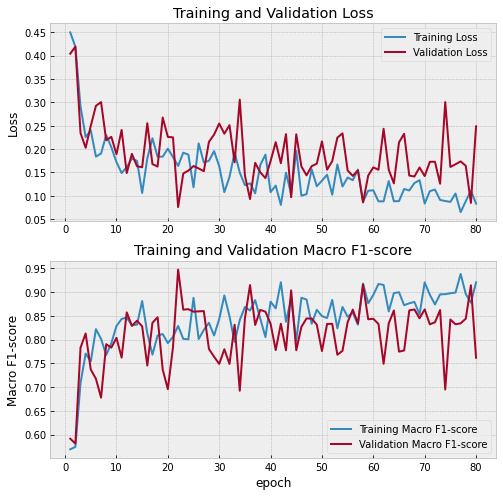

In [35]:
losses, val_losses, macro_f1s, val_macro_f1s = learning_curves(history)

In [36]:
print("Macro soft-F1 loss: %.2f" %val_losses[-1])
print("Macro F1-score: %.2f" %val_macro_f1s[-1])

Macro soft-F1 loss: 0.25
Macro F1-score: 0.76


In [65]:
def download_parallel(movies, image_dir):
    """Downloads images from Internet in parallel.
    
    Args:
        movies (dataframe): must contain 'imdbId' and 'Poster' url columns
        image_dir (string): path to destination directory
    
    Returns:
        movies (dataframe): input dataframe without posters that failed to download
    """
    
    # Create list of filenames
    filenames = movies['imdbId'].apply(lambda imbdId : os.path.join(image_dir, str(imbdId)+'.jpg'))
    # Create list of image urls
    urls = movies['Poster']

    # Create destination directory
    if os.path.exists(image_dir):
        print("Directory '{}' already exists and will be deleted.".format(image_dir))
        shutil.rmtree(image_dir)
    print("Created new directory '{}'".format(image_dir))
    os.makedirs(image_dir)
    
    # Define function to download one single image
    def download_image(url, filename):
        try:
            urllib.request.urlretrieve(url, filename)
            return 0
        except:
            return os.path.basename(filename).split('.')[0]
    
    # Download images in parallel
    start = time()
    print("\nDownloading...")
    num_cores = multiprocessing.cpu_count()
    ko_list = Parallel(n_jobs=num_cores)(delayed(download_image)(u, f) for f, u in zip(filenames, urls))
    
    print("\nDownload in parallel mode took %d seconds." %(time()-start))
    print("Success:", len([i for i in ko_list if i==0]))
    print("Errors:", len([i for i in ko_list if i!=0]))
    
    # Remove not downloaded posters from the dataframe
    ko_index = movies[movies['imdbId'].isin(ko_list)].index
    movies = movies.drop(ko_index)
    
    return movies
    

def download_sequential(movies, image_dir):
    """Downloads images from Internet sequentially.
    
    Args:
        movies (dataframe): must contain 'imdbId' and 'Poster' columns
        image_dir (string): path to destination directory
        
    Returns:
        movies (dataframe): input dataframe without posters that failed to download
    """
    
    # Create list of filenames
    filenames = movies['imdbId'].apply(lambda imbdId : os.path.join(image_dir, str(imbdId)+'.jpg'))
    # Create list of image urls
    urls = movies['Poster']

    # Create destination directory
    if os.path.exists(image_dir):
        print("Directory '{}' already exists and will be deleted.".format(image_dir))
        shutil.rmtree(image_dir)
    print("Created new directory '{}'".format(image_dir))
    os.makedirs(image_dir)
    
    # Define function to download one single image
    def download_image(image_path, filename):
        urllib.request.urlretrieve(image_path, filename)
    
    # Download images sequentially
    start = time()
    print("\nDownloading...")
    ko_list = []
    for i in tqdm(range(len(filenames))):
        filename = filenames.iloc[i]
        url = urls.iloc[i]
        try:
            download_image(url, filename)
        except:
            img_id = os.path.basename(filename).split('.')[0]
            ko_list.append(img_id)
            pass
    
    print("\nDownload in sequential mode took %d seconds." %(time()-start))
    print("Success:", (len(filenames)-len(ko_list)))
    print("Errors:", len(ko_list))
    
    # Remove not downloaded posters from the dataframe
    ko_index = movies[movies['imdbId'].isin(ko_list)].index
    movies = movies.drop(ko_index)
    
    return movies


def micro_bce(y, y_hat):
    """Compute the micro binary cross-entropy on a batch of observations.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)      
        y_hat (float32 Tensor): probability matrix output from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    # Convert the target array to float32
    y = tf.cast(y, tf.float32)
    # Implement cross entropy loss for each observation and label
    cross_entropy = - y * tf.math.log(tf.maximum(y_hat, 1e-16)) - (1-y) * tf.math.log(tf.maximum(1-y_hat, 1e-16))
    # Average binary cross entropy across all batch observations and labels
    cost = tf.reduce_mean(cross_entropy)
    return cost


def macro_bce(y, y_hat):
    """Compute the macro binary cross-entropy on a batch of observations (average across all labels).
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)      
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    # Convert the target array to float32
    y = tf.cast(y, tf.float32)
    # Implement cross entropy loss for each observation and label
    cross_entropy = - y * tf.math.log(tf.maximum(y_hat, 1e-16)) - (1-y) * tf.math.log(tf.maximum(1-y_hat, 1e-16))
    # Average all binary cross entropy losses over the whole batch for each label
    cost = tf.reduce_mean(cross_entropy, axis=0)
    # Average all binary cross entropy losses over labels within the batch
    cost = tf.reduce_mean(cost)
    return cost


def macro_double_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost (average 1 - soft-F1 across all labels).
    Use probability values instead of binary predictions.
    This version uses the computation of soft-F1 for both positive and negative class for each label.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    tn = tf.reduce_sum((1 - y_hat) * (1 - y), axis=0)
    soft_f1_class1 = 2*tp / (2*tp + fn + fp + 1e-16)
    soft_f1_class0 = 2*tn / (2*tn + fn + fp + 1e-16)
    cost_class1 = 1 - soft_f1_class1 # reduce 1 - soft-f1_class1 in order to increase soft-f1 on class 1
    cost_class0 = 1 - soft_f1_class0 # reduce 1 - soft-f1_class0 in order to increase soft-f1 on class 0
    cost = 0.5 * (cost_class1 + cost_class0) # take into account both class 1 and class 0
    macro_cost = tf.reduce_mean(cost) # average on all labels
    return macro_cost


def learning_curves(history):
    """Plot the learning curves of loss and macro f1 score 
    for the training and validation datasets.
    
    Args:
        history: history callback of fitting a tensorflow keras model 
    """
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    macro_f1 = history.history['macro_f1']
    val_macro_f1 = history.history['val_macro_f1']
    
    epochs = len(loss)

    style.use("bmh")
    plt.figure(figsize=(8, 8))

    plt.subplot(2, 1, 1)
    plt.plot(range(1, epochs+1), loss, label='Training Loss')
    plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')

    plt.subplot(2, 1, 2)
    plt.plot(range(1, epochs+1), macro_f1, label='Training Macro F1-score')
    plt.plot(range(1, epochs+1), val_macro_f1, label='Validation Macro F1-score')
    plt.legend(loc='lower right')
    plt.ylabel('Macro F1-score')
    plt.title('Training and Validation Macro F1-score')
    plt.xlabel('epoch')

    plt.show()
    
    return loss, val_loss, macro_f1, val_macro_f1


def perf_grid(ds, target, label_names, model, n_thresh=100):
    """Computes the performance table containing target, label names,
    label frequencies, thresholds between 0 and 1, number of tp, fp, fn,
    precision, recall and f-score metrics for each label.
    
    Args:
        ds (tf.data.Datatset): contains the features array
        target (numpy array): target matrix of shape (BATCH_SIZE, N_LABELS)
        label_names (list of strings): column names in target matrix
        model (tensorflow keras model): model to use for prediction
        n_thresh (int) : number of thresholds to try
        
    Returns:
        grid (Pandas dataframe): performance table 
    """
    
    # Get predictions
    y_hat_val = model.predict(ds)
    # Define target matrix
    y_val = target
    # Find label frequencies in the validation set
    label_freq = target.sum(axis=0)
    # Get label indexes
    label_index = [i for i in range(len(label_names))]
    # Define thresholds
    thresholds = np.linspace(0,1,n_thresh+1).astype(np.float32)
    
    # Compute all metrics for all labels
    ids, labels, freqs, tps, fps, fns, precisions, recalls, f1s = [], [], [], [], [], [], [], [], []
    for l in label_index:
        for thresh in thresholds:   
            ids.append(l)
            labels.append(label_names[l])
            freqs.append(round(label_freq[l]/len(y_val),2))
            y_hat = y_hat_val[:,l]
            y = y_val[:,l]
            y_pred = y_hat > thresh
            tp = np.count_nonzero(y_pred  * y)
            fp = np.count_nonzero(y_pred * (1-y))
            fn = np.count_nonzero((1-y_pred) * y)
            precision = tp / (tp + fp + 1e-16)
            recall = tp / (tp + fn + 1e-16)
            f1 = 2*tp / (2*tp + fn + fp + 1e-16)
            tps.append(tp)
            fps.append(fp)
            fns.append(fn)
            precisions.append(precision)
            recalls.append(recall)
            f1s.append(f1)
            
    # Create the performance dataframe
    grid = pd.DataFrame({
        'id':ids,
        'label':labels,
        'freq':freqs,
        'threshold':list(thresholds)*len(label_index),
        'tp':tps,
        'fp':fps,
        'fn':fns,
        'precision':precisions,
        'recall':recalls,
        'f1':f1s})
    
    grid = grid[['id', 'label', 'freq', 'threshold',
                 'tp', 'fn', 'fp', 'precision', 'recall', 'f1']]
    
    return grid


def print_time(t):
    """Function that converts time period in seconds into %h:%m:%s expression.
    Args:
        t (int): time period in seconds
    Returns:
        s (string): time period formatted
    """
    h = t//3600
    m = (t%3600)//60
    s = (t%3600)%60
    return '%dh:%dm:%ds'%(h,m,s)

In [66]:
import time
start = time.time()
model_bce = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(N_LABELS, activation='sigmoid')
])

model_bce.compile(
    optimizer=tf.keras.optimizers.Adam(lr=5e-4),
    loss=tf.keras.metrics.binary_crossentropy,
    metrics=[macro_f1])
    
start = time.time()
history_bce = model_bce.fit(train_ds,
                            epochs=EPOCHS,
                            validation_data=create_dataset(X_val, y_val_bin))
print('\nTraining took {}'.format(print_time(time.time()-start)))

Epoch 1/120
16/16 [==============================] - ETA: 0s - loss: 0.6169 - macro_f1: 0.3537

2022-04-19 13:32:26.139397: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 915 of 1024
2022-04-19 13:32:27.205346: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


16/16 [==============================] - 50s 3s/step - loss: 0.6093 - macro_f1: 0.3567 - val_loss: 0.3130 - val_macro_f1: 0.5134
Epoch 2/120
16/16 [==============================] - 21s 1s/step - loss: 0.2913 - macro_f1: 0.5080 - val_loss: 0.2276 - val_macro_f1: 0.5598
Epoch 3/120
16/16 [==============================] - 21s 1s/step - loss: 0.2313 - macro_f1: 0.5430 - val_loss: 0.2031 - val_macro_f1: 0.5751
Epoch 4/120
16/16 [==============================] - 21s 1s/step - loss: 0.2112 - macro_f1: 0.5601 - val_loss: 0.1918 - val_macro_f1: 0.5849
Epoch 5/120
16/16 [==============================] - 21s 1s/step - loss: 0.2063 - macro_f1: 0.5586 - val_loss: 0.1849 - val_macro_f1: 0.5875
Epoch 6/120
16/16 [==============================] - 21s 1s/step - loss: 0.1932 - macro_f1: 0.5664 - val_loss: 0.1799 - val_macro_f1: 0.5887
Epoch 7/120
16/16 [==============================] - 21s 1s/step - loss: 0.1821 - macro_f1: 0.5739 - val_loss: 0.1764 - val_macro_f1: 0.5925
Epoch 8/120
16/16 [======

Epoch 59/120
16/16 [==============================] - 21s 1s/step - loss: 0.1256 - macro_f1: 0.8043 - val_loss: 0.1440 - val_macro_f1: 0.5960
Epoch 60/120
16/16 [==============================] - 21s 1s/step - loss: 0.1285 - macro_f1: 0.6796 - val_loss: 0.1431 - val_macro_f1: 0.5937
Epoch 61/120
16/16 [==============================] - 21s 1s/step - loss: 0.1275 - macro_f1: 0.7147 - val_loss: 0.1423 - val_macro_f1: 0.5932
Epoch 62/120
16/16 [==============================] - 21s 1s/step - loss: 0.1278 - macro_f1: 0.7928 - val_loss: 0.1421 - val_macro_f1: 0.5958
Epoch 63/120
16/16 [==============================] - 21s 1s/step - loss: 0.1220 - macro_f1: 0.7701 - val_loss: 0.1422 - val_macro_f1: 0.5958
Epoch 64/120
16/16 [==============================] - 21s 1s/step - loss: 0.1294 - macro_f1: 0.7988 - val_loss: 0.1433 - val_macro_f1: 0.5948
Epoch 65/120
16/16 [==============================] - 21s 1s/step - loss: 0.1213 - macro_f1: 0.7486 - val_loss: 0.1421 - val_macro_f1: 0.5968
Epoch 

16/16 [==============================] - 21s 1s/step - loss: 0.1118 - macro_f1: 0.9136 - val_loss: 0.1390 - val_macro_f1: 0.6262
Epoch 117/120
16/16 [==============================] - 21s 1s/step - loss: 0.1106 - macro_f1: 0.8673 - val_loss: 0.1377 - val_macro_f1: 0.6760
Epoch 118/120
16/16 [==============================] - 21s 1s/step - loss: 0.1122 - macro_f1: 0.8960 - val_loss: 0.1380 - val_macro_f1: 0.6492
Epoch 119/120
16/16 [==============================] - 21s 1s/step - loss: 0.1124 - macro_f1: 0.8161 - val_loss: 0.1394 - val_macro_f1: 0.6341
Epoch 120/120
16/16 [==============================] - 21s 1s/step - loss: 0.1145 - macro_f1: 0.8646 - val_loss: 0.1385 - val_macro_f1: 0.6747

Training took 0h:42m:21s


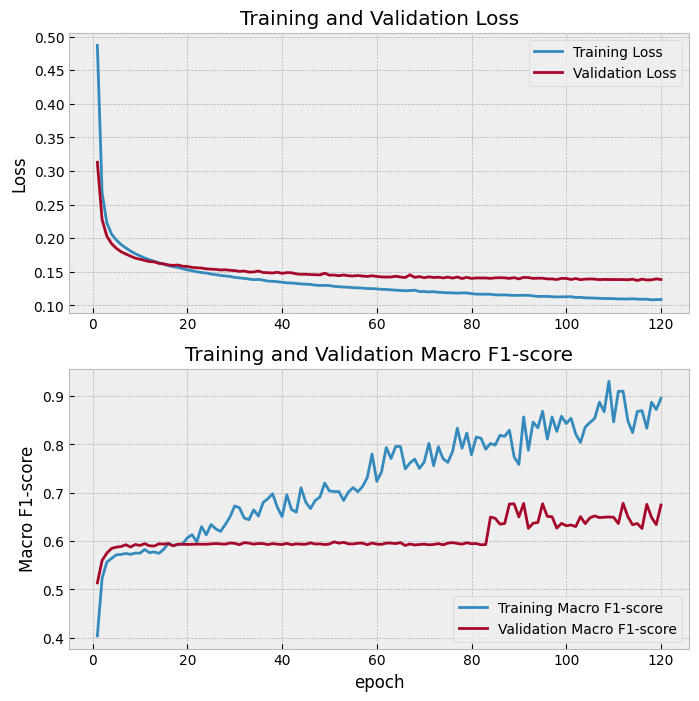

In [67]:
model_bce_losses, model_bce_val_losses, model_bce_macro_f1s, model_bce_val_macro_f1s = learning_curves(history_bce)

In [68]:
print("Macro soft-F1 loss: %.2f" %model_bce_val_losses[-1])
print("Macro F1-score: %.2f" %model_bce_val_macro_f1s[-1])

Macro soft-F1 loss: 0.14
Macro F1-score: 0.67


In [69]:
# Get all label names
label_names = mlb.classes_
# Performance table with the first model (macro soft-f1 loss)
grid = perf_grid(val_ds, y_val_bin, label_names, model)
# Performance table with the second model (binary cross-entropy loss)
grid_bce = perf_grid(val_ds, y_val_bin, label_names, model_bce)

In [70]:
grid_bce.head()

id label  freq  threshold   tp  fn   fp  precision    recall        f1
0   0  Card  0.76       0.00  738   0  233   0.760041  1.000000  0.863663
1   0  Card  0.76       0.01  715  23  229   0.757415  0.968835  0.850178
2   0  Card  0.76       0.02  687  51  215   0.761641  0.930894  0.837805
3   0  Card  0.76       0.03  680  58  210   0.764045  0.921409  0.835381
4   0  Card  0.76       0.04  674  64  208   0.764172  0.913279  0.832099

In [71]:
import seaborn as sns
# Get the maximum F1-score for each label when using the second model and varying the threshold
max_perf = grid_bce.groupby(['id', 'label', 'freq'])[['f1']].max().sort_values('f1', ascending=False).reset_index()
max_perf.rename(columns={'f1':'f1max_bce'}, inplace=True)
max_perf.style.background_gradient(subset=['freq', 'f1max_bce'], cmap=sns.light_palette("lightgreen", as_cmap=True))

In [72]:
print("Correlation between label frequency and optimal F1 with bce: %.2f" %max_perf['freq'].corr(max_perf['f1max_bce']))

Correlation between label frequency and optimal F1 with bce: 0.99


In [73]:
top5 = max_perf.head(9)['id']

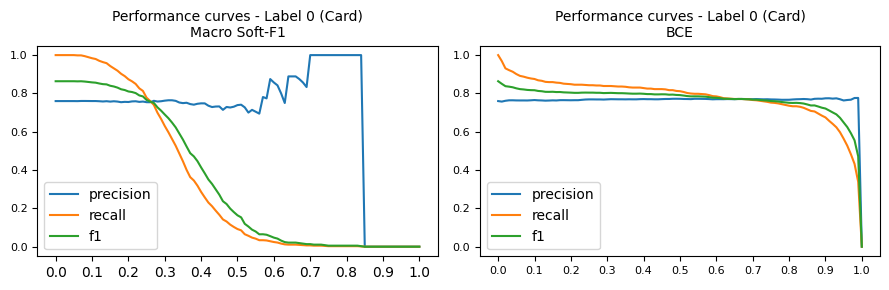

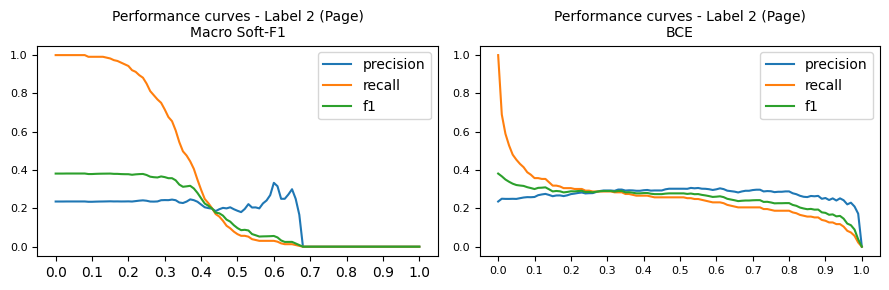

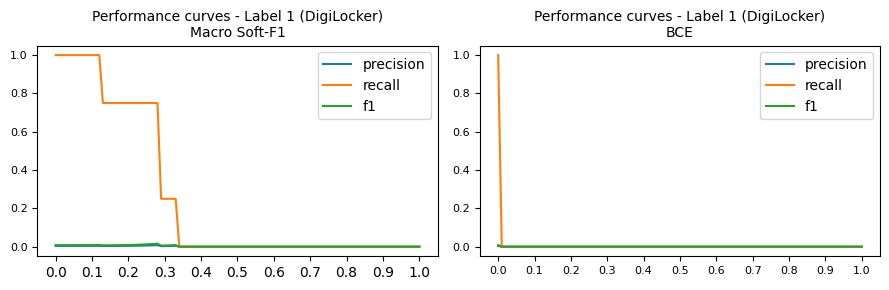

In [74]:
style.use("default")
for l in top5:
    
    label_grid = grid.loc[grid['id']==l, ['precision','recall','f1']]
    label_grid = label_grid.reset_index().drop('index', axis=1)
    
    label_grid_bce = grid_bce.loc[grid_bce['id']==l, ['precision','recall','f1']]
    label_grid_bce = label_grid_bce.reset_index().drop('index', axis=1)
    
    plt.figure(figsize=(9,3))

    ax = plt.subplot(1, 2, 1)
    plt.xticks(ticks=np.arange(0,110,10), labels=np.arange(0,110,10)/100, fontsize=10)
    plt.yticks(fontsize=8)
    plt.title('Performance curves - Label '+str(l)+' ('+label_names[l]+')\nMacro Soft-F1', fontsize=10)
    label_grid.plot(ax=ax)
    
    ax = plt.subplot(1, 2, 2)
    plt.xticks(ticks=np.arange(0,110,10), labels=np.arange(0,110,10)/100, fontsize=8)
    plt.yticks(fontsize=8)
    plt.title('Performance curves - Label '+str(l)+' ('+label_names[l]+')\nBCE', fontsize=10)
    label_grid_bce.plot(ax=ax)
    
    plt.tight_layout()
    plt.show()
    

In [75]:
# Predict on the validation set with both models
y_hat_val = model.predict(val_ds)
y_hat_val_bce = model_bce.predict(val_ds)

/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


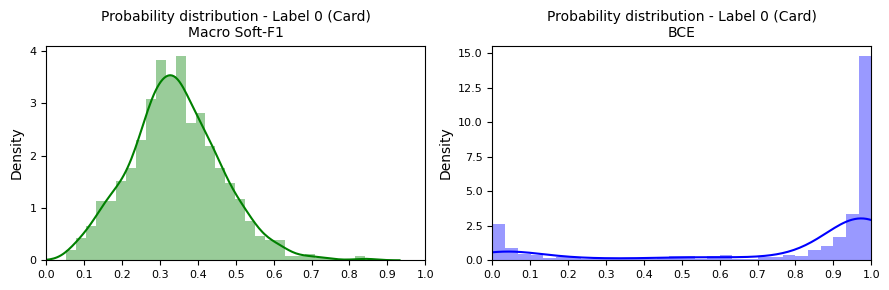

/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


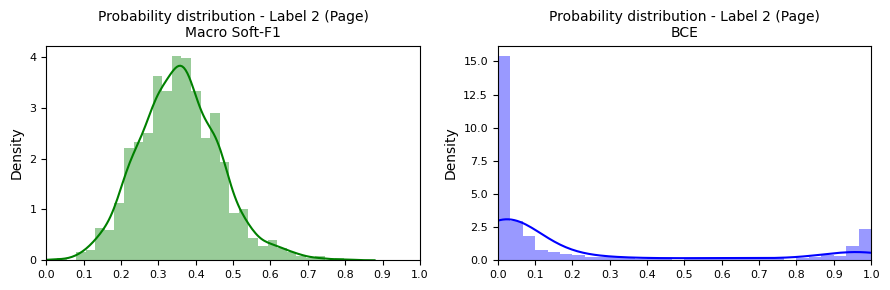

/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rajdeep/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


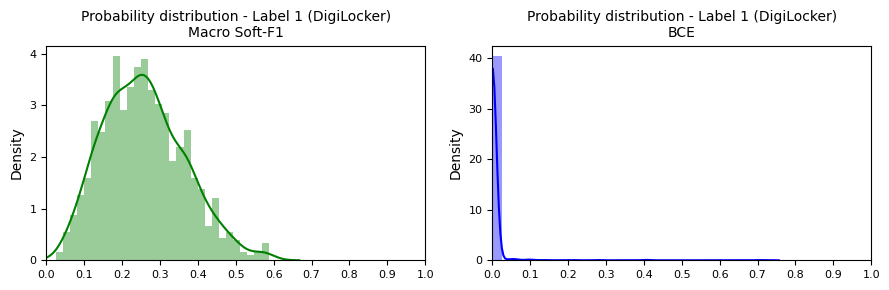

In [76]:
style.use("default")
for l in top5:
        
    plt.figure(figsize=(9,3))
    
    ax = plt.subplot(1, 2, 1)
    plt.xticks(ticks=np.arange(0,1.1,0.1), fontsize=8)
    plt.yticks(fontsize=8)
    plt.title('Probability distribution - Label '+str(l)+' ('+label_names[l]+')\nMacro Soft-F1', fontsize=10)
    plt.xlim(0,1)
    ax = sns.distplot(y_hat_val[:,l], bins=30, kde=True, color="g")
    
    ax = plt.subplot(1, 2, 2)
    plt.xticks(ticks=np.arange(0,1.1,0.1), fontsize=8)
    plt.yticks(fontsize=8)
    plt.title('Probability distribution - Label '+str(l)+' ('+label_names[l]+')\nBCE', fontsize=10)
    plt.xlim(0,1)
    ax = sns.distplot(y_hat_val_bce[:,l], bins=30, kde=True, color="b")
    
    plt.tight_layout()
    plt.show()
    

In [78]:
def show_prediction(title, movies_df, model):
    
    # Get movie info
    img_path = os.path.join('card_images/', title)
    
    # Read and prepare image
    img = image.load_img(img_path, target_size=(IMG_SIZE,IMG_SIZE,CHANNELS))
    img = image.img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)

    # Generate prediction
    prediction = (model.predict(img) > 0.5).astype('int')
    prediction = pd.Series(prediction[0])
    prediction.index = mlb.classes_
    prediction = prediction[prediction==1].index.values

    # Dispaly image with prediction
    style.use('default')
    plt.figure(figsize=(8,4))
    plt.imshow(Image.open(img_path))
    plt.title(list(prediction))
    plt.show()

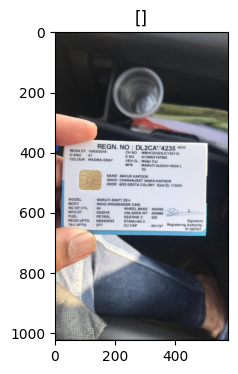

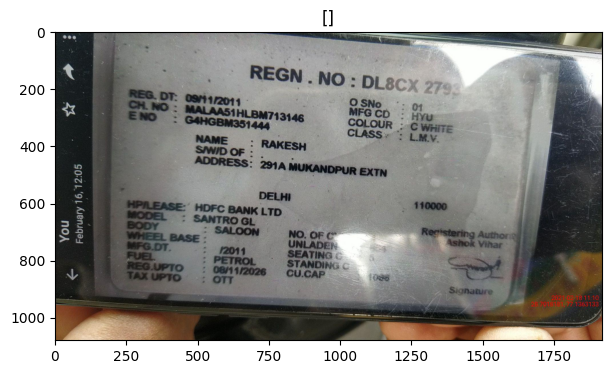

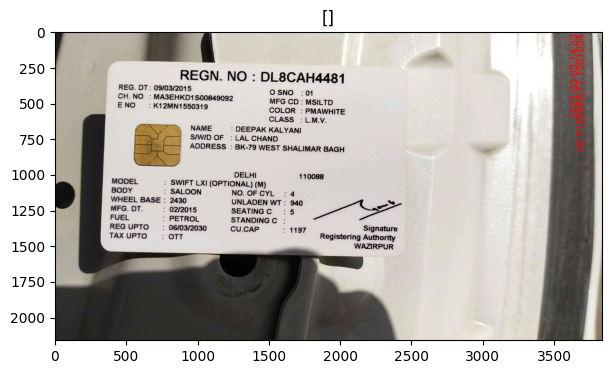

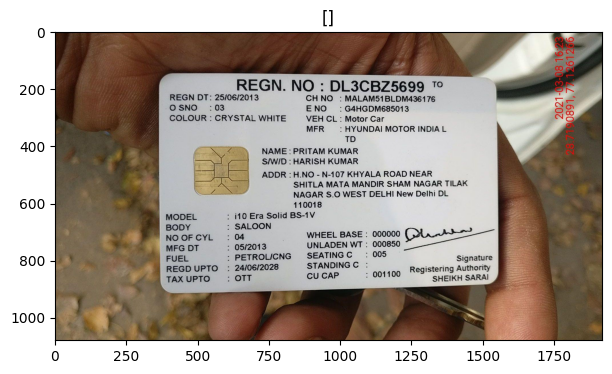

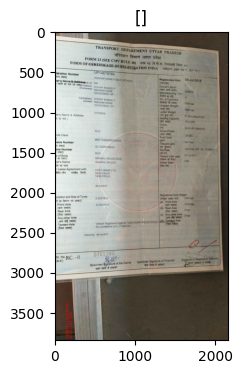

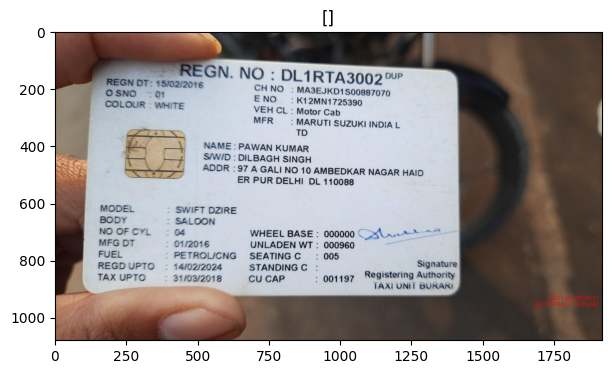

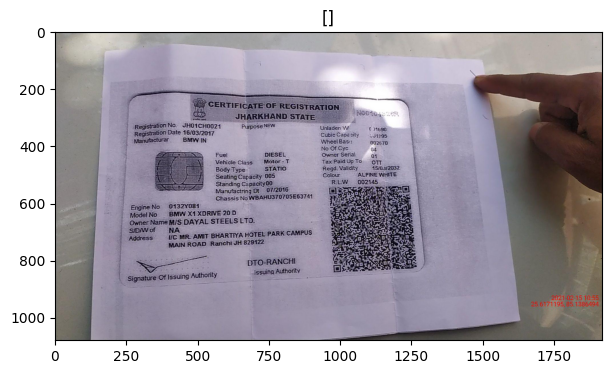

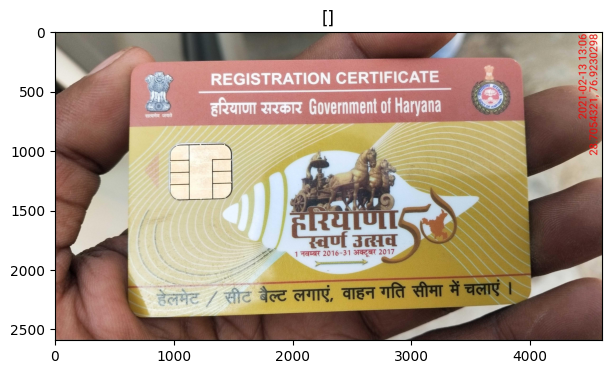

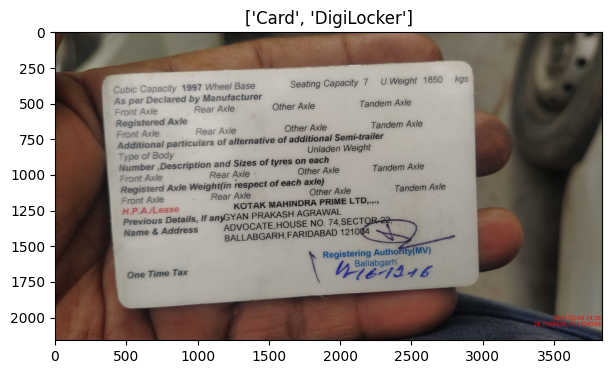

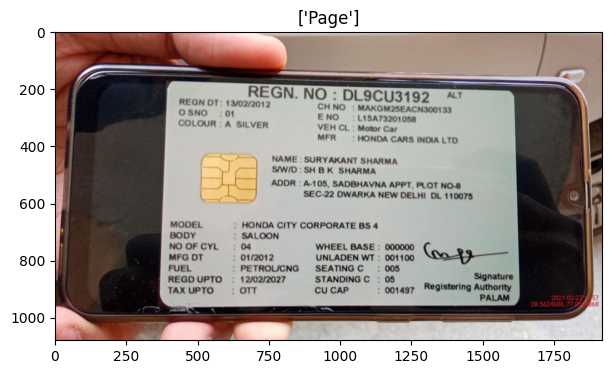

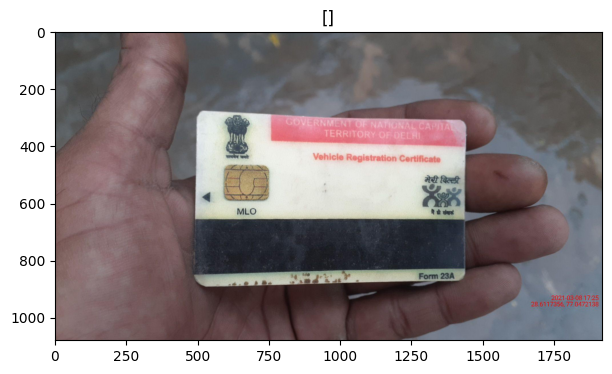

In [79]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
titles = ["008e6476-ec4d-428a-ab68-69b022286d08_820291.jpg",
          "008e6476-ec4d-428a-ab68-69b022286d08_820299.jpg",
          "02c19447-c4c8-4945-9116-6d232d5308e7_819485.jpg",
          "03029226-766f-4abd-b5a2-28ede51bcced_819460.jpg",
          "92d0d2a9-6f02-43ac-a460-2aed85786a1a_821446.jpg",
          "69ff563b-ccc3-4c66-aaf3-64f4656e7a40_817463.jpg",
         "7ecf4700-492a-44fb-8335-e9b1f1e69104_820997.jpg",
         "a5081444-da42-472c-b1de-409d19322c3e_820142.jpg",
         "557c27d9-06cb-47ac-8067-b3a3c964cff5_819755.jpg",
         "365faade-07eb-4385-82bb-7e904c544006_819479.jpg",
         "d9d995b5-f134-427d-9ae1-b655397f00cf_819039.jpg",]

for t in titles:
    show_prediction(t, df, model)

In [225]:

t = 'model_docType_2'
print(t)
export_path = "./models/soft-f1_{}".format(t)
#tf.saved_model.save(model_bce, export_path)
#tf.compat.v1.keras.experimental.export_saved_model(model, export_path)
#print("Model with macro soft-f1 was exported in this path: '{}'".format(export_path))

export_path_bce = "./models/bce_{}".format(t)
tf.compat.v1.keras.experimental.export_saved_model(model_bce, export_path_bce)
print("Model with bce was exported in this path: '{}'".format(export_path_bce))

model_docType_2


/home/rajdeep/.local/lib/python3.8/site-packages/tensorflow/python/keras/saving/saved_model_experimental.py:129: UserWarning: `tf.keras.experimental.export_saved_model` is deprecatedand will be removed in a future version. Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.
  warnings.warn('`tf.keras.experimental.export_saved_model` is deprecated'
/home/rajdeep/.local/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:492: UserWarning: `tf.keras.backend.learning_phase_scope` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.learning_phase_scope` is deprecated and '
/home/rajdeep/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in T

INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.
2022-04-11 22:59:50.376360: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-11 22:59:50.377015: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-04-11 22:59:50.377279: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:41:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-04-11 22:59:50.377330: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-04-11 22:59:50.377372: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Su

INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.
2022-04-11 22:59:53.429223: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-11 22:59:53.429867: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-04-11 22:59:53.430122: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:41:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-04-11 22:59:53.430173: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-04-11 22:59:53.430208: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Su

INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: ./models/bce_model_docType_2/saved_model.pb


INFO:tensorflow:SavedModel written to: ./models/bce_model_docType_2/saved_model.pb


Model with bce was exported in this path: './models/bce_model_docType_2'


In [184]:
export_path = "models/bce_model_docType_docSide_docState_new"

In [185]:
model = tf.compat.v1.keras.experimental.load_from_saved_model(export_path, custom_objects={'KerasLayer':hub.KerasLayer})

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 9)                 11529     
Total params: 2,269,513
Trainable params: 11,529
Non-trainable params: 2,257,984
_________________________________________________________________


In [214]:
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw 
from os import listdir
from os.path import isfile, join
def show_prediction(title, movies_df, model):
    
    # Get movie info
    img_path = os.path.join('multi_class_images/', title)
    
    # Read and prepare image
    img = image.load_img(img_path, target_size=(IMG_SIZE,IMG_SIZE,CHANNELS))
    img = image.img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeMono.ttf", 28, encoding="unic")
    # Generate prediction
    data = model.predict(img)
    #print(data[0])
    conf = []
    for i in range(len(data[0])):
        if data[0][i]> 0.5:
            conf.append(data[0][i])
            #print(i, data[0][i])
    prediction = (model.predict(img) > 0.5).astype('int')
    #print('prediction_out :',prediction)
    prediction = pd.Series(prediction[0])
    
    prediction.index = mlb.classes_
    prediction = prediction[prediction==1].index.values
    #print("prediction : ", prediction)
    # Dispaly image with prediction
    #style.use('default')
    #plt.figure(figsize=(8,4))
    #plt.imshow(Image.open(img_path))
    #plt.title(list(prediction))
    #plt.show()
    label = str(prediction)
    conf = str(conf)
    label1 = label + conf
    print(label1)
    
    draw = ImageDraw.Draw(img1)
    label_size = draw.textsize(label1)
    text_origin = tuple(np.array([15, 15 - label_size[1]]))
    print(text_origin)
    print(label_size[1])
    color = ImageColor.getrgb("green")
    # font = ImageFont.truetype(<font-file>, <font-size>)
    #font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeMono.ttf", 28, encoding="unic")
    # draw.text((x, y),"Sample Text",(r,g,b))
    #color = ImageColor.getrgb("green")
    draw.text(text_origin, label1, fill = color,font = font)
    filename = "output_multi/"+title
    img1.save(filename)

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
from natsort import natsorted
from PIL import ImageFont
PATH_TO_TEST_IMAGES_DIR = 'multi_class_images'
image_name=[]

image_name=[f for f in listdir(PATH_TO_TEST_IMAGES_DIR) if isfile(os.path.join(PATH_TO_TEST_IMAGES_DIR, f))]
image_name = sorted(image_name)
image_name = natsorted(image_name)
#print(image_name)

titles = ["008e6476-ec4d-428a-ab68-69b022286d08_820291.jpg",
          "008e6476-ec4d-428a-ab68-69b022286d08_820299.jpg",
          "02c19447-c4c8-4945-9116-6d232d5308e7_819485.jpg",
          "03029226-766f-4abd-b5a2-28ede51bcced_819460.jpg",
          "92d0d2a9-6f02-43ac-a460-2aed85786a1a_821446.jpg",
          "69ff563b-ccc3-4c66-aaf3-64f4656e7a40_817463.jpg",
         "7ecf4700-492a-44fb-8335-e9b1f1e69104_820997.jpg",
         "a5081444-da42-472c-b1de-409d19322c3e_820142.jpg",
         "557c27d9-06cb-47ac-8067-b3a3c964cff5_819755.jpg",
         "365faade-07eb-4385-82bb-7e904c544006_819479.jpg",
         "d9d995b5-f134-427d-9ae1-b655397f00cf_819039.jpg"]

for t in image_name:
    show_prediction(t, df, model)

['Card' 'Front'][0.81366974, 0.99288905]
(15, 4)
11
['Card' 'Front'][0.9684257, 0.9976476]
(15, 4)
11
['Card' 'back'][0.99934655, 0.9959045]
(15, 4)
11
['Card' 'Front'][0.98800975, 0.9939705]
(15, 4)
11
['Front' 'Page'][0.96528006, 0.9535554]
(15, 4)
11
['Front' 'Page'][0.94947296, 0.6611897]
(15, 4)
11
['Card' 'Front'][0.968268, 0.9991222]
(15, 4)
11
['Card' 'Front'][0.8900448, 0.987531]
(15, 4)
11
['Card' 'Front'][0.98175025, 0.9962424]
(15, 4)
11
['Card' 'Front'][0.70348483, 0.99900514]
(15, 4)
11
['Card' 'Front'][0.99607384, 0.9973713]
(15, 4)
11
['Card' 'Front'][0.9025741, 0.99887556]
(15, 4)
11
['Card' 'Front'][0.9113419, 0.9979109]
(15, 4)
11
['Card' 'Front'][0.96762764, 0.9818803]
(15, 4)
11
['Card' 'back'][0.9673026, 0.7962053]
(15, 4)
11
['Card' 'Front'][0.9845227, 0.98511755]
(15, 4)
11
['Card' 'back'][0.9877556, 0.99519277]
(15, 4)
11
['Card' 'Front'][0.81135553, 0.9963404]
(15, 4)
11
['Front' 'Page'][0.99904615, 0.97369736]
(15, 4)
11
['Front' 'Page'][0.99941623, 0.9434485

['Card' 'Front'][0.99288356, 0.9995896]
(15, 4)
11
['Card' 'Front'][0.9968521, 0.99974936]
(15, 4)
11
['Card' 'Front'][0.99825984, 0.99977833]
(15, 4)
11
['Card' 'back'][0.99839276, 0.99254614]
(15, 4)
11
['Card' 'Front'][0.99192315, 0.99954945]
(15, 4)
11
['Front' 'Page'][0.9953629, 0.6344454]
(15, 4)
11
['Front' 'Page'][0.99934787, 0.976239]
(15, 4)
11
['Front' 'Page'][0.99979275, 0.9380941]
(15, 4)
11
['Card' 'Front'][0.9969374, 0.9993406]
(15, 4)
11
['Card' 'Front'][0.99675304, 0.9984457]
(15, 4)
11
['Card' 'Front'][0.9930099, 0.65745044]
(15, 4)
11
['Card' 'Front'][0.9992901, 0.999411]
(15, 4)
11
['Card' 'Front'][0.9995358, 0.79015976]
(15, 4)
11
['Card' 'Front'][0.9708554, 0.9938006]
(15, 4)
11
['Front' 'Page'][0.99996793, 0.99987733]
(15, 4)
11
['Front' 'Page'][0.99808216, 0.9839378]
(15, 4)
11
['Card' 'Front'][0.99096656, 0.9991842]
(15, 4)
11
['Card' 'Front'][0.9816244, 0.9883018]
(15, 4)
11
['Front' 'Page'][0.99555606, 0.88670623]
(15, 4)
11
['Card' 'Front'][0.9736493, 0.9952

(15, 4)
11
['Front' 'Page'][0.98581064, 0.9327605]
(15, 4)
11
['Card' 'Front'][0.9875473, 0.9995365]
(15, 4)
11
['Card' 'Front'][0.7161562, 0.99971014]
(15, 4)
11
['Card' 'Front'][0.83776534, 0.9998299]
(15, 4)
11
['Card' 'Front'][0.8891302, 0.99965703]
(15, 4)
11
['Front' 'Page'][0.9886643, 0.985962]
(15, 4)
11
['Front' 'Page'][0.98813, 0.9818635]
(15, 4)
11
['Card' 'Front'][0.8551071, 0.9955996]
(15, 4)
11
['Card' 'Front'][0.97450554, 0.9979528]
(15, 4)
11
['Card' 'Front'][0.9982315, 0.9982615]
(15, 4)
11
['Front' 'Page'][0.9439792, 0.94821393]
(15, 4)
11
['Card' 'Front'][0.99656856, 0.9995795]
(15, 4)
11
['Card' 'Front'][0.99270165, 0.99875987]
(15, 4)
11
['Front' 'Page'][0.99699783, 0.8512687]
(15, 4)
11
['Front' 'Page'][0.99629885, 0.82636184]
(15, 4)
11
['Front' 'Page'][0.9983217, 0.9773316]
(15, 4)
11
['Card' 'Front'][0.769484, 0.9998258]
(15, 4)
11
['Card' 'Front'][0.85659766, 0.997419]
(15, 4)
11
['Card' 'Front'][0.9136901, 0.9997633]
(15, 4)
11
['Card' 'Front'][0.83363336, 0.

['Card' 'Front'][0.98642504, 0.999645]
(15, 4)
11
['Card' 'Front'][0.97383344, 0.99960715]
(15, 4)
11
['Front' 'Page'][0.99552935, 0.6685026]
(15, 4)
11
['Card' 'back'][0.9952401, 0.9897215]
(15, 4)
11
['Card' 'Front'][0.97733957, 0.9990754]
(15, 4)
11
['Card' 'Front'][0.77129406, 0.9983089]
(15, 4)
11
['Front'][0.9110014]
(15, 4)
11
['Front' 'Page'][0.98679835, 0.9213684]
(15, 4)
11
['Card' 'back'][0.98948634, 0.96547794]
(15, 4)
11
['Card' 'Front'][0.9823663, 0.99945086]
(15, 4)
11
['Front' 'Page'][0.6393377, 0.89731795]
(15, 4)
11
['Card' 'Front'][0.99706763, 0.9990396]
(15, 4)
11
['Card' 'Front'][0.8010573, 0.9992737]
(15, 4)
11
['Card' 'back'][0.9874107, 0.99966526]
(15, 4)
11
['Card' 'Front'][0.9302965, 0.9994054]
(15, 4)
11
['Front' 'Page'][0.99893826, 0.9229907]
(15, 4)
11
['Card' 'Front'][0.57913417, 0.9987494]
(15, 4)
11
['Front' 'Page'][0.9801501, 0.95084417]
(15, 4)
11
['Card' 'Front'][0.923355, 0.99843293]
(15, 4)
11
['Card' 'Front'][0.934511, 0.99956125]
(15, 4)
11
['Card

['Front' 'Page'][0.98852134, 0.9861907]
(15, 4)
11
['Front' 'Page'][0.9994438, 0.95681393]
(15, 4)
11
['Front' 'Page'][0.99962795, 0.931912]
(15, 4)
11
['Card' 'Front'][0.9881622, 0.9993475]
(15, 4)
11
['Card' 'Front'][0.7714127, 0.995999]
(15, 4)
11
['Front' 'Page'][0.9725365, 0.832974]
(15, 4)
11
['Card' 'Front'][0.8651775, 0.9990711]
(15, 4)
11
['Front' 'Page'][0.9941553, 0.8091024]
(15, 4)
11
['Card' 'back'][0.9965917, 0.991891]
(15, 4)
11
['Card' 'Front'][0.9720419, 0.9717997]
(15, 4)
11
['Card' 'Front'][0.9922808, 0.9984518]
(15, 4)
11
['Card' 'Front'][0.99209267, 0.9998381]
(15, 4)
11
['Card' 'Front'][0.9826247, 0.99974996]
(15, 4)
11
['Card' 'Front'][0.9946189, 0.9982287]
(15, 4)
11
['Card' 'Front'][0.9655979, 0.9976743]
(15, 4)
11
['Card' 'Front'][0.9818658, 0.9977724]
(15, 4)
11
['Card' 'Front'][0.942292, 0.9989273]
(15, 4)
11
['Card' 'Front'][0.9510076, 0.9994572]
(15, 4)
11
['Card' 'Front'][0.9959889, 0.9997911]
(15, 4)
11
['Card' 'Front'][0.9992273, 0.9999527]
(15, 4)
11
[

['Card' 'back'][0.9852637, 0.9931264]
(15, 4)
11
['Card' 'Front'][0.9867971, 0.9997855]
(15, 4)
11
['Card' 'Front'][0.83786744, 0.9996952]
(15, 4)
11
['Card' 'Front'][0.9954099, 0.93430066]
(15, 4)
11
['Card' 'Front'][0.9993148, 0.9732108]
(15, 4)
11
['Card' 'Front'][0.99467033, 0.99531895]
(15, 4)
11
['Card' 'Front'][0.9955296, 0.99731535]
(15, 4)
11
['Card' 'Front'][0.57574564, 0.98776615]
(15, 4)
11
['Card' 'Front'][0.9880221, 0.9996834]
(15, 4)
11
['Front' 'Page'][0.9915684, 0.93673664]
(15, 4)
11
['Card' 'Front'][0.9814465, 0.99835485]
(15, 4)
11
['Card' 'Front'][0.9216869, 0.99581194]
(15, 4)
11
['Card' 'Front' 'Page'][0.6135179, 0.94110256, 0.51338667]
(15, 4)
11
['Card' 'Front'][0.68329936, 0.8945924]
(15, 4)
11
['Card' 'Front'][0.9456332, 0.9851826]
(15, 4)
11
['Card' 'Front'][0.9465611, 0.9917663]
(15, 4)
11
['Card' 'Front'][0.95797676, 0.9973563]
(15, 4)
11
['Card' 'Front'][0.9968484, 0.9997608]
(15, 4)
11
['Card' 'Front'][0.9956124, 0.99950874]
(15, 4)
11
['Card' 'Front'][0

['Card' 'back'][0.9704161, 0.99065536]
(15, 4)
11
['Card' 'Front'][0.93251747, 0.999796]
(15, 4)
11
['Card' 'Front'][0.955126, 0.99971336]
(15, 4)
11
['Card' 'Front'][0.8961385, 0.9998685]
(15, 4)
11
['Card' 'Front'][0.96455747, 0.9995602]
(15, 4)
11
['Card' 'Front'][0.8377229, 0.9996371]
(15, 4)
11
['Card' 'Front'][0.86672854, 0.9965695]
(15, 4)
11
['Card' 'Front'][0.97973937, 0.99859315]
(15, 4)
11
['Front' 'Page'][0.99889237, 0.9960628]
(15, 4)
11
['Front' 'Page'][0.999658, 0.9423737]
(15, 4)
11
['Card' 'Front'][0.99747133, 0.99938965]
(15, 4)
11
['Front' 'Page'][0.9984072, 0.9661687]
(15, 4)
11
['Card' 'Front'][0.9907069, 0.99783283]
(15, 4)
11
['Card' 'Front'][0.99757034, 0.9986467]
(15, 4)
11
['Card' 'Front'][0.9980621, 0.9994479]
(15, 4)
11
['Card' 'Front'][0.79828304, 0.99924326]
(15, 4)
11
['Card' 'Front'][0.9634998, 0.998953]
(15, 4)
11
['Card' 'back'][0.9985649, 0.99248755]
(15, 4)
11
['Card' 'Front'][0.9482102, 0.9995759]
(15, 4)
11
['Card' 'Front'][0.9845917, 0.9997981]
(1

['Card' 'back'][0.9944665, 0.98062783]
(15, 4)
11
['Card' 'Front'][0.9714055, 0.9948703]
(15, 4)
11
['Front' 'Page'][0.9940626, 0.9970661]
(15, 4)
11
['Card' 'Front'][0.9968238, 0.9991937]
(15, 4)
11
['Card' 'Front'][0.89947313, 0.9996773]
(15, 4)
11
['Card' 'Front'][0.91943556, 0.99951744]
(15, 4)
11
['Card' 'Front'][0.63325506, 0.99453306]
(15, 4)
11
['Card' 'Front'][0.5904429, 0.9993862]
(15, 4)
11
['Card' 'Front'][0.99628484, 0.9981735]
(15, 4)
11
['Card'][0.5294971]
(15, 4)
11
['Card' 'Front'][0.7313954, 0.7635794]
(15, 4)
11
['Card' 'Front'][0.9880086, 0.9978277]
(15, 4)
11
['Card' 'back'][0.8963458, 0.97286284]
(15, 4)
11
['Card' 'Front' 'Page'][0.5414507, 0.98443025, 0.5095609]
(15, 4)
11
['Card' 'Front'][0.95850986, 0.99915254]
(15, 4)
11
['Card' 'back'][0.9861205, 0.98956573]
(15, 4)
11
['Card' 'Front'][0.9119893, 0.99932444]
(15, 4)
11
['Card' 'Front'][0.9984012, 0.9996123]
(15, 4)
11
['Front' 'Page'][0.913736, 0.89144427]
(15, 4)
11
['Card' 'Front'][0.94073707, 0.9983255]
(

(15, 4)
11
['Card' 'Front'][0.93732095, 0.9877251]
(15, 4)
11
['Card' 'Front'][0.88582534, 0.99485683]
(15, 4)
11
['Card' 'Front'][0.9993562, 0.9235387]
(15, 4)
11
['Front' 'Page'][0.99836046, 0.97959167]
(15, 4)
11
['Card' 'Front'][0.9268073, 0.99937207]
(15, 4)
11
['Card' 'Front' 'Page'][0.54032654, 0.99777204, 0.5327895]
(15, 4)
11
['Card' 'Front'][0.7572667, 0.9981772]
(15, 4)
11
['Card' 'Front'][0.8203835, 0.9994246]
(15, 4)
11
['Card' 'Front'][0.9123719, 0.99951136]
(15, 4)
11
['Card' 'back'][0.98491144, 0.99451184]
(15, 4)
11
['Card' 'Front'][0.9970703, 0.9992291]
(15, 4)
11
['Front' 'Page'][0.9998178, 0.9820436]
(15, 4)
11
['Front' 'Page'][0.9993118, 0.9628]
(15, 4)
11
['Card' 'Front'][0.9958539, 0.99937457]
(15, 4)
11
['Card' 'Front'][0.99762446, 0.98892164]
(15, 4)
11
['Card' 'back'][0.97489727, 0.9870378]
(15, 4)
11
['Card' 'back'][0.99617094, 0.9846631]
(15, 4)
11
['Card' 'Front'][0.9021028, 0.999057]
(15, 4)
11
['Card' 'Front'][0.95048434, 0.99694926]
(15, 4)
11
['Card' 'F

['Front' 'Page'][0.99677414, 0.8628899]
(15, 4)
11
['Card' 'Front'][0.6465387, 0.99757177]
(15, 4)
11
['Card' 'Front'][0.9137907, 0.9885117]
(15, 4)
11
['Card' 'Front'][0.8685182, 0.9892799]
(15, 4)
11
['Card' 'Front'][0.94633526, 0.9999099]
(15, 4)
11
['Front'][0.9951422]
(15, 4)
11
['Card' 'Front'][0.931398, 0.9899629]
(15, 4)
11
['Front' 'Page'][0.9627805, 0.54602265]
(15, 4)
11
['Card' 'Front'][0.7506412, 0.96440315]
(15, 4)
11
['Card' 'Front'][0.9104709, 0.99619055]
(15, 4)
11
['Front' 'Page'][0.96269095, 0.8463122]
(15, 4)
11
['Front' 'Page'][0.56934476, 0.9651118]
(15, 4)
11
['Front' 'Page'][0.98904383, 0.9718598]
(15, 4)
11
['Card' 'Front'][0.9643239, 0.9996861]
(15, 4)
11
['Card' 'Front'][0.97808427, 0.9997787]
(15, 4)
11
['Card' 'Front'][0.9110145, 0.999246]
(15, 4)
11
['Front' 'Page'][0.99766845, 0.72901565]
(15, 4)
11
['Front' 'Page'][0.9967097, 0.70834893]
(15, 4)
11
['Card' 'back'][0.9986993, 0.9918132]
(15, 4)
11
['Card' 'Front'][0.90399307, 0.99478734]
(15, 4)
11
['Fron

['Front' 'Page'][0.9972995, 0.81926703]
(15, 4)
11
['Card' 'Front'][0.9942589, 0.9994535]
(15, 4)
11
['Card' 'Front'][0.9530804, 0.9979619]
(15, 4)
11
['Card' 'back'][0.9855972, 0.9932214]
(15, 4)
11
['Card' 'Front'][0.98886454, 0.9989889]
(15, 4)
11
['Card' 'Front'][0.99261886, 0.9995096]
(15, 4)
11
['Card' 'Front'][0.9816566, 0.9999192]
(15, 4)
11
['Card' 'Front'][0.9815724, 0.99981743]
(15, 4)
11
['Card' 'back'][0.9912828, 0.99748826]
(15, 4)
11
['Card' 'Front'][0.8798204, 0.9949916]
(15, 4)
11
['Card' 'Front'][0.9709435, 0.9621818]
(15, 4)
11
['Card' 'Front'][0.96483874, 0.99729556]
(15, 4)
11
['Card' 'Front'][0.96105784, 0.9975673]
(15, 4)
11
['Card' 'Front'][0.91949993, 0.9494182]
(15, 4)
11
['Card' 'Front'][0.9580706, 0.94466925]
(15, 4)
11
['Card' 'Front'][0.9901181, 0.999577]
(15, 4)
11
['Card' 'Front'][0.9947465, 0.9990289]
(15, 4)
11
['Card' 'Front'][0.95314056, 0.9988531]
(15, 4)
11
['Card' 'Front'][0.6729521, 0.99903667]
(15, 4)
11
['Front' 'Page'][0.9862715, 0.9791292]
(1

['Front' 'Page'][0.99196166, 0.9137376]
(15, 4)
11
['Card' 'Front'][0.85307205, 0.99949825]
(15, 4)
11
['Card' 'Front'][0.9026813, 0.9992424]
(15, 4)
11
['Card' 'Front'][0.9719025, 0.9999]
(15, 4)
11
['Card' 'Front'][0.99239904, 0.9999149]
(15, 4)
11
['Card' 'Front'][0.8667641, 0.9990287]
(15, 4)
11
['Front' 'Page'][0.97179294, 0.8758416]
(15, 4)
11
['Front' 'Page'][0.99298143, 0.99566025]
(15, 4)
11
['Card' 'Front'][0.95772916, 0.99975914]
(15, 4)
11
['Card' 'Front'][0.95379514, 0.998464]
(15, 4)
11
['Card' 'Front'][0.88444155, 0.9992576]
(15, 4)
11
['Front' 'Page'][0.9960884, 0.99403256]
(15, 4)
11
['Front' 'Page'][0.99779093, 0.7726208]
(15, 4)
11
['Card' 'Front'][0.8858318, 0.9999807]
(15, 4)
11
['Card' 'Front'][0.7551858, 0.74794894]
(15, 4)
11
['Card' 'Front'][0.98450273, 0.99959093]
(15, 4)
11
['Card' 'Front'][0.9802281, 0.99991214]
(15, 4)
11
['Card' 'Front'][0.94688076, 0.9995233]
(15, 4)
11
['Card' 'back'][0.9946337, 0.99421716]
(15, 4)
11
['Card' 'Front'][0.9665573, 0.999728

['Card' 'Front'][0.99716526, 0.9998248]
(15, 4)
11
['Card' 'Front'][0.77468556, 0.99908686]
(15, 4)
11
['Card' 'Front'][0.99537885, 0.99965835]
(15, 4)
11
['Card' 'Front'][0.9918612, 0.99867237]
(15, 4)
11
['Card' 'Front'][0.90752375, 0.9964683]
(15, 4)
11
['Card' 'Front'][0.987402, 0.9997696]
(15, 4)
11
['Card' 'Front'][0.89786047, 0.99889153]
(15, 4)
11
['Card' 'Front'][0.75185734, 0.9875252]
(15, 4)
11
['Card' 'Front'][0.8562399, 0.9935261]
(15, 4)
11
['Card' 'Front'][0.8570581, 0.984821]
(15, 4)
11
['Front' 'Page'][0.9814781, 0.96067196]
(15, 4)
11
['Card' 'Front'][0.96186495, 0.99935836]
(15, 4)
11
['Card' 'Front'][0.9926685, 0.9990414]
(15, 4)
11
['Front' 'Page'][0.9915236, 0.9350157]
(15, 4)
11
['Card' 'Front'][0.9053101, 0.9932167]
(15, 4)
11
['Front' 'Page'][0.98837614, 0.97095954]
(15, 4)
11
['Card' 'Front'][0.9098167, 0.99576366]
(15, 4)
11
['Card' 'Front'][0.9961243, 0.99944955]
(15, 4)
11
['Card' 'Front'][0.9838747, 0.9977689]
(15, 4)
11
['DigiLocker' 'Front'][0.665485, 0.

['Card' 'Front'][0.991935, 0.99886996]
(15, 4)
11
['Card' 'Front'][0.9854504, 0.9980515]
(15, 4)
11
['Card' 'Front'][0.9791708, 0.99799985]
(15, 4)
11
['Card' 'Front'][0.98791796, 0.99811673]
(15, 4)
11
['Card' 'Front'][0.9884595, 0.9989477]
(15, 4)
11
['Card' 'Front'][0.6869097, 0.9845728]
(15, 4)
11
['Card' 'Front'][0.52681553, 0.982543]
(15, 4)
11
['Front' 'Page'][0.9919086, 0.5562374]
(15, 4)
11
['Front' 'Page'][0.9486589, 0.9720148]
(15, 4)
11
['Card' 'Front'][0.6917132, 0.9977055]
(15, 4)
11
['Front' 'Page'][0.99815124, 0.87064385]
(15, 4)
11
['Front' 'Page'][0.91326296, 0.9413684]
(15, 4)
11
['Card' 'Front'][0.88148063, 0.99750096]
(15, 4)
11
['Card' 'Front'][0.91383296, 0.9971909]
(15, 4)
11
['Card' 'Front'][0.88567793, 0.993306]
(15, 4)
11
['Card' 'Front'][0.97828555, 0.9997358]
(15, 4)
11
['Card' 'Front'][0.99084294, 0.99963653]
(15, 4)
11
['Front' 'Page'][0.9486118, 0.8948954]
(15, 4)
11
['Front' 'Page'][0.9185502, 0.92806566]
(15, 4)
11
['Card' 'back'][0.96429425, 0.9858993

(15, 4)
11
['Card' 'Front'][0.93509036, 0.9993698]
(15, 4)
11
['Front' 'Page'][0.698278, 0.84004503]
(15, 4)
11
['Card' 'Front'][0.9427629, 0.9990345]
(15, 4)
11
['Front' 'Page'][0.99858713, 0.97714794]
(15, 4)
11
['Front' 'Page'][0.9888343, 0.97967666]
(15, 4)
11
['Card' 'Front'][0.94055015, 0.9998956]
(15, 4)
11
['Card' 'Front'][0.94648004, 0.99810153]
(15, 4)
11
['Card' 'back'][0.97768927, 0.9268023]
(15, 4)
11
['Front' 'Page'][0.99319434, 0.99840266]
(15, 4)
11
['Front' 'Page'][0.98403144, 0.99532664]
(15, 4)
11
['Card' 'Front'][0.99122614, 0.99977213]
(15, 4)
11
['Card' 'Front'][0.9934592, 0.9992866]
(15, 4)
11
['Card' 'Front'][0.997008, 0.9995578]
(15, 4)
11
['Card' 'Front'][0.9931978, 0.99946827]
(15, 4)
11
['Card' 'Front'][0.9873956, 0.9946937]
(15, 4)
11
['Card' 'Front'][0.989486, 0.98363173]
(15, 4)
11
['Card' 'Front'][0.9043166, 0.99398065]
(15, 4)
11
['Card' 'back'][0.9949491, 0.98867583]
(15, 4)
11
['Card' 'back'][0.9332323, 0.9988525]
(15, 4)
11
['Card' 'Front'][0.7799917

(15, 4)
11
['Card' 'Front'][0.98704314, 0.99835664]
(15, 4)
11
['Card' 'Front'][0.9832901, 0.997488]
(15, 4)
11
['Card' 'Front'][0.9988164, 0.9991259]
(15, 4)
11
['Card' 'Front'][0.9750627, 0.9979043]
(15, 4)
11
['Front' 'Page'][0.9919269, 0.80357087]
(15, 4)
11
['Card' 'back'][0.9876095, 0.9812428]
(15, 4)
11
['Card' 'Front'][0.9987494, 0.9993562]
(15, 4)
11
['Card' 'back'][0.9877702, 0.9978175]
(15, 4)
11
['Card' 'Front'][0.984543, 0.9989562]
(15, 4)
11
['Card' 'back'][0.99259347, 0.9908269]
(15, 4)
11
['Card' 'Front'][0.98377705, 0.99947554]
(15, 4)
11
['Card' 'Front'][0.9932052, 0.9705409]
(15, 4)
11
['Card' 'back'][0.9989967, 0.99931943]
(15, 4)
11
['Card' 'Front'][0.99854636, 0.8489069]
(15, 4)
11
['Card' 'Front'][0.9447172, 0.99745697]
(15, 4)
11
['Front' 'Page'][0.9996068, 0.7767403]
(15, 4)
11
['Front' 'Page'][0.97710437, 0.6929215]
(15, 4)
11
['Card' 'Front'][0.70366925, 0.9909695]
(15, 4)
11
['Card' 'Front'][0.87393594, 0.9715133]
(15, 4)
11
['Card' 'Front'][0.81137025, 0.75

['Card' 'Front'][0.9688336, 0.999595]
(15, 4)
11
['Card' 'back'][0.9849101, 0.9623005]
(15, 4)
11
['Card' 'Front'][0.97706544, 0.9859648]
(15, 4)
11
['Front' 'Page'][0.9839279, 0.6998783]
(15, 4)
11
['Front' 'Page'][0.978429, 0.6964944]
(15, 4)
11
['Front' 'Page'][0.99885416, 0.8901071]
(15, 4)
11
['Front' 'Page'][0.9984106, 0.9845732]
(15, 4)
11
['Card' 'Front'][0.9774229, 0.9833613]
(15, 4)
11
['Front' 'Page'][0.99826765, 0.98938787]
(15, 4)
11
['Front' 'Page'][0.95999795, 0.83876973]
(15, 4)
11
['Front' 'Page'][0.9999404, 0.9999795]
(15, 4)
11
['Card' 'Front'][0.98729974, 0.9989748]
(15, 4)
11
['Card' 'back'][0.9700853, 0.98752826]
(15, 4)
11
['Card' 'Front'][0.9876885, 0.99865794]
(15, 4)
11
['Card' 'Front'][0.9943453, 0.9980726]
(15, 4)
11
['Card' 'back'][0.98992866, 0.98766476]
(15, 4)
11
['Card' 'Front'][0.98405945, 0.9996247]
(15, 4)
11
['Card' 'Front'][0.94904494, 0.99907315]
(15, 4)
11
['Card' 'Front'][0.9204225, 0.998566]
(15, 4)
11
['Card' 'Front'][0.95578355, 0.99860543]
(

['Card' 'Front'][0.99056727, 0.9987845]
(15, 4)
11
['Card' 'Front'][0.9953489, 0.998823]
(15, 4)
11
['Card' 'Front'][0.9883774, 0.9991021]
(15, 4)
11
['Card' 'Front'][0.98318255, 0.999605]
(15, 4)
11
['Card' 'Front'][0.9827976, 0.9995433]
(15, 4)
11
['Card' 'back'][0.9788067, 0.9129597]
(15, 4)
11
['Card' 'Front'][0.88276106, 0.995689]
(15, 4)
11
['Card' 'Front'][0.9938439, 0.9983181]
(15, 4)
11
['Front' 'Page'][0.9948198, 0.88470906]
(15, 4)
11
['Front' 'Page'][0.99964416, 0.9931376]
(15, 4)
11
['Card' 'back'][0.99855465, 0.959901]
(15, 4)
11
['Card' 'Front'][0.98683923, 0.9996437]
(15, 4)
11
['Card' 'Front'][0.9568713, 0.999592]
(15, 4)
11
['Card' 'Front'][0.6264602, 0.99876344]
(15, 4)
11
['Card' 'Front'][0.9975024, 0.9953577]
(15, 4)
11
['Card' 'back'][0.94476336, 0.87845606]
(15, 4)
11
['Card' 'Front'][0.9411112, 0.9908698]
(15, 4)
11
['Card' 'Front'][0.8560305, 0.9730532]
(15, 4)
11
['Card' 'Front'][0.98449486, 0.99963]
(15, 4)
11
['Card' 'Front'][0.98501265, 0.99947745]
(15, 4)


['Card' 'Front'][0.97134787, 0.9994956]
(15, 4)
11
['Card' 'Front'][0.8143638, 0.9784362]
(15, 4)
11
['Card' 'Front'][0.80318093, 0.9908414]
(15, 4)
11
['Card' 'back'][0.99596846, 0.9874255]
(15, 4)
11
['Card' 'Front'][0.99192774, 0.9998398]
(15, 4)
11
['Card' 'Front'][0.9536513, 0.9942906]
(15, 4)
11
['Card' 'Front'][0.8329495, 0.9995703]
(15, 4)
11
['Front' 'Page'][0.99956256, 0.54931474]
(15, 4)
11
['Card' 'Front'][0.7481651, 0.9998672]
(15, 4)
11
['Card' 'Front'][0.52354264, 0.9985857]
(15, 4)
11
['Card' 'Front'][0.9761311, 0.9435635]
(15, 4)
11
['Card' 'Front'][0.99197, 0.99888533]
(15, 4)
11
['Card' 'Front'][0.9565221, 0.999706]
(15, 4)
11
['Card' 'Front'][0.98931503, 0.9998129]
(15, 4)
11
['Card' 'Front'][0.9986395, 0.99941146]
(15, 4)
11
['Card' 'Front'][0.96178985, 0.9995896]
(15, 4)
11
['Front' 'Page'][0.9897626, 0.97865784]
(15, 4)
11
['Front' 'Page'][0.99512464, 0.9937604]
(15, 4)
11
['Card' 'Front'][0.9925357, 0.99914885]
(15, 4)
11
['Front' 'Page'][0.99792224, 0.9791272]


['Front' 'Page'][0.98924214, 0.86655736]
(15, 4)
11
['Front' 'Page'][0.97671175, 0.8760284]
(15, 4)
11
['Front' 'Page'][0.97078806, 0.99283457]
(15, 4)
11
['Card' 'Front'][0.9934778, 0.9998425]
(15, 4)
11
['Card' 'Front'][0.5382712, 0.9899775]
(15, 4)
11
['Front' 'Page'][0.97166723, 0.7537636]
(15, 4)
11
['Card' 'Front'][0.92163616, 0.9975963]
(15, 4)
11
['Front' 'Page'][0.9655775, 0.87451303]
(15, 4)
11
['Front' 'Page'][0.963476, 0.8821976]
(15, 4)
11
['Card' 'Front'][0.98931, 0.99887806]
(15, 4)
11
['Card' 'Front'][0.99457353, 0.99909544]
(15, 4)
11
['Front' 'Page'][0.99709797, 0.9671231]
(15, 4)
11
['Card' 'Front'][0.9807912, 0.9964695]
(15, 4)
11
['Card' 'back'][0.99337775, 0.99089324]
(15, 4)
11
['Card' 'Front'][0.9941392, 0.9981464]
(15, 4)
11
['Front'][0.996429]
(15, 4)
11
['Card' 'Front'][0.96100765, 0.999482]
(15, 4)
11
['Front' 'Page'][0.899953, 0.92447263]
(15, 4)
11
['Card' 'Front'][0.9904445, 0.9969061]
(15, 4)
11
['Card' 'Front'][0.9867285, 0.9980513]
(15, 4)
11
['Card' '

In [231]:
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw 
from os import listdir
from os.path import isfile, join
def show_prediction(title, movies_df, model):
    
    # Get movie info
    img_path = os.path.join('multi_class_images/', title)
    img1 = Image.open(img_path)
    # Read and prepare image
    img = image.load_img(img_path, target_size=(IMG_SIZE,IMG_SIZE,CHANNELS))
    img = image.img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    
    fontsize = 1  # starting font size

    # portion of image width you want text width to be
    img_fraction = 0.85

    
    font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeMono.ttf", fontsize, encoding="unic")
    
    
    # Generate prediction
    data = model.predict(img)
    #print(data[0])
    conf = []
    for i in range(len(data[0])):
        if data[0][i]> 0.5:
            conf.append(data[0][i])
            #print(i, data[0][i])
    prediction = (model.predict(img) > 0.5).astype('int')
    #print('prediction_out :',prediction)
    prediction = pd.Series(prediction[0])
    
    prediction.index = mlb.classes_
    prediction = prediction[prediction==1].index.values
    #print("prediction : ", prediction)
    # Dispaly image with prediction
    #style.use('default')
    #plt.figure(figsize=(8,4))
    #plt.imshow(Image.open(img_path))
    #plt.title(list(prediction))
    #plt.show()
    label = str(prediction)
    conf = str(conf)
    txt = label + conf
    print(txt)
    while font.getsize(txt)[0] < img_fraction*img1.size[0]:
    # iterate until the text size is just larger than the criteria
        fontsize += 1
        font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeMono.ttf", fontsize, encoding="unic")

    # optionally de-increment to be sure it is less than criteria
    fontsize -= 1
    font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeMono.ttf", fontsize, encoding="unic")
    
    
    draw = ImageDraw.Draw(img1)
    label_size = draw.textsize(txt)
    text_origin = tuple(np.array([15, 15 - label_size[1]]))
    print(text_origin)
    print(label_size[1])
    color = ImageColor.getrgb("green")
    # font = ImageFont.truetype(<font-file>, <font-size>)
    #font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeMono.ttf", 28, encoding="unic")
    # draw.text((x, y),"Sample Text",(r,g,b))
    #color = ImageColor.getrgb("green")
    draw.text(text_origin, txt, fill = color,font = font)
    filename = "output_multi/"+title
    img1.save(filename)